In [1]:
!pip install openpyxl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# prompt: read excel
# /content/drive/Shareddrives/Perovskites /ML Provskite/data/Perovskite_FAIR database_ORIGINAL_all_data.xlsx

df = pd.read_excel('/content/drive/Shareddrives/Perovskites /ML Provskite/data/Perovskite_FAIR database_ORIGINAL_all_data.xlsx')
df.head()

Ref_ID  Ref_ID_temp Ref_name_of_person_entering_the_data  \
0   33307        33307                            Waqas Zia   
1   33308        33308                            Waqas Zia   
2   33327        33327                            Waqas Zia   
3   33328        33328                            Waqas Zia   
4   33329        33329                            Waqas Zia   

   Ref_data_entered_by_author                 Ref_DOI_number Ref_lead_author  \
0                       False         10.1002/solr.201900109       Ye et al.   
1                       False         10.1002/solr.201900109       Ye et al.   
2                       False  10.1021/acsenergylett.9b02375   Zhuang et al.   
3                       False  10.1021/acsenergylett.9b02375   Zhuang et al.   
4                       False  10.1021/acsenergylett.9b02375   Zhuang et al.   

  Ref_publication_date         Ref_journal  Ref_part_of_initial_dataset  \
0           2019-04-30           Solar RRL                         True   
1           2019-04-30           Solar RRL                         True   
2           2019-11-11  ACS Energy Letters                         True   
3           2019-11-11  ACS Energy Letters                         True   
4           2019-11-11  ACS Energy Letters                         True   

        Ref_original_filename_data_upload  ... Outdoor_PCE_Tse80  \
0  Historic dataset on 2020 11 22_v7.xlsx  ...               NaN   
1  Historic dataset on 2020 11 22_v7.xlsx  ...               NaN   
2  Historic dataset on 2020 11 22_v7.xlsx  ...               NaN   
3  Historic dataset on 2020 11 22_v7.xlsx  ...               NaN   
4  Historic dataset on 2020 11 22_v7.xlsx  ...               NaN   

  Outdoor_PCE_after_1000_h Outdoor_power_generated  \
0                      NaN                     NaN   
1                      NaN                     NaN   
2                      NaN                     NaN   
3                      NaN                     NaN   
4                      NaN                     NaN   

   Outdoor_link_raw_data_for_outdoor_trace  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   Outdoor_detaild_weather_data_available  Outdoor_link_detailed_weather_data  \
0                                     0.0                                 NaN   
1                                     0.0                                 NaN   
2                                     0.0                                 NaN   
3                                     0.0                                 NaN   
4                                     0.0                                 NaN   

  Outdoor_spectral_data_available  Outdoor_link_spectral_data  \
0                             0.0                         NaN   
1                             0.0                         NaN   
2                             0.0                         NaN   
3                             0.0                         NaN   
4                             0.0                         NaN   

   Outdoor_irradiance_measured  Outdoor_link_irradiance_data  
0                          0.0                           NaN  
1                          0.0                           NaN  
2                          0.0                           NaN  
3                          0.0                           NaN  
4                          0.0                           NaN  

[5 rows x 410 columns]

In [52]:
data = df[['Ref_DOI_number','Ref_internal_sample_id', 'Perovskite_composition_b_ions', 'Perovskite_composition_b_ions_coefficients', 'Perovskite_composition_c_ions', 'Perovskite_composition_c_ions_coefficients', 'Perovskite_composition_long_form','Perovskite_additives_compounds', 'Perovskite_additives_concentrations', 'Perovskite_thickness', 'Perovskite_deposition_procedure', 'Perovskite_deposition_solvents', 'Perovskite_deposition_solvents_mixing_ratios', 'Perovskite_deposition_quenching_induced_crystallisation', 'Perovskite_deposition_quenching_media', 'Perovskite_deposition_thermal_annealing_temperature', 'Perovskite_deposition_thermal_annealing_time', 'JV_reverse_scan_Voc',
 'JV_reverse_scan_Jsc',
 'JV_reverse_scan_FF',
 'JV_reverse_scan_PCE',
 'JV_forward_scan_Voc',
 'JV_forward_scan_Jsc',
 'JV_forward_scan_FF',
 'JV_forward_scan_PCE'] ]

In [5]:
data

Ref_DOI_number          Ref_internal_sample_id  \
0             10.1002/solr.201900109                     1% Pb(SCN)2   
1             10.1002/solr.201900109                     1% Pb(SCN)2   
2      10.1021/acsenergylett.9b02375                        Pristine   
3      10.1021/acsenergylett.9b02375                        Pristine   
4      10.1021/acsenergylett.9b02375                        Pristine   
...                              ...                             ...   
43374        10.1126/science.aap9282                             NaN   
43375        10.1126/science.1228604                             NaN   
43376    10.21203/rs.3.rs-1722290/v1       Perov. Con. variation_0.8   
43377    10.21203/rs.3.rs-1722290/v1  Perov. Con. Variation+FACl_0.8   
43378        10.1126/science.1228604                             NaN   

      Perovskite_composition_b_ions  \
0                                Pb   
1                                Pb   
2                                Pb   
3                                Pb   
4                                Pb   
...                             ...   
43374                            Pb   
43375                            Pb   
43376                            Pb   
43377                            Pb   
43378                            Pb   

      Perovskite_composition_b_ions_coefficients  \
0                                              1   
1                                              1   
2                                              1   
3                                              1   
4                                              1   
...                                          ...   
43374                                          1   
43375                                          1   
43376                                          1   
43377                                          1   
43378                                          1   

      Perovskite_composition_c_ions  \
0                             Br; I   
1                             Br; I   
2                             Br; I   
3                             Br; I   
4                             Br; I   
...                             ...   
43374                         Br; I   
43375                             I   
43376                    Cs; FA; MA   
43377                    Cs; FA; MA   
43378                             I   

      Perovskite_composition_c_ions_coefficients  \
0                                           1; 2   
1                                           1; 2   
2                                     0.03; 2.97   
3                                     0.03; 2.97   
4                                     0.03; 2.97   
...                                          ...   
43374                               0.45; 2.5075   
43375                                          3   
43376                                 0.49; 2.51   
43377                                 0.49; 2.51   
43378                                          3   

         Perovskite_composition_long_form Perovskite_additives_compounds  \
0                                CsPbBrI2                       Pb(SCN)2   
1                                CsPbBrI2                       Pb(SCN)2   
2                 FA0.9MA0.1PbBr0.03I2.97                             Cl   
3                 FA0.9MA0.1PbBr0.03I2.97                             Cl   
4                 FA0.9MA0.1PbBr0.03I2.97                             Cl   
...                                   ...                            ...   
43374         FA0.95MA0.15PbBr0.45I2.5075                            NaN   
43375                              MAPbI3                             Cl   
43376  Cs0.05FA0.79MA0.16PbCs0.49FA2.51MA                        Undoped   
43377  Cs0.05FA0.79MA0.16PbCs0.49FA2.51MA                           FACl   
43378                              MAPbI3                             Cl   

      Perovskite_additives_concentrations Perovskite_thi

In [22]:
all_data=df

In [7]:
# data = data[data["Perovskite_composition_b_ions"] == "Pb"]
# data = data[data["Perovskite_deposition_procedure"].str.contains("Spin-coating", na=False)]

In [8]:
data = data[data["JV_reverse_scan_PCE"] <= 27]


In [9]:
value_counts = data["Perovskite_deposition_thermal_annealing_temperature"].value_counts()

In [10]:
value_counts

Perovskite_deposition_thermal_annealing_temperature
100                         16528
Unknown                      3443
Unknown >> 100.0             1306
150                          1034
120                           774
                            ...  
80.0 >> 135.0                   1
80.0 >> 120.0                   1
150 >> 150 >> 150               1
150 >> 150 >> 150 >> 150        1
110.0 >> 75.0                   1
Name: count, Length: 821, dtype: int64

In [54]:
# Separate features and labels
output_labels = [
    'JV_reverse_scan_PCE', 'JV_forward_scan_PCE', 'JV_forward_scan_FF', 'JV_forward_scan_Voc',
    'JV_reverse_scan_Voc', 'JV_reverse_scan_Jsc', 'JV_reverse_scan_FF', 'JV_forward_scan_Jsc',
]
features = data.drop(columns=output_labels)
labels = data[output_labels]

## Specific Feature analysis

In [55]:
print(features.columns.tolist())

['Ref_DOI_number', 'Ref_internal_sample_id', 'Perovskite_composition_b_ions', 'Perovskite_composition_b_ions_coefficients', 'Perovskite_composition_c_ions', 'Perovskite_composition_c_ions_coefficients', 'Perovskite_composition_long_form', 'Perovskite_additives_compounds', 'Perovskite_additives_concentrations', 'Perovskite_thickness', 'Perovskite_deposition_procedure', 'Perovskite_deposition_solvents', 'Perovskite_deposition_solvents_mixing_ratios', 'Perovskite_deposition_quenching_induced_crystallisation', 'Perovskite_deposition_quenching_media', 'Perovskite_deposition_thermal_annealing_temperature', 'Perovskite_deposition_thermal_annealing_time']


KeyError: 'Perovskite_composition_long_form'

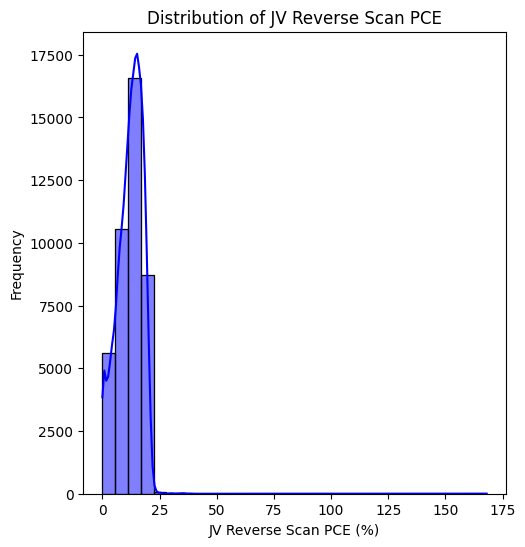

In [56]:
for feature in features.columns.tolist():
    # Group data by Perovskite composition long form and calculate the average reverse PCE
    average_pce_by_feature = data.groupby(feature)['JV_reverse_scan_PCE'].mean()

    # Print the results
    average_pce_by_feature
    # Group by Feature and calculate mean PCE
    average_pce_by_feature = data.groupby(feature)['JV_reverse_scan_PCE'].mean().reset_index()

    # Sort by efficiency for better visualization
    average_pce_by_feature = average_pce_by_feature.sort_values(by='JV_reverse_scan_PCE', ascending=False)

    # Set figure size
    plt.figure(figsize=(12, 6))

    # Histogram of PCE values
    plt.subplot(1, 2, 1)
    sns.histplot(data['JV_reverse_scan_PCE'], bins=30, kde=True, color='blue')
    plt.xlabel("JV Reverse Scan PCE (%)")
    plt.ylabel("Frequency")
    plt.title("Distribution of JV Reverse Scan PCE")

    # Boxplot of PCE grouped by composition (top 10 compositions)
    top_compositions = average_pce_by_feature.head(10)['Perovskite_composition_long_form']
    filtered_data = data[data['Perovskite_composition_long_form'].isin(top_compositions)]

    plt.subplot(1, 2, 2)
    sns.boxplot(x=feature, y='JV_reverse_scan_PCE', data=filtered_data, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel("JV Reverse Scan PCE (%)")
    plt.title("PCE Distribution by "+feature)

    plt.tight_layout()
    plt.show()

    # Bar Chart for Average PCE by Composition (Top 10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature, y='JV_reverse_scan_PCE', data=average_pce_by_feature.head(10), palette="viridis")
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel("Average JV Reverse Scan PCE (%)")
    # plt.title("Top 10 Perovskite Compositions by Average PCE")
    plt.show()


##1 - step

In [57]:
data_1_step = all_data[all_data['Perovskite_deposition_number_of_deposition_steps'] == 1.0]
data_1_step

Ref_ID  Ref_ID_temp Ref_name_of_person_entering_the_data  \
0       33307        33307                            Waqas Zia   
1       33308        33308                            Waqas Zia   
8       13907        13907                          Hans Köbler   
9       13908        13908                          Hans Köbler   
10      13909        13909                          Hans Köbler   
...       ...          ...                                  ...   
43372   35240        35240                      Xiaoliang Zhang   
43373   39243        39243                          Ibrahim Dar   
43374   39244        39244                          Ibrahim Dar   
43375   18357        18357                  T. Jesper Jacobsson   
43378   18355        18355                  T. Jesper Jacobsson   

       Ref_data_entered_by_author           Ref_DOI_number Ref_lead_author  \
0                           False   10.1002/solr.201900109       Ye et al.   
1                           False   10.1002/solr.201900109       Ye et al.   
8                           False       10.1039/c7ra10321b      Lam et al.   
9                           False       10.1039/c7ra10321b      Lam et al.   
10                          False       10.1039/c7ra10321b      Lam et al.   
...                           ...                      ...             ...   
43372                       False  10.1126/science.aap9282      Luo et al.   
43373                       False  10.1126/science.aap9282      Luo et al.   
43374                       False  10.1126/science.aap9282      Luo et al.   
43375                       False  10.1126/science.1228604      Lee et al.   
43378                       False  10.1126/science.1228604      Lee et al.   

      Ref_publication_date   Ref_journal  Ref_part_of_initial_dataset  \
0               2019-04-30     Solar RRL                         True   
1               2019-04-30     Solar RRL                         True   
8               2017-11-27  RSC Advances                         True   
9               2017-11-27  RSC Advances                         True   
10              2017-11-27  RSC Advances                         True   
...                    ...           ...                          ...   
43372           2018-06-28       Science                         True   
43373           2018-06-28       Science                         True   
43374           2018-06-28       Science                         True   
43375           2012-10-06       Science                         True   
43378           2012-10-06       Science                         True   

            Ref_original_filename_data_upload  ... Outdoor_PCE_Tse80  \
0      Historic dataset on 2020 11 22_v7.xlsx  ...               NaN   
1      Historic dataset on 2020 11 22_v7.xlsx  ...               NaN   
8      Historic dataset on 2020 11 22_v7.xlsx  ...               NaN   
9      Historic dataset on 2020 11 22_v7.xlsx  ...               NaN   
10     Historic dataset on 2020 11 22_v7.xlsx  ...               NaN   
...                                       ...  ...               ...   
43372  Historic dataset on 2020 11 22_v7.xlsx  ...               NaN   
43373  Historic dataset on 2020 11 22_v7.xlsx  ...               NaN   
43374  Historic dataset on 2020 11 22_v7.xlsx  ...               NaN   
43375  Historic dataset on 2020 11 22_v7.xlsx  ...               NaN   
43378  Historic dataset on 2020 11 22_v7.xlsx  ...               NaN   

      Outdoor_PCE_after_1000_h Outdoor_power_generated  \
0                          NaN                     NaN   
1                          NaN                     NaN   
8                          NaN                     NaN   
9                          NaN                     NaN   
10                         NaN                     NaN   
...                        ...                     ...   
43372                      NaN                     NaN   
43373                      NaN                     NaN   
4

In [58]:
features = data_1_step.drop(columns=output_labels)
labels = data_1_step[output_labels]

### Correlation matrix

In [59]:

# Assuming 'Ref_ID' is a column in the 'features' DataFrame
if 'Ref_ID' in features.columns:
    features = features.drop(columns=['Ref_ID', 'Perovskite_deposition_number_of_deposition_steps', 'Outdoor_average_over_n_number_of_cells'])


In [60]:
# Select only numerical columns
numerical_features = features.select_dtypes(include=['float64', 'int64'])
numerical_labels = labels.select_dtypes(include=['float64', 'int64'])


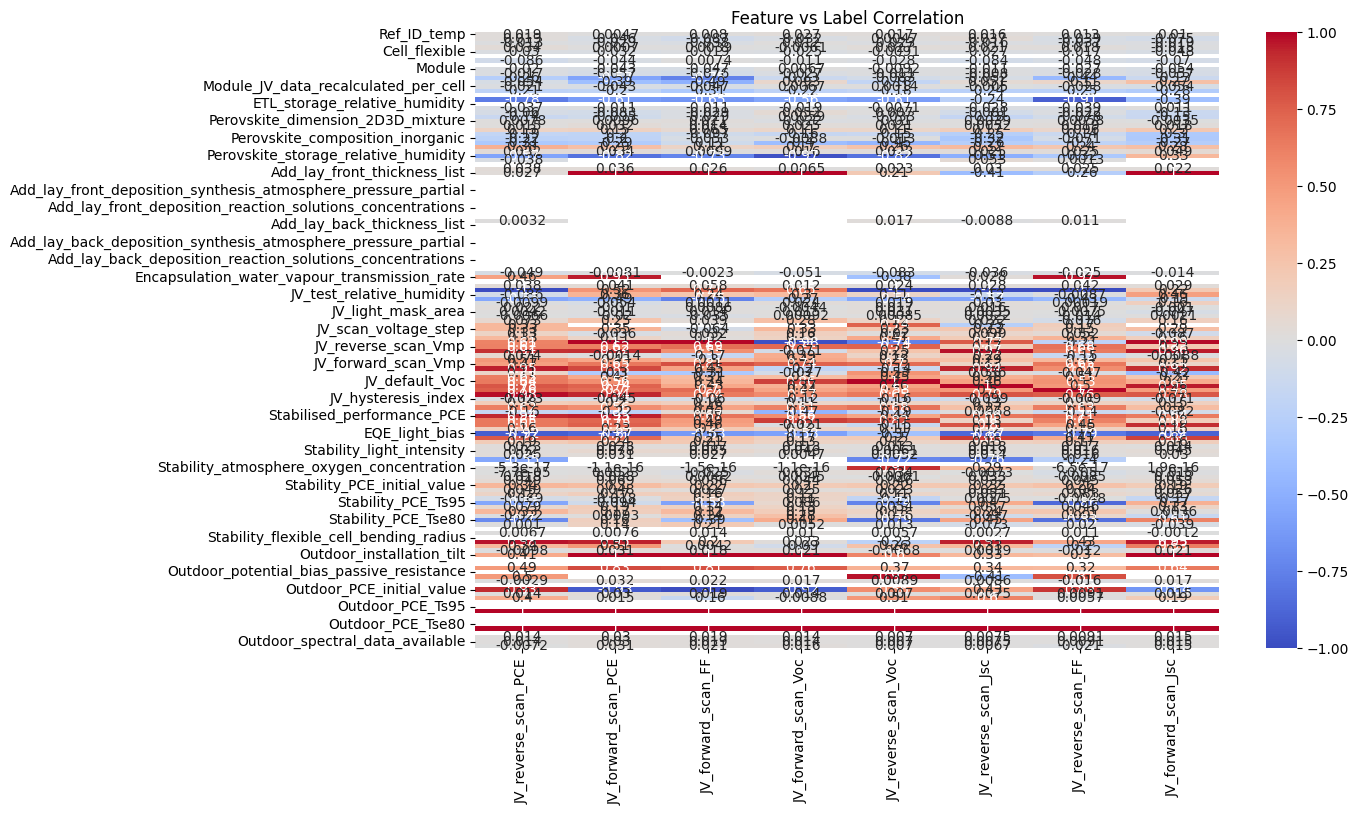

In [61]:
# Calculate correlation matrix
correlation_matrix = pd.concat([numerical_features, numerical_labels], axis=1).corr().loc[
    numerical_features.columns, numerical_labels.columns
]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature vs Label Correlation')
plt.show()


### feature importance

In [50]:
categorical_features = features.drop(columns=numerical_features.columns)
categorical_features = categorical_features.drop(columns=['Ref_DOI_number','Ref_journal', 'Perovskite_composition_short_form', 'Perovskite_pl_max'])

In [ ]:
categorical_features

Ref_name_of_person_entering_the_data  Ref_data_entered_by_author  \
0                                Waqas Zia                       False   
1                                Waqas Zia                       False   
8                              Hans Köbler                       False   
9                              Hans Köbler                       False   
10                             Hans Köbler                       False   
...                                    ...                         ...   
43372                      Xiaoliang Zhang                       False   
43373                          Ibrahim Dar                       False   
43374                          Ibrahim Dar                       False   
43375                  T. Jesper Jacobsson                       False   
43378                  T. Jesper Jacobsson                       False   

                Ref_DOI_number Ref_lead_author Ref_publication_date  \
0       10.1002/solr.201900109       Ye et al.           2019-04-30   
1       10.1002/solr.201900109       Ye et al.           2019-04-30   
8           10.1039/c7ra10321b      Lam et al.           2017-11-27   
9           10.1039/c7ra10321b      Lam et al.           2017-11-27   
10          10.1039/c7ra10321b      Lam et al.           2017-11-27   
...                        ...             ...                  ...   
43372  10.1126/science.aap9282      Luo et al.           2018-06-28   
43373  10.1126/science.aap9282      Luo et al.           2018-06-28   
43374  10.1126/science.aap9282      Luo et al.           2018-06-28   
43375  10.1126/science.1228604      Lee et al.           2012-10-06   
43378  10.1126/science.1228604      Lee et al.           2012-10-06   

        Ref_journal  Ref_part_of_initial_dataset  \
0         Solar RRL                         True   
1         Solar RRL                         True   
8      RSC Advances                         True   
9      RSC Advances                         True   
10     RSC Advances                         True   
...             ...                          ...   
43372       Science                         True   
43373       Science                         True   
43374       Science                         True   
43375       Science                         True   
43378       Science                         True   

            Ref_original_filename_data_upload Ref_free_text_comment  \
0      Historic dataset on 2020 11 22_v7.xlsx                   NaN   
1      Historic dataset on 2020 11 22_v7.xlsx                   NaN   
8      Historic dataset on 2020 11 22_v7.xlsx                   NaN   
9      Historic dataset on 2020 11 22_v7.xlsx                   NaN   
10     Historic dataset on 2020 11 22_v7.xlsx                   NaN   
...                                       ...                   ...   
43372  Historic dataset on 2020 11 22_v7.xlsx                   NaN   
43373  Historic dataset on 2020 11 22_v7.xlsx                   NaN   
43374  Historic dataset on 2020 11 22_v7.xlsx                   NaN   
43375  Historic dataset on 2020 11 22_v7.xlsx                   NaN   
43378  Historic dataset on 2020 11 22_v7.xlsx                   NaN   

      Ref_internal_sample_id  ... Outdoor_time_start  Outdoor_time_end  \
0                1% Pb(SCN)2  ...   0000:00:00:00:00  0000:00:00:00:00   
1                1% Pb(SCN)2  ...   0000:00:00:00:00  0000:00:00:00:00   
8             SnO2 (0.8 sun)  ...   0000:00:00:00:00  0000:00:00:00:00   
9        SnO2/PCBM (0.8 sun)  ...   0000:00:00:00:00  0000:00:00:00:00   
10          SnO2/PCBM (1sun)  ...   0000:00:00:00:00  0000:00:00:00:00   
...                      ...  ...                ...               ...   
43372                    NaN  ...   0000:00:00:00:00  0000:00:00:00:00   
43373                    NaN  ...   0000:00:00:00:00  0000:00:00:00:00   
43374                    NaN  ...   0000:00:00:00:00  0000:00:00:00:00   
43375                    NaN  ...   0000:00:00

In [ ]:
categorical_features['Perovskite_dimension_list_of_layers'].value_counts()

Perovskite_dimension_list_of_layers
3            30031
2              984
0               97
3.0 | 2.0       33
2.5             29
3.0 | 1.0        6
3.0 | 3.0        1
2.0 | 3.0        1
Name: count, dtype: int64

In [ ]:
labels['JV_reverse_scan_PCE'].isnull().sum()


np.int64(1293)

In [ ]:
# Perform One-Hot Encoding for each column in categorical_features
one_hot_encoded_list = []
for col in categorical_features.columns:
    # One-hot encode each column with its name as a prefix
    encoded = pd.get_dummies(categorical_features[col], prefix=col, prefix_sep='_', drop_first=False)
    one_hot_encoded_list.append(encoded)

# Concatenate all one-hot encoded columns into a new DataFrame
one_hot_features = pd.concat(one_hot_encoded_list, axis=1)

# Display the shape and a sample of the one-hot encoded DataFrame
one_hot_features_shape = one_hot_features.shape

one_hot_features

Ref_name_of_person_entering_the_data_Adam Hultqvist  \
0                                                  False     
1                                                  False     
8                                                  False     
9                                                  False     
10                                                 False     
...                                                  ...     
43372                                              False     
43373                                              False     
43374                                              False     
43375                                              False     
43378                                              False     

       Ref_name_of_person_entering_the_data_Alberto Garcia-Fernandez  \
0                                                  False               
1                                                  False               
8                                                  False               
9                                                  False               
10                                                 False               
...                                                  ...               
43372                                              False               
43373                                              False               
43374                                              False               
43375                                              False               
43378                                              False               

       Ref_name_of_person_entering_the_data_Aman Anand  \
0                                                False   
1                                                False   
8                                                False   
9                                                False   
10                                               False   
...                                                ...   
43372                                            False   
43373                                            False   
43374                                            False   
43375                                            False   
43378                                            False   

       Ref_name_of_person_entering_the_data_Amran Al-Ashour  \
0                                                  False      
1                                                  False      
8                                                  False      
9                                                  False      
10                                                 False      
...                                                  ...      
43372                                              False      
43373                                              False      
43374                                              False      
43375                                              False      
43378                                              False      

       Ref_name_of_person_entering_the_data_Andrea Crovetto  \
0                                                  False      
1                                                  False      
8                                                  False      
9                                                  False      
10                                                 False      
...                                                  ...      
43372                                              False      
43373                                              False      
43374                                              False      
43375                                              False      
43378                                              False      

       Ref_name_of_person_entering_the_data_Anton Dzhong  \
0                                                  False   
1                                                  False   
8     

#### Decision tree


In [ ]:
!pip install shap

In [ ]:
# Identify rows with non-null target labels
non_null_indices = labels['JV_reverse_scan_PCE'].notnull()

# Filter the main data_cleaned DataFrame and labels to remove rows with null labels
data_1_step = data_1_step[non_null_indices]
y = labels['JV_reverse_scan_PCE'][non_null_indices]

# Ensure one_hot_features is filtered the same way
one_hot_features = one_hot_features.loc[non_null_indices]

# Verify alignment
assert one_hot_features.index.equals(y.index), "Indices of features and labels are misaligned."

# At this point, `one_hot_features` and `y` are aligned and can be used for training
print("Updated one_hot_features shape:", one_hot_features.shape)
print("Updated labels shape:", y.shape)



Updated one_hot_features shape: (29900, 40524)
Updated labels shape: (29900,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# Split data
X_train, X_test, y_train, y_test = train_test_split(one_hot_features, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature importance
importance = model.feature_importances_
feature_names = X_train.columns

# Display feature importance
feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
# for feature, imp in feature_importance:
#     print(f"Feature: {feature}, Importance: {imp}")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to store aggregated feature importance
feature_importance_map = {}
feature_names = features.columns

# Aggregate the importance of one-hot encoded features back to the original features
for feature in feature_names:
    # Get all one-hot encoded columns related to the original feature
    related_cols = [col for col in one_hot_features.columns if col.startswith(feature + "_")]
    total_importance = 0
    # Sum the importances for each related column
    for col in related_cols:
        if col in one_hot_features.columns:
            # Retrieve the importance value for the one-hot column
            val = importance[one_hot_features.columns.get_loc(col)]
            # If the value is an array or list, sum its elements; otherwise, use the value directly
            if isinstance(val, (list, np.ndarray)):
                total_importance += np.sum(val)
            else:
                total_importance += val
    feature_importance_map[feature] = total_importance

# Convert the aggregated feature importance to a DataFrame and sort it
aggregated_importance = pd.DataFrame(
    list(feature_importance_map.items()), columns=["Feature", "Importance"]
)
aggregated_importance.sort_values(by="Importance", ascending=False, inplace=True)


<ipython-input-69-11bdf683adba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


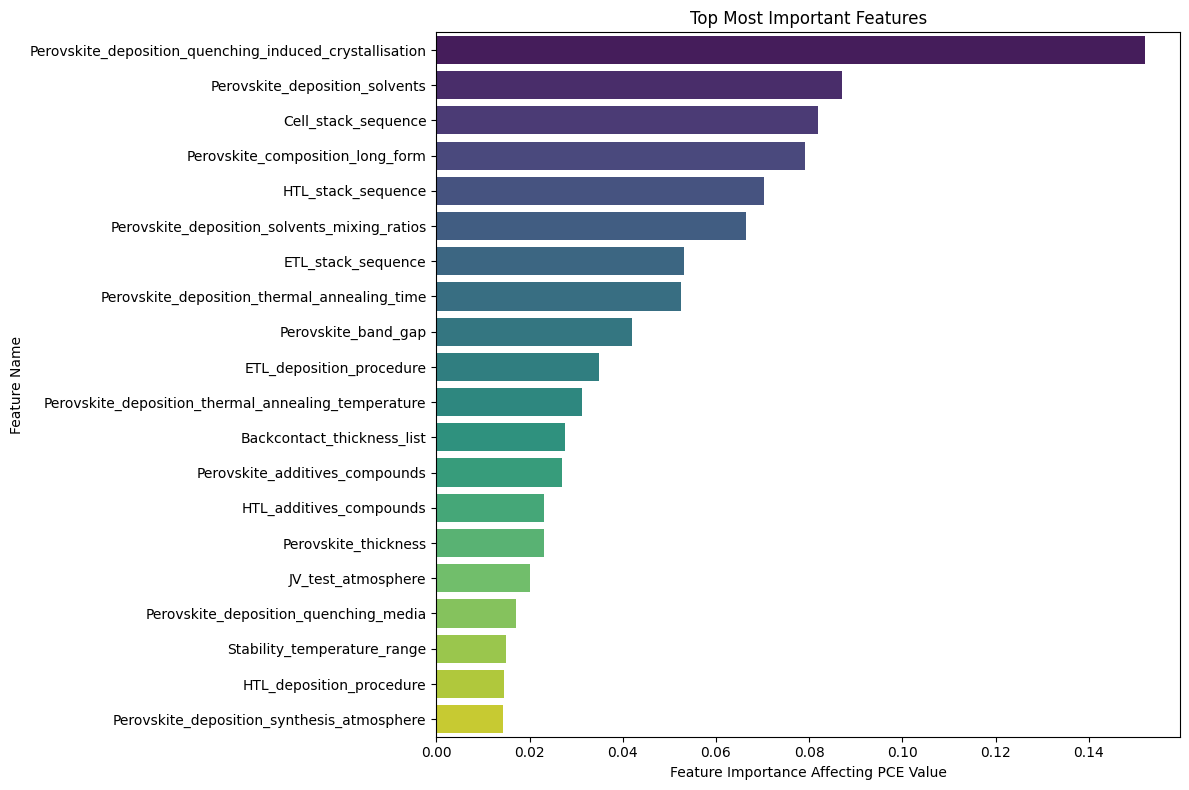

In [ ]:
# Plot the aggregated feature importances
plt.figure(figsize=(12, 8))
sns.barplot(
    data=aggregated_importance.head(20),  # Top 45 features
    x="Importance",
    y="Feature",
    palette="viridis"
)
plt.title("Top Most Important Features")
plt.xlabel("Feature Importance Affecting PCE Value")
plt.ylabel("Feature Name")
plt.tight_layout()

# Save the plot as an image file
plt.savefig("feature_importance_plot.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()

<ipython-input-71-805fdea2c22d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


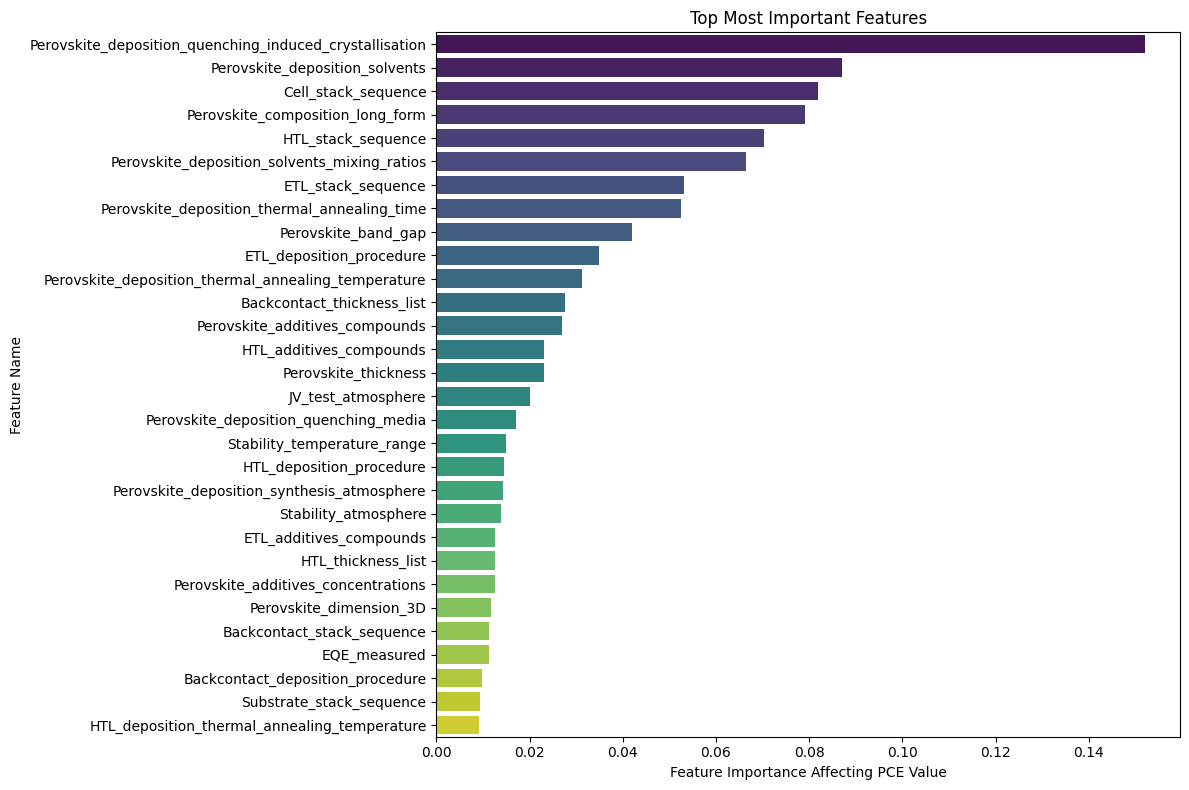

In [ ]:
# Plot the aggregated feature importances
plt.figure(figsize=(12, 8))
sns.barplot(
    data=aggregated_importance.head(30),  # Top 45 features
    x="Importance",
    y="Feature",
    palette="viridis"
)
plt.title("Top Most Important Features")
plt.xlabel("Feature Importance Affecting PCE Value")
plt.ylabel("Feature Name")
plt.tight_layout()

# Save the plot as an image file
plt.savefig("feature_importance_plot.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()

### Perovsike composition long form

In [ ]:
# Group data by Perovskite composition long form and calculate the average reverse PCE
average_pce_by_composition = data_1_step.groupby('Perovskite_composition_long_form')['JV_reverse_scan_PCE'].mean()

# Print the results
average_pce_by_composition


Perovskite_composition_long_form
(1.3-Pr(NH3)2)0.5Pb1.0I3     5.100000
(3AMP)FA0.45MA2.55Pb4I13     9.300000
(3AMP)FA0.6MA2.4Pb4I13      10.160000
(3AMP)FA0.75MA2.25Pb4I13     8.752000
(3AMP)FA0.9MA2.1Pb4I13      10.030000
                              ...    
PA2PbI4                      3.200000
PAPbI3                       2.390000
RbPbI3                       1.030000
nanPb2I8                     4.590000
nanPbI2                      5.146667
Name: JV_reverse_scan_PCE, Length: 1171, dtype: float64

In [ ]:
# prompt: check if Perovskite_composition_long_form  in data_1_step has nan or empty or unknown values

# Check for NaN, empty, or "unknown" values in 'Perovskite_composition_long_form'
nan_count = data_1_step['Perovskite_composition_long_form'].isnull().sum()
empty_count = data_1_step['Perovskite_composition_long_form'].eq('').sum()  # Check for empty strings
unknown_count = data_1_step['Perovskite_composition_long_form'].eq('unknown').sum() # Check for "unknown" strings
# Add more checks for other potential "unknown" representations if needed.  e.g., "Unknown", "?", etc.

print(f"NaN values in 'Perovskite_composition_long_form': {nan_count}")
print(f"Empty values in 'Perovskite_composition_long_form': {empty_count}")
print(f"Unknown values in 'Perovskite_composition_long_form': {unknown_count}")


NaN values in 'Perovskite_composition_long_form': 0
Empty values in 'Perovskite_composition_long_form': 0
Unknown values in 'Perovskite_composition_long_form': 0


<ipython-input-74-0c500827abba>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Perovskite_composition_long_form', y='JV_reverse_scan_PCE', data=filtered_data, palette="coolwarm")


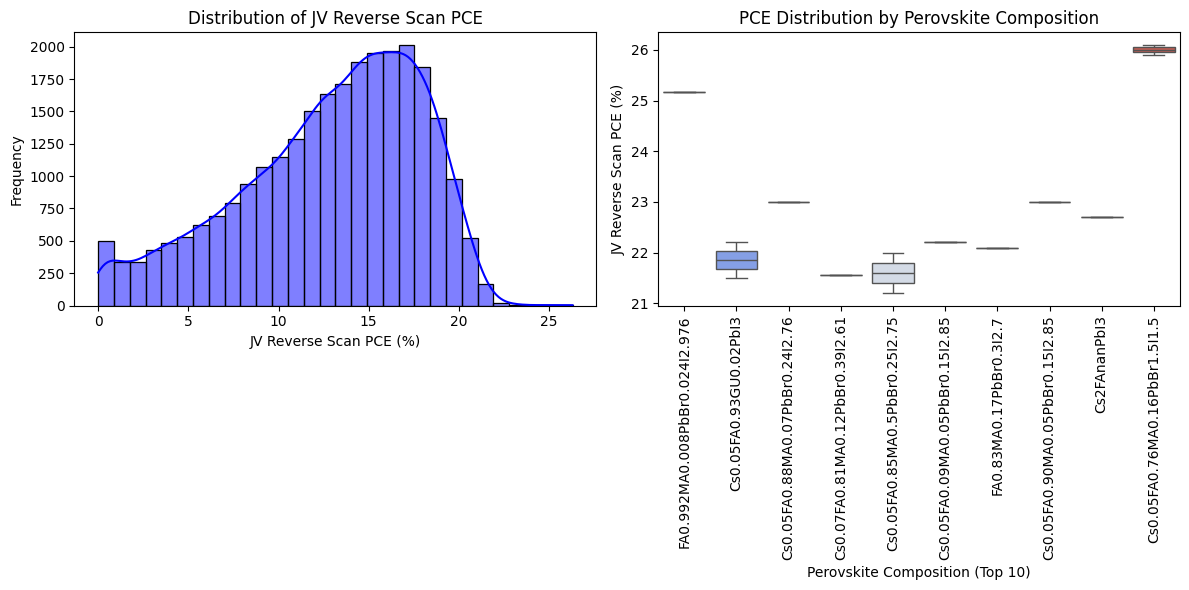

<ipython-input-74-0c500827abba>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Perovskite_composition_long_form', y='JV_reverse_scan_PCE', data=average_pce_by_composition.head(10), palette="viridis")


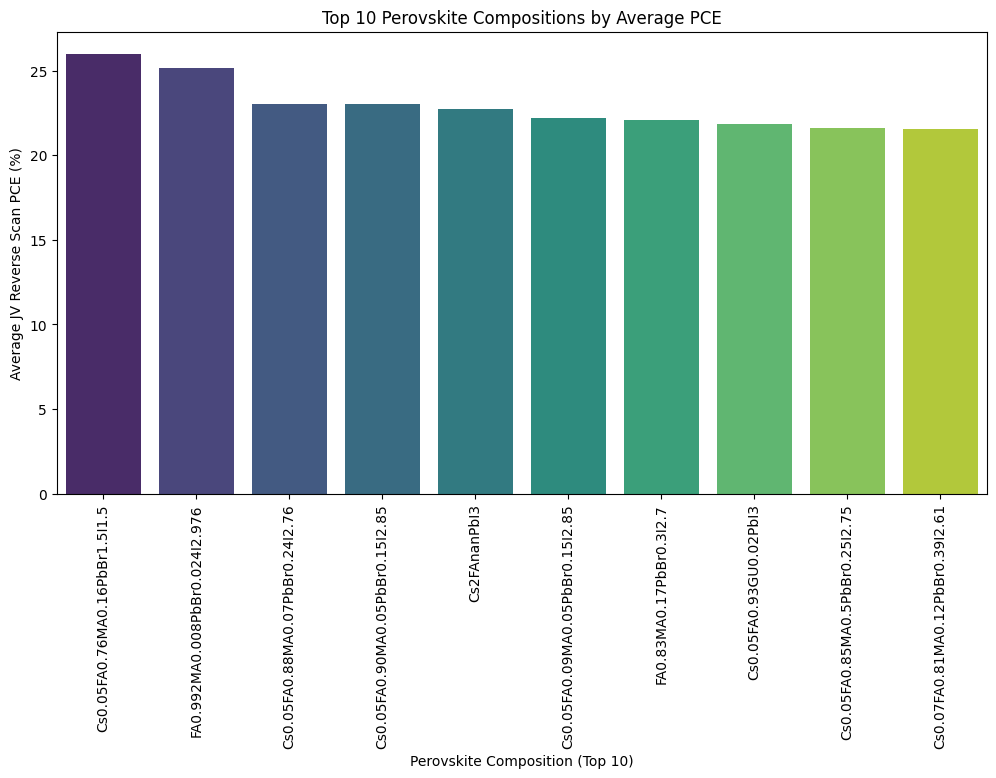

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample the dataset (assuming the user has provided it as a DataFrame named 'data')
# If needed, load from file: df = pd.read_csv("your_dataset.csv")

# Group by composition and calculate mean PCE
average_pce_by_composition = data_1_step.groupby('Perovskite_composition_long_form')['JV_reverse_scan_PCE'].mean().reset_index()

# Sort by efficiency for better visualization
average_pce_by_composition = average_pce_by_composition.sort_values(by='JV_reverse_scan_PCE', ascending=False)

# Set figure size
plt.figure(figsize=(12, 6))

# Histogram of PCE values
plt.subplot(1, 2, 1)
sns.histplot(data_1_step['JV_reverse_scan_PCE'], bins=30, kde=True, color='blue')
plt.xlabel("JV Reverse Scan PCE (%)")
plt.ylabel("Frequency")
plt.title("Distribution of JV Reverse Scan PCE")

# Boxplot of PCE grouped by composition (top 10 compositions)
top_compositions = average_pce_by_composition.head(10)['Perovskite_composition_long_form']
filtered_data = data_1_step[data_1_step['Perovskite_composition_long_form'].isin(top_compositions)]

plt.subplot(1, 2, 2)
sns.boxplot(x='Perovskite_composition_long_form', y='JV_reverse_scan_PCE', data=filtered_data, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Perovskite Composition (Top 10)")
plt.ylabel("JV Reverse Scan PCE (%)")
plt.title("PCE Distribution by Perovskite Composition")

plt.tight_layout()
plt.show()

# Bar Chart for Average PCE by Composition (Top 10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Perovskite_composition_long_form', y='JV_reverse_scan_PCE', data=average_pce_by_composition.head(10), palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Perovskite Composition (Top 10)")
plt.ylabel("Average JV Reverse Scan PCE (%)")
plt.title("Top 10 Perovskite Compositions by Average PCE")
plt.show()


### Quenching


In [ ]:
# Identify columns with "quenching" in their names
quenching_columns = [col for col in data_1_step.columns if "quenching" in col.lower()]
quenching_columns


['Perovskite_deposition_quenching_induced_crystallisation',
 'Perovskite_deposition_quenching_media',
 'Perovskite_deposition_quenching_media_mixing_ratios',
 'Perovskite_deposition_quenching_media_volume',
 'Perovskite_deposition_quenching_media_additives_compounds',
 'Perovskite_deposition_quenching_media_additives_concentrations']

In [ ]:
data_1_step.shape


(31193, 410)

/tmp/ipython-input-619028604.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=selected_feature, y='JV_reverse_scan_PCE', data=subset_box, palette="coolwarm")


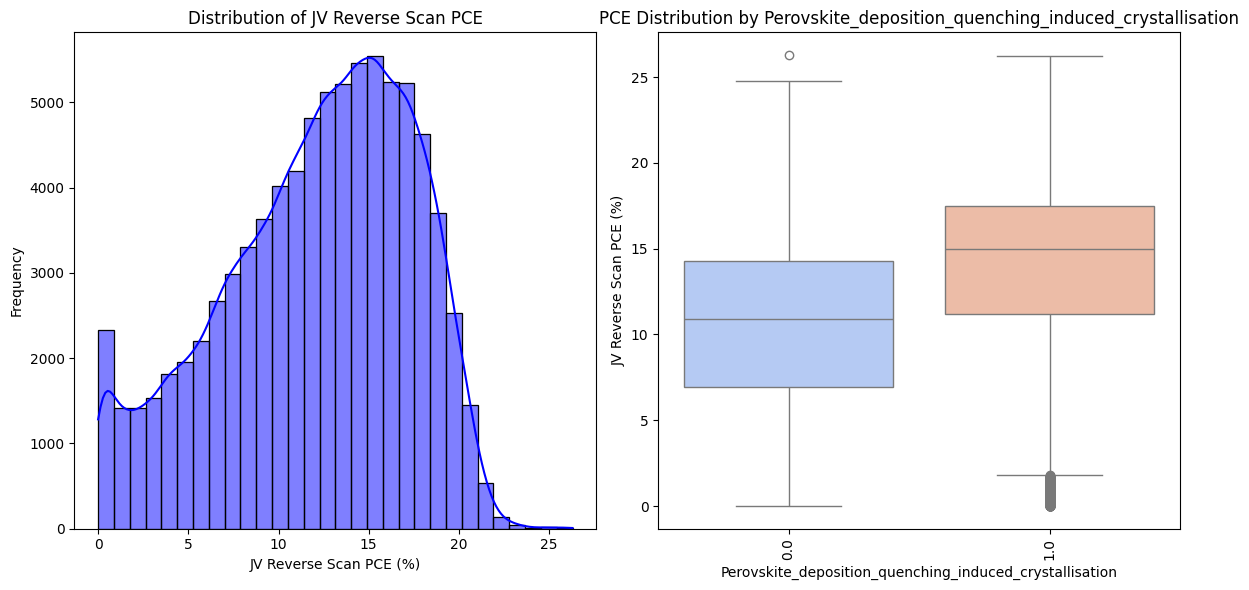

/tmp/ipython-input-619028604.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[feature] = subset[feature].astype(str)
/tmp/ipython-input-619028604.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='JV_reverse_scan_PCE', data=avg_pce_by_quenching, palette="viridis")


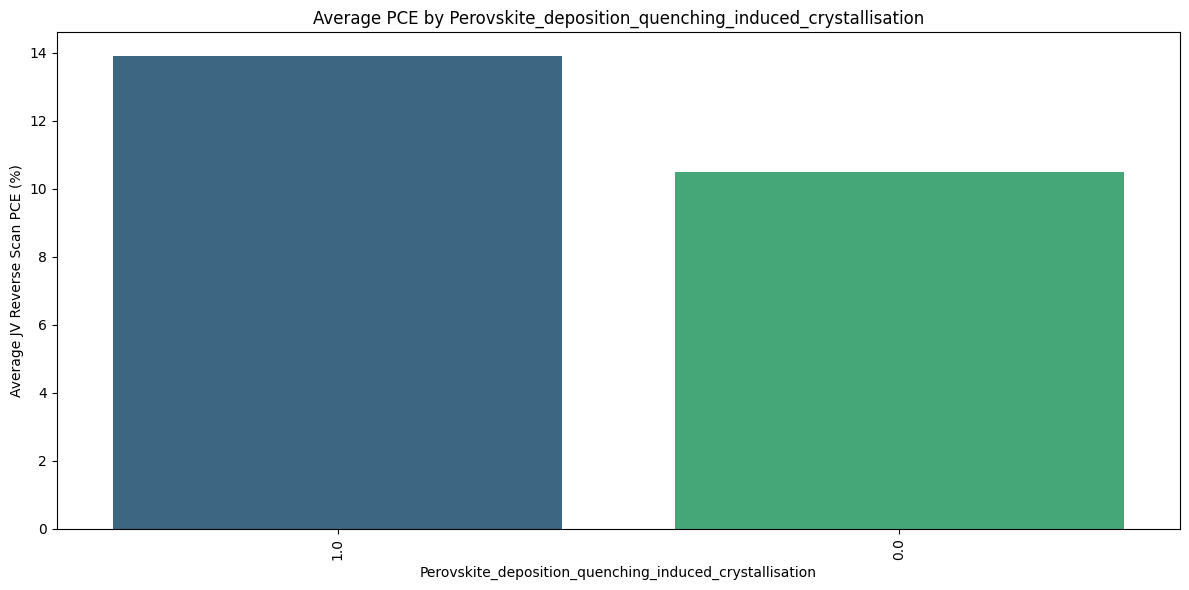

/tmp/ipython-input-619028604.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[feature] = subset[feature].astype(str)
/tmp/ipython-input-619028604.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='JV_reverse_scan_PCE', data=avg_pce_by_quenching, palette="viridis")


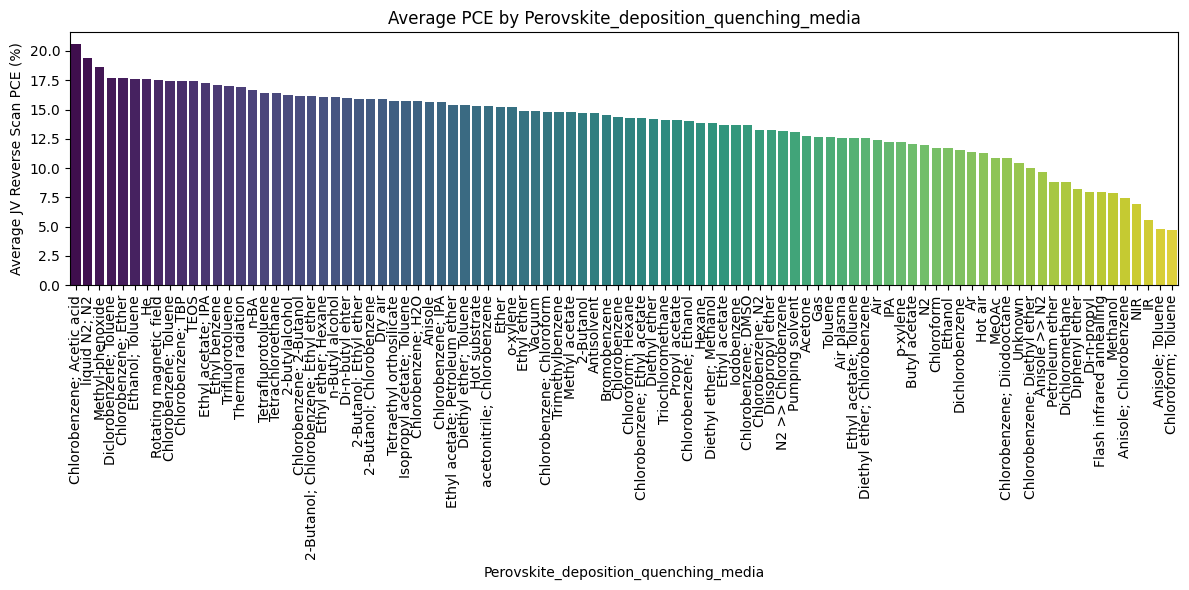

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Identify columns with "quenching" in their names
quenching_columns = [col for col in data.columns if "quenching" in col.lower()]

# Melt the dataset: create a long-form DataFrame for the quenching features
data_long = data.melt(
    id_vars=['JV_reverse_scan_PCE'],
    value_vars=quenching_columns,
    var_name="Quenching_Feature",
    value_name="Quenching_Value"
)

# Convert JV_reverse_scan_PCE to numeric (if not already)
data_long['JV_reverse_scan_PCE'] = pd.to_numeric(data_long['JV_reverse_scan_PCE'], errors='coerce')

# Drop rows with missing PCE values
data_long = data_long.dropna(subset=['JV_reverse_scan_PCE'])

# ---- Visualization 1: Histogram of JV_reverse_scan_PCE ----
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_long['JV_reverse_scan_PCE'], bins=30, kde=True, color='blue')
plt.xlabel("JV Reverse Scan PCE (%)")
plt.ylabel("Frequency")
plt.title("Distribution of JV Reverse Scan PCE")

# ---- Visualization 2: Boxplot for a Selected Quenching Feature ----
# (Select one quenching feature; here, we use the first one)
selected_feature = quenching_columns[0]
subset_box = data[data[selected_feature].notnull()]

plt.subplot(1, 2, 2)
sns.boxplot(x=selected_feature, y='JV_reverse_scan_PCE', data=subset_box, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel(selected_feature)
plt.ylabel("JV Reverse Scan PCE (%)")
plt.title("PCE Distribution by " + selected_feature)
plt.tight_layout()
plt.show()

# ---- Visualization 3: Bar Chart of Average PCE by Quenching Value for Each Quenching Feature ----
# Loop through each quenching feature and calculate the average PCE per unique value
for feature in quenching_columns:
    # Filter out missing values for the feature
    subset = data[data[feature].notnull()]

    # Ensure the feature is treated as a categorical variable
    subset[feature] = subset[feature].astype(str)

    # Group by the quenching value and calculate mean PCE
    avg_pce_by_quenching = subset.groupby(feature)['JV_reverse_scan_PCE'].mean().reset_index()
    avg_pce_by_quenching = avg_pce_by_quenching.sort_values(by='JV_reverse_scan_PCE', ascending=False)

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature, y='JV_reverse_scan_PCE', data=avg_pce_by_quenching, palette="viridis")
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel("Average JV Reverse Scan PCE (%)")
    plt.title("Average PCE by " + feature)
    plt.tight_layout()
    plt.show()


In [ ]:
# quenching_categorical=['Perovskite_deposition_quenching_media',
#  'Perovskite_deposition_quenching_media_additives_compounds']
quenching_categorical=['Perovskite_deposition_quenching_media']

In [ ]:
data.columns

Index(['Ref_DOI_number', 'Ref_internal_sample_id',
       'Perovskite_composition_b_ions',
       'Perovskite_composition_b_ions_coefficients',
       'Perovskite_composition_c_ions',
       'Perovskite_composition_c_ions_coefficients',
       'Perovskite_composition_long_form', 'Perovskite_additives_compounds',
       'Perovskite_additives_concentrations', 'Perovskite_thickness',
       'Perovskite_deposition_procedure', 'Perovskite_deposition_solvents',
       'Perovskite_deposition_solvents_mixing_ratios',
       'Perovskite_deposition_quenching_induced_crystallisation',
       'Perovskite_deposition_quenching_media',
       'Perovskite_deposition_thermal_annealing_temperature',
       'Perovskite_deposition_thermal_annealing_time', 'JV_reverse_scan_Voc',
       'JV_reverse_scan_Jsc', 'JV_reverse_scan_FF', 'JV_reverse_scan_PCE',
       'JV_forward_scan_Voc', 'JV_forward_scan_Jsc', 'JV_forward_scan_FF',
       'JV_forward_scan_PCE'],
      dtype='object')

In [ ]:
value_counts = data["Perovskite_deposition_quenching_media"].value_counts()

In [ ]:
data[data["Perovskite_deposition_quenching_media"] == "Chlorobenzene; DMSO"]

Ref_DOI_number Ref_internal_sample_id  \
9440             10.1039/c9ta08564e                    NaN   
9441             10.1039/c9ta08564e                    NaN   
9442             10.1039/c9ta08564e                    NaN   
9443             10.1039/c9ta08564e                    NaN   
9597   10.1016/j.apsusc.2017.02.150                   DRM2   
9601   10.1016/j.apsusc.2017.02.150                   DRM3   
9602   10.1016/j.apsusc.2017.02.150                   DRM1   
40890  10.1016/j.apsusc.2017.02.150            DRM Average   

      Perovskite_composition_b_ions  \
9440                        Pb | Pb   
9441                        Pb | Pb   
9442                        Pb | Pb   
9443                        Pb | Pb   
9597                             Pb   
9601                             Pb   
9602                             Pb   
40890                            Pb   

      Perovskite_composition_b_ions_coefficients  \
9440                                       1 | 2   
9441                                       1 | 2   
9442                                       1 | 2   
9443                                       1 | 2   
9597                                           1   
9601                                           1   
9602                                           1   
40890                                          1   

      Perovskite_composition_c_ions  \
9440                  Br; I | Br; I   
9441                  Br; I | Br; I   
9442                  Br; I | Br; I   
9443                  Br; I | Br; I   
9597                              I   
9601                              I   
9602                              I   
40890                             I   

      Perovskite_composition_c_ions_coefficients  \
9440                                 1; 2 | 1; 6   
9441                                 1; 2 | 1; 6   
9442                                 1; 2 | 1; 6   
9443                                 1; 2 | 1; 6   
9597                                           3   
9601                                           3   
9602                                           3   
40890                                          3   

      Perovskite_composition_long_form Perovskite_additives_compounds  \
9440           CsPbBrI2 | BA2CsPb2BrI6                            NaN   
9441           CsPbBrI2 | BA2CsPb2BrI6                            NaN   
9442           CsPbBrI2 | BA2CsPb2BrI6                            NaN   
9443           CsPbBrI2 | BA2CsPb2BrI6                            NaN   
9597                            MAPbI3                            NaN   
9601                            MAPbI3                            NaN   
9602                            MAPbI3                            NaN   
40890                           MAPbI3                            NaN   

      Perovskite_additives_concentrations Perovskite_thickness  ...  \
9440                                  NaN                  NaN  ...   
9441                                  NaN                  NaN  ...   
9442                                  NaN                  NaN  ...   
9443                                  NaN                  NaN  ...   
9597                                  NaN                  NaN  ...   
9601                                  NaN                  NaN  ...   
9602                                  NaN                  NaN  ...   
40890                                 NaN                  NaN  ...   

      Perovskite_deposition_thermal_annealing_temperature  \
9440                                      150.0 >> 150.0    
9441                                      150.0 >> 150.0    
9442                                      150.0 >> 150.0    
9443                                      150.0 >> 150.0    
9597                                                 100    
9601                                                 100    
9602                                                 100    
40890                             

In [ ]:
data.loc[
    data["Perovskite_deposition_quenching_media"] == "Chlorobenzene; DMSO",
    "Perovskite_deposition_quenching_media"
] = "Chlorobenzene"

In [ ]:
value_counts

Perovskite_deposition_quenching_media
Unknown                   21696
Chlorobenzene             10007
Toluene                    3659
Diethyl ether              2613
Ethyl acetate               943
                          ...  
Chlorobenzene; Ethanol        1
Di-n-butyl ehter              1
Di-n-propyl                   1
Ethyl benzene                 1
Air plasma                    1
Name: count, Length: 94, dtype: int64

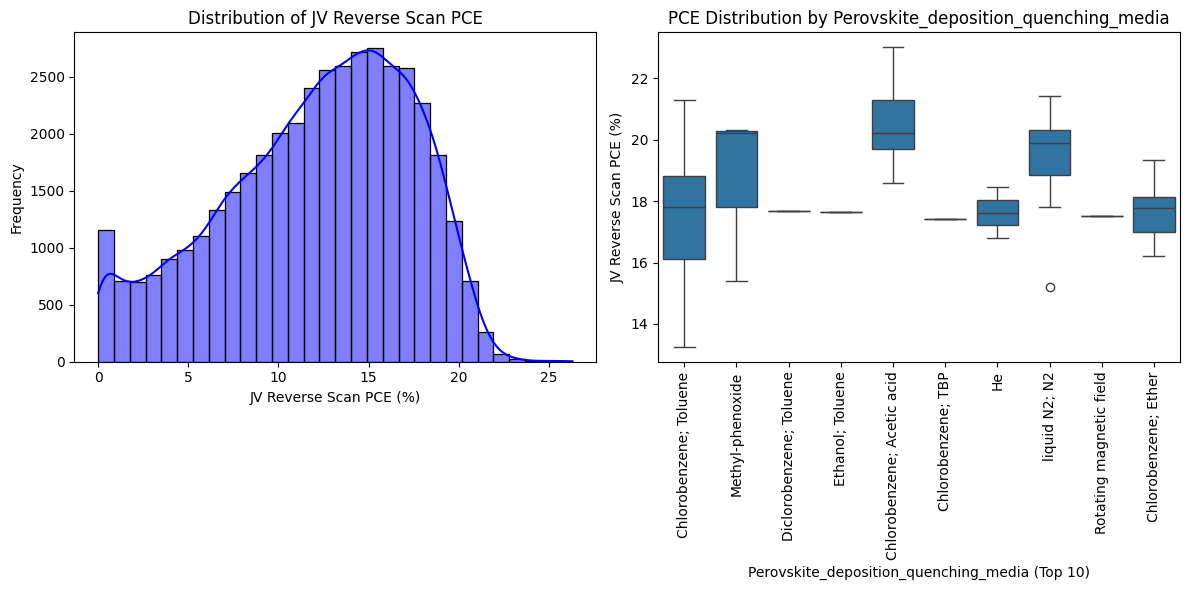

/tmp/ipython-input-3976726014.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='JV_reverse_scan_PCE', data=avg_pce_by_quenching.head(10), palette="viridis")


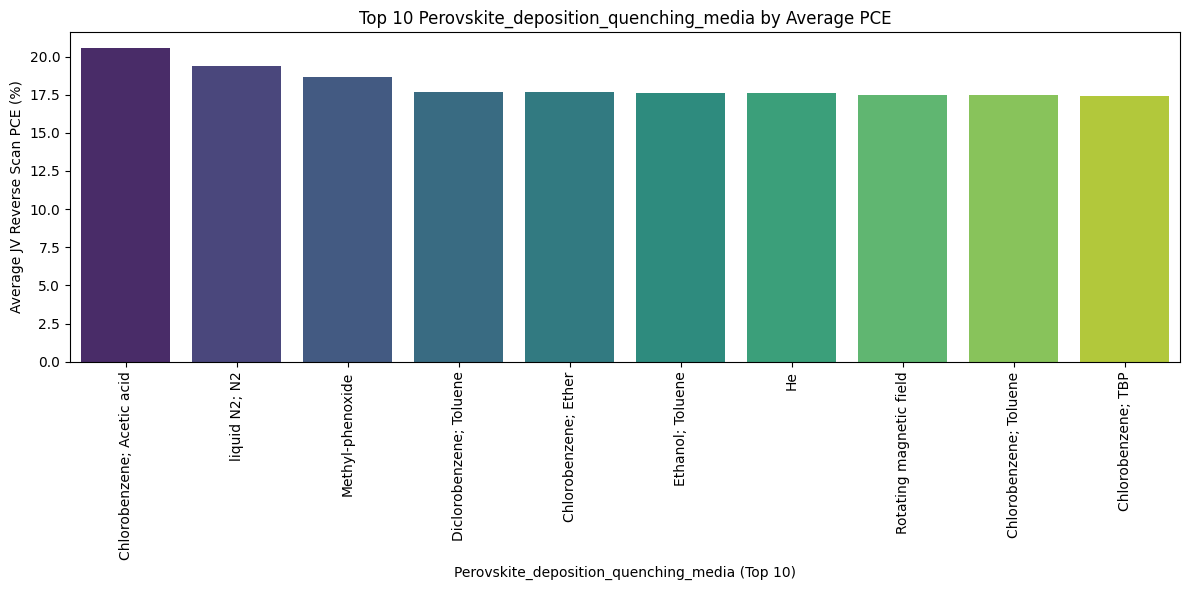

In [ ]:
# Remove NaN values from quenching-related categorical features
for feature in quenching_categorical:
    data = data[data[feature].notna()]

# Ensure 'Perovskite_deposition_quenching_media_additives_concentrations' is analyzed in relation to 'Perovskite_deposition_quenching_media_additives_compounds'
# quenching_concentration_feature = 'Perovskite_deposition_quenching_media_additives_concentrations'
quenching_compound_feature = 'Perovskite_deposition_quenching_media'

# Remove NaNs from both related features
data = data[data[quenching_compound_feature].notna()]

# ---- Visualization 1: Boxplot of PCE grouped by quenching category (top 10) ----
for feature in quenching_categorical:
    avg_pce_by_quenching = data.groupby(feature)['JV_reverse_scan_PCE'].mean().reset_index()
    avg_pce_by_quenching = avg_pce_by_quenching.sort_values(by='JV_reverse_scan_PCE', ascending=False)

    top_values = avg_pce_by_quenching.head(10)[feature]
    filtered_data = data[data[feature].isin(top_values)]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data['JV_reverse_scan_PCE'], bins=30, kde=True, color='blue')
    plt.xlabel("JV Reverse Scan PCE (%)")
    plt.ylabel("Frequency")
    plt.title("Distribution of JV Reverse Scan PCE")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=feature, y='JV_reverse_scan_PCE', data=filtered_data)
    plt.xticks(rotation=90)
    plt.xlabel(feature + " (Top 10)")
    plt.ylabel("JV Reverse Scan PCE (%)")
    plt.title(f"PCE Distribution by {feature}")

    plt.tight_layout()
    plt.show()

    # ---- Visualization 2: Bar Chart of Average PCE per Quenching Category ----
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature, y='JV_reverse_scan_PCE', data=avg_pce_by_quenching.head(10), palette="viridis")
    plt.xticks(rotation=90)
    plt.xlabel(feature + " (Top 10)")
    plt.ylabel("Average JV Reverse Scan PCE (%)")
    plt.title(f"Top 10 {feature} by Average PCE")
    plt.tight_layout()
    plt.show()


### Thermal annealing temp.


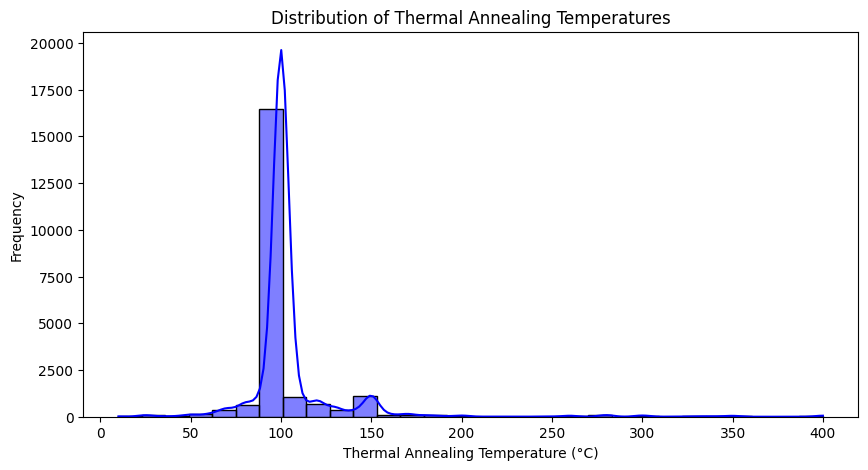

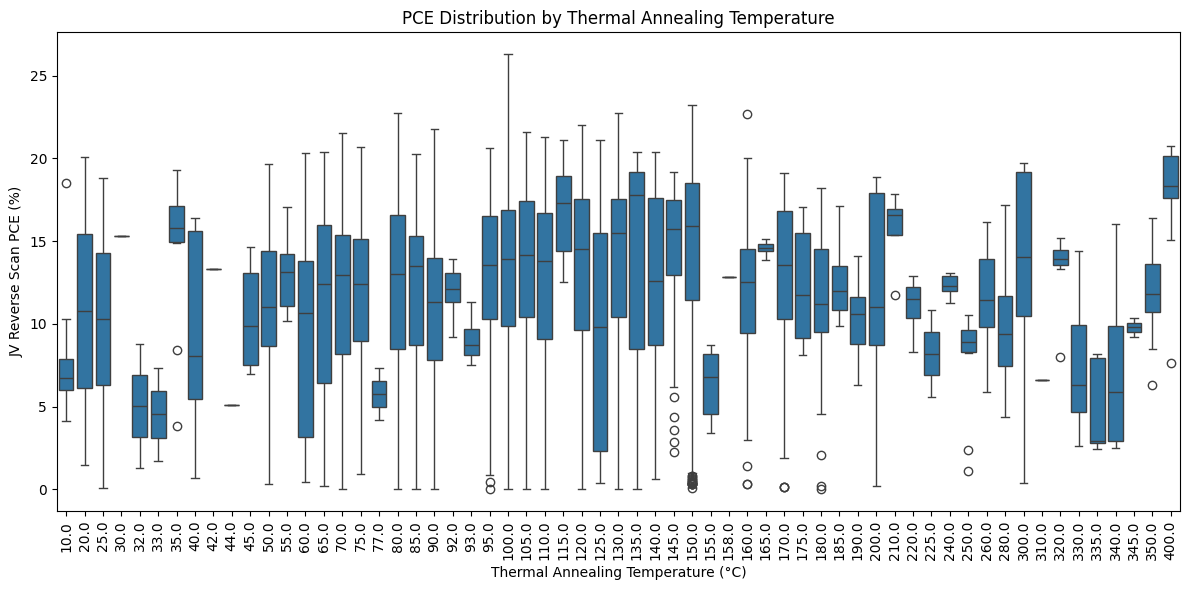

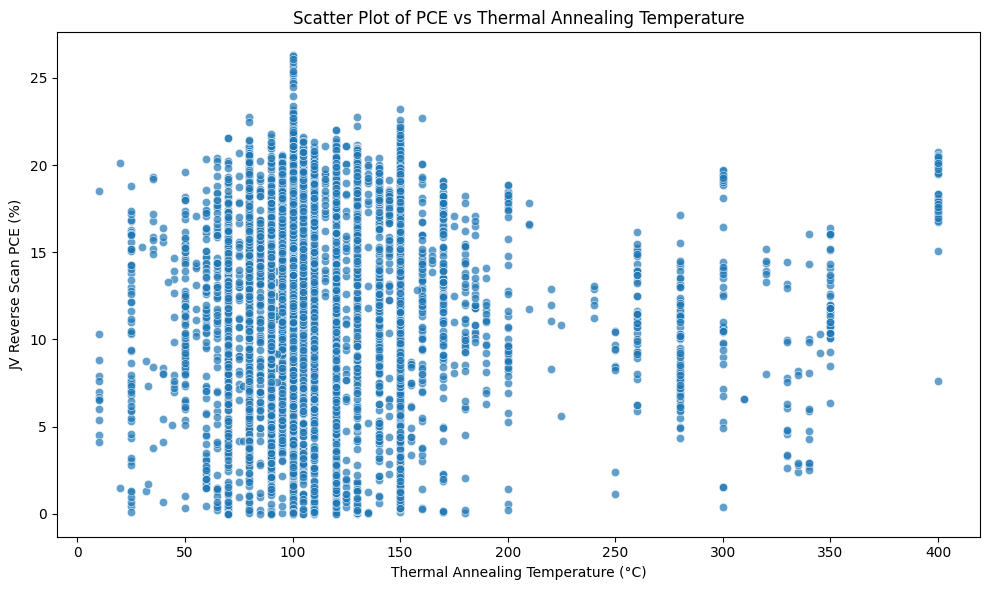

In [ ]:
# Define the thermal annealing temperature feature
thermal_annealing_feature = "Perovskite_deposition_thermal_annealing_temperature"

# Ensure the feature is numeric
data_1_step[thermal_annealing_feature] = pd.to_numeric(data_1_step[thermal_annealing_feature], errors='coerce')

# Drop NaN values
filtered_data = data_1_step.dropna(subset=[thermal_annealing_feature])

# ---- Visualization 1: Histogram of Thermal Annealing Temperature ----
plt.figure(figsize=(10, 5))
sns.histplot(filtered_data[thermal_annealing_feature], bins=30, kde=True, color='blue')
plt.xlabel("Thermal Annealing Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Thermal Annealing Temperatures")
plt.show()

# ---- Visualization 2: Boxplot of JV Reverse Scan PCE by Thermal Annealing Temperature ----
plt.figure(figsize=(12, 6))
sns.boxplot(x=thermal_annealing_feature, y="JV_reverse_scan_PCE", data=filtered_data)
plt.xticks(rotation=90)
plt.xlabel("Thermal Annealing Temperature (°C)")
plt.ylabel("JV Reverse Scan PCE (%)")
plt.title("PCE Distribution by Thermal Annealing Temperature")
plt.tight_layout()
plt.show()

# ---- Visualization 3: Scatter Plot of PCE vs Thermal Annealing Temperature ----
plt.figure(figsize=(10, 6))
sns.scatterplot(x=thermal_annealing_feature, y="JV_reverse_scan_PCE", data=filtered_data, alpha=0.7)
plt.xlabel("Thermal Annealing Temperature (°C)")
plt.ylabel("JV Reverse Scan PCE (%)")
plt.title("Scatter Plot of PCE vs Thermal Annealing Temperature")
plt.tight_layout()
plt.show()


In [ ]:
# prompt: remove all rows with ['JV_reverse_scan_PCE']>30

data_1_step = data_1_step[data_1_step['JV_reverse_scan_PCE'] <= 30]


<ipython-input-82-7d7ec78cc272>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=thermal_annealing_feature, y="JV_reverse_scan_PCE", data=avg_pce_by_temp, palette="viridis")


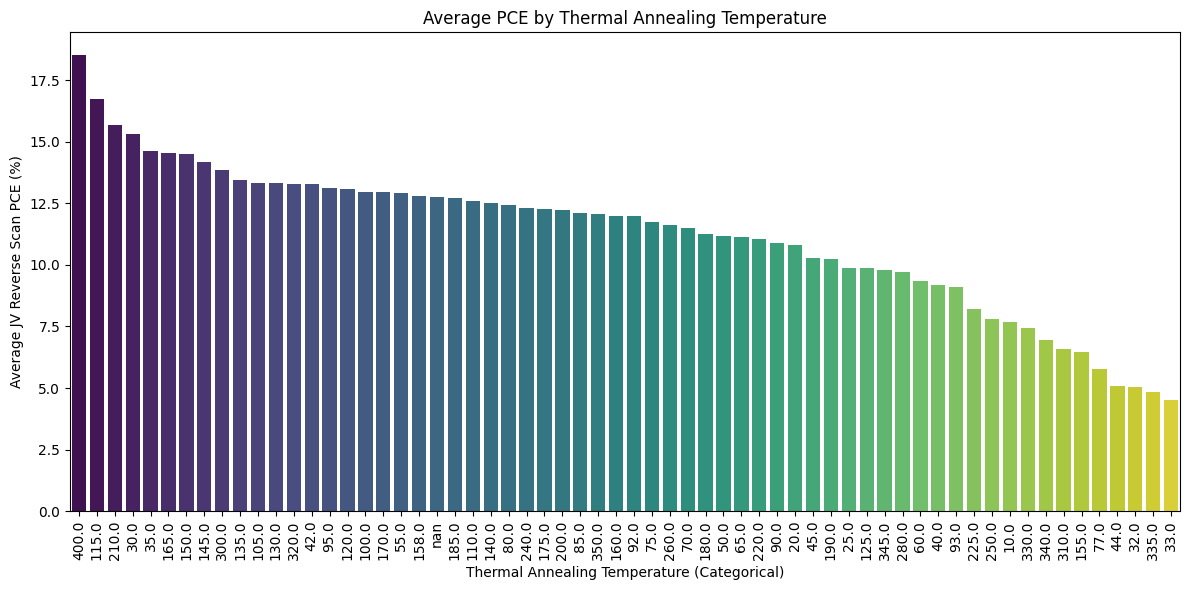

<ipython-input-82-7d7ec78cc272>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=thermal_annealing_feature, y="JV_reverse_scan_PCE", data=filtered_data, palette="coolwarm")


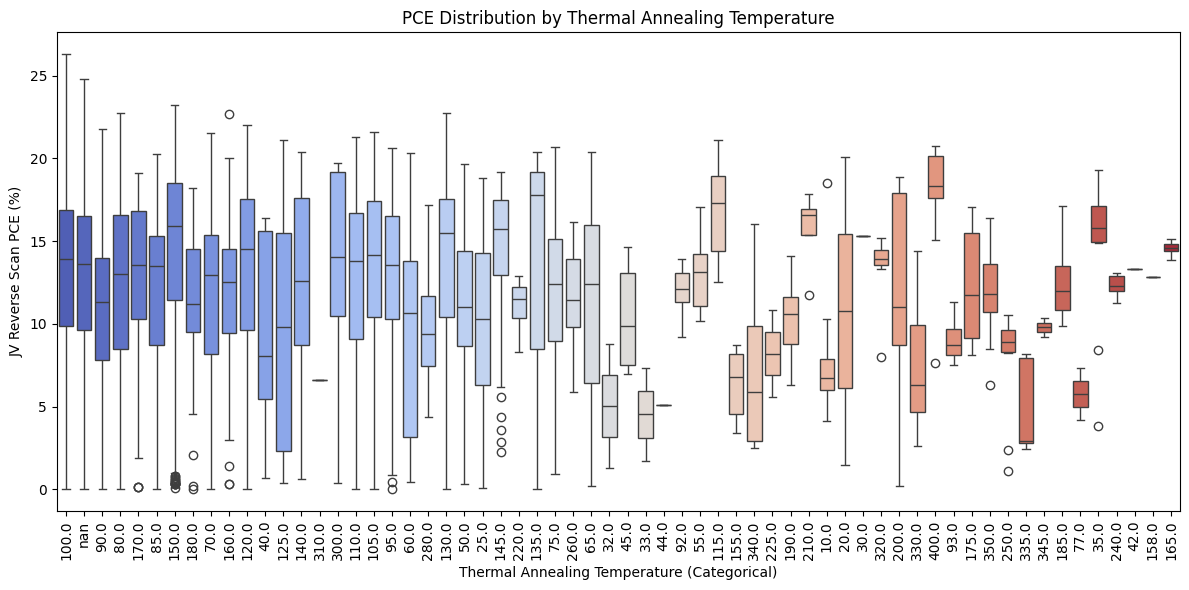

In [ ]:
# Define the thermal annealing temperature feature as categorical
thermal_annealing_feature = "Perovskite_deposition_thermal_annealing_temperature"

# Ensure it is treated as a categorical variable
data_1_step[thermal_annealing_feature] = data_1_step[thermal_annealing_feature].astype(str)

# Remove NaN values
filtered_data = data_1_step.dropna(subset=[thermal_annealing_feature])

# ---- Visualization 1: Bar Chart of Average PCE by Thermal Annealing Temperature ----
avg_pce_by_temp = filtered_data.groupby(thermal_annealing_feature)['JV_reverse_scan_PCE'].mean().reset_index()
avg_pce_by_temp = avg_pce_by_temp.sort_values(by='JV_reverse_scan_PCE', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=thermal_annealing_feature, y="JV_reverse_scan_PCE", data=avg_pce_by_temp, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Thermal Annealing Temperature (Categorical)")
plt.ylabel("Average JV Reverse Scan PCE (%)")
plt.title("Average PCE by Thermal Annealing Temperature")
plt.tight_layout()
plt.show()

# ---- Visualization 2: Boxplot of PCE by Thermal Annealing Temperature ----
plt.figure(figsize=(12, 6))
sns.boxplot(x=thermal_annealing_feature, y="JV_reverse_scan_PCE", data=filtered_data, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Thermal Annealing Temperature (Categorical)")
plt.ylabel("JV Reverse Scan PCE (%)")
plt.title("PCE Distribution by Thermal Annealing Temperature")
plt.tight_layout()
plt.show()


### Annealing time

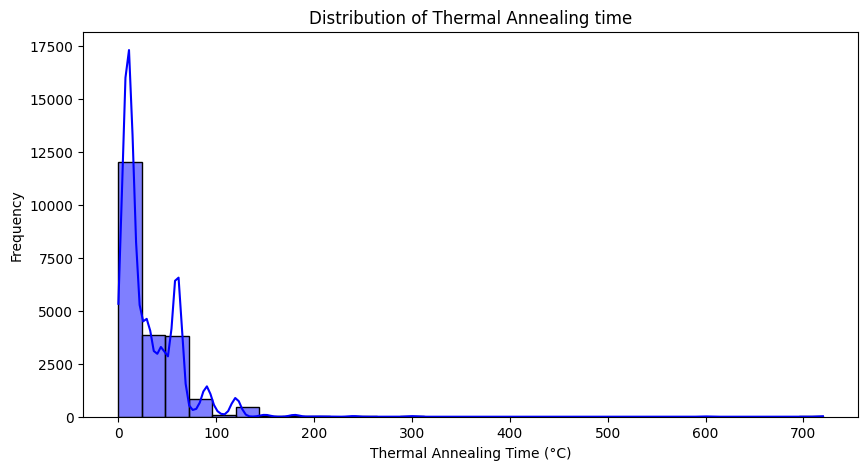

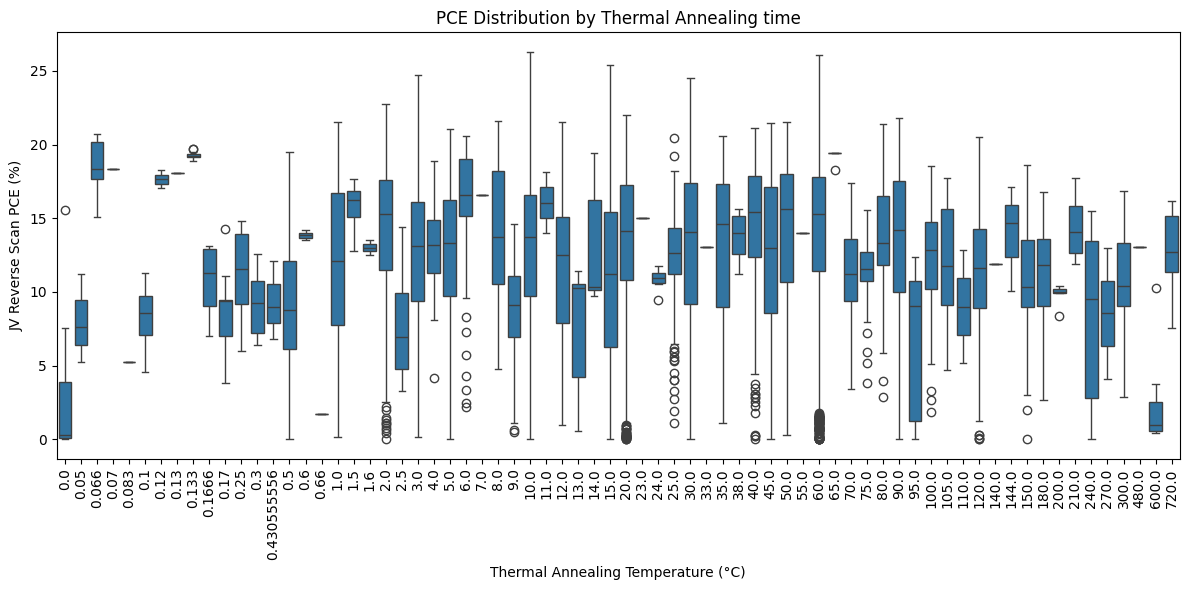

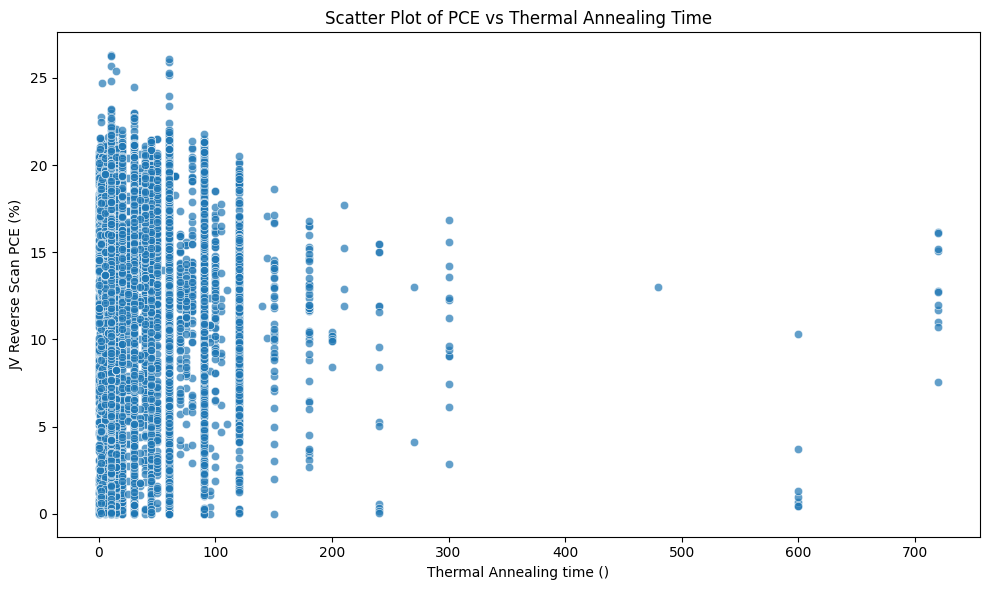

In [ ]:
# Define the thermal annealing time feature
thermal_annealing_time_feature = "Perovskite_deposition_thermal_annealing_time"

# Ensure the feature is numeric
data_1_step[thermal_annealing_time_feature] = pd.to_numeric(data_1_step[thermal_annealing_time_feature], errors='coerce')

# Drop NaN values
filtered_data = data_1_step.dropna(subset=[thermal_annealing_time_feature])

# ---- Visualization 1: Histogram of Thermal Annealing Time ----
plt.figure(figsize=(10, 5))
sns.histplot(filtered_data[thermal_annealing_time_feature], bins=30, kde=True, color='blue')
plt.xlabel("Thermal Annealing Time (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Thermal Annealing time")
plt.show()

# ---- Visualization 2: Boxplot of JV Reverse Scan PCE by Thermal Annealing Time ----
plt.figure(figsize=(12, 6))
sns.boxplot(x=thermal_annealing_time_feature, y="JV_reverse_scan_PCE", data=filtered_data)
plt.xticks(rotation=90)
plt.xlabel("Thermal Annealing Temperature (°C)")
plt.ylabel("JV Reverse Scan PCE (%)")
plt.title("PCE Distribution by Thermal Annealing time")
plt.tight_layout()
plt.show()

# ---- Visualization 3: Scatter Plot of PCE vs Thermal Annealing Temperature ----
plt.figure(figsize=(10, 6))
sns.scatterplot(x=thermal_annealing_time_feature, y="JV_reverse_scan_PCE", data=filtered_data, alpha=0.7)
plt.xlabel("Thermal Annealing time ()")
plt.ylabel("JV Reverse Scan PCE (%)")
plt.title("Scatter Plot of PCE vs Thermal Annealing Time")
plt.tight_layout()
plt.show()


<ipython-input-84-f42becc51487>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=thermal_annealing_feature, y="JV_reverse_scan_PCE", data=avg_pce_by_temp.head(20), palette="viridis")


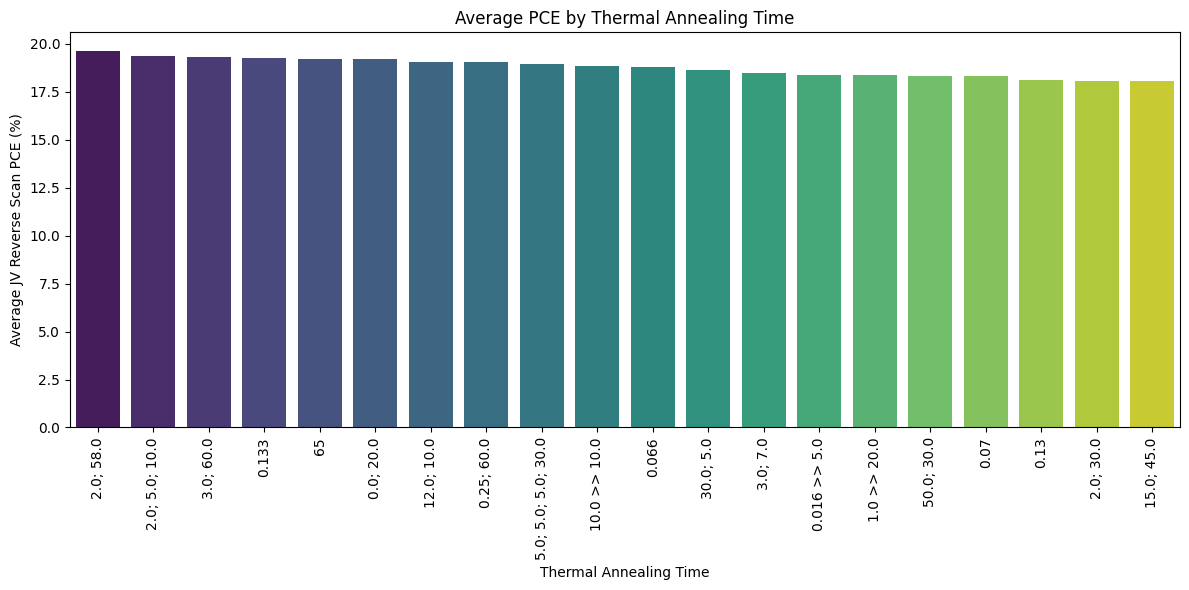

<ipython-input-84-f42becc51487>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=thermal_annealing_feature, y="JV_reverse_scan_PCE", data=filtered_data, palette="coolwarm")


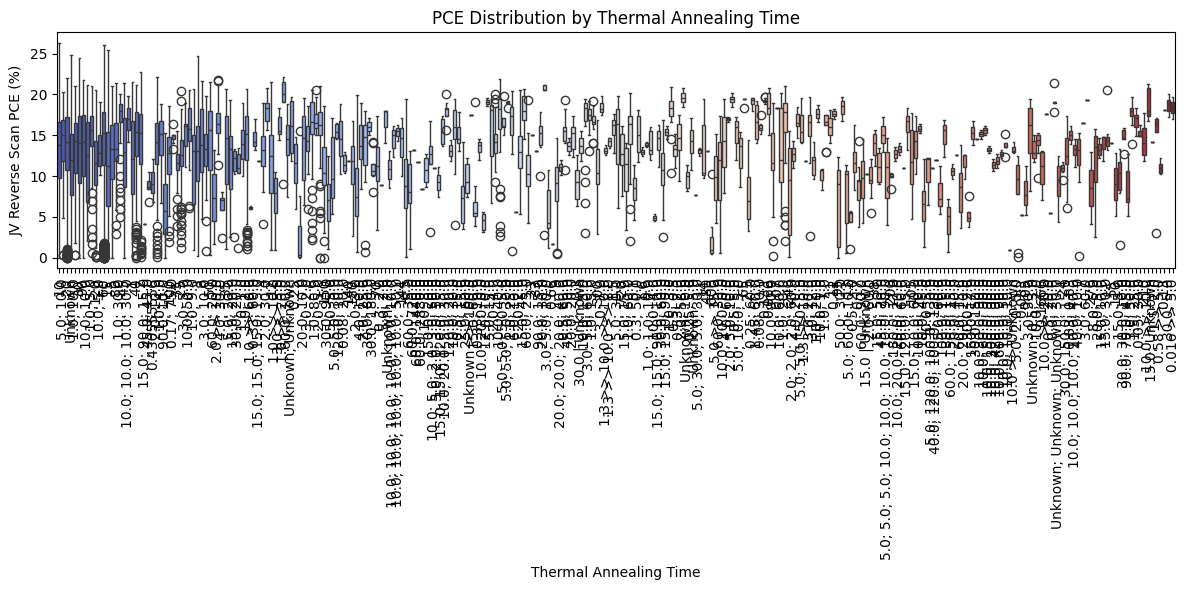

In [ ]:
# Define the thermal annealing time feature as categorical
thermal_annealing_feature = "Perovskite_deposition_thermal_annealing_time"

# Ensure it is treated as a categorical variable
data_1_step[thermal_annealing_feature] = data_1_step[thermal_annealing_feature].astype(str)

# Remove NaN values
filtered_data = data_1_step.dropna(subset=[thermal_annealing_feature])

# ---- Visualization 1: Bar Chart of Average PCE by Thermal Annealing Time ----
avg_pce_by_temp = filtered_data.groupby(thermal_annealing_feature)['JV_reverse_scan_PCE'].mean().reset_index()
avg_pce_by_temp = avg_pce_by_temp.sort_values(by='JV_reverse_scan_PCE', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=thermal_annealing_feature, y="JV_reverse_scan_PCE", data=avg_pce_by_temp.head(20), palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Thermal Annealing Time")
plt.ylabel("Average JV Reverse Scan PCE (%)")
plt.title("Average PCE by Thermal Annealing Time")
plt.tight_layout()
plt.show()

# ---- Visualization 2: Boxplot of PCE by Thermal Annealing Time ----
plt.figure(figsize=(12, 6))
sns.boxplot(x=thermal_annealing_feature, y="JV_reverse_scan_PCE", data=filtered_data, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Thermal Annealing Time")
plt.ylabel("JV Reverse Scan PCE (%)")
plt.title("PCE Distribution by Thermal Annealing Time")
plt.tight_layout()
plt.show()


### Annealing Temperature and time

<Figure size 1000x600 with 0 Axes>

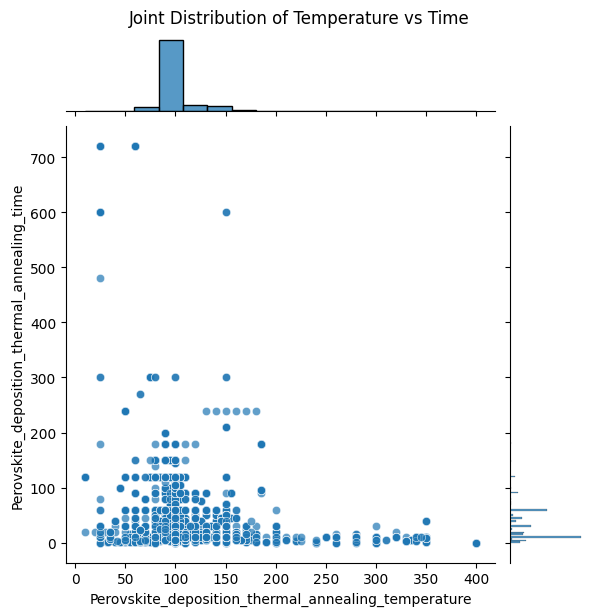

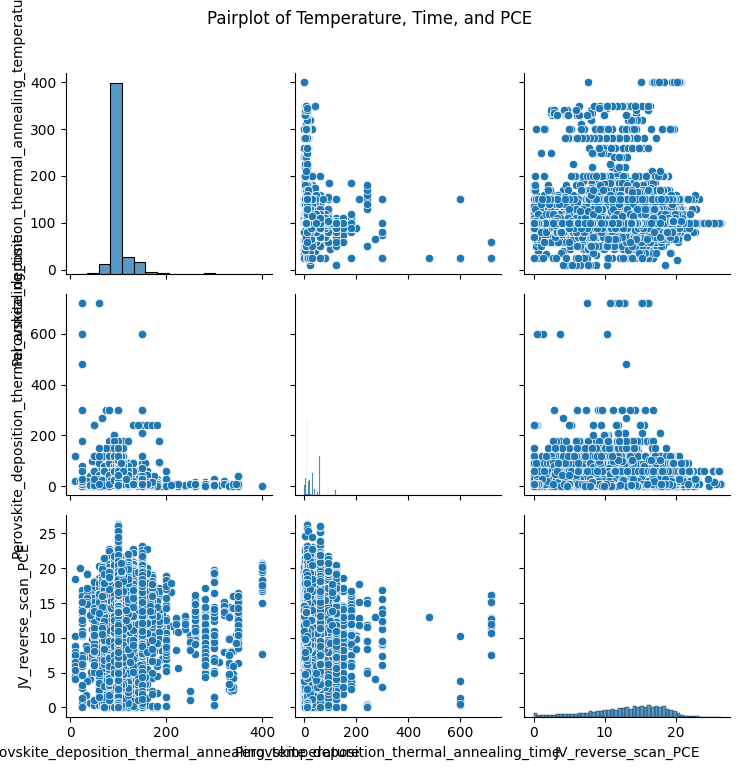

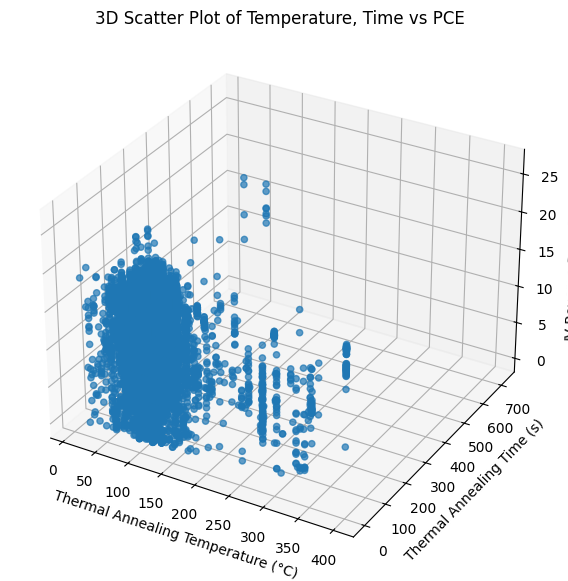

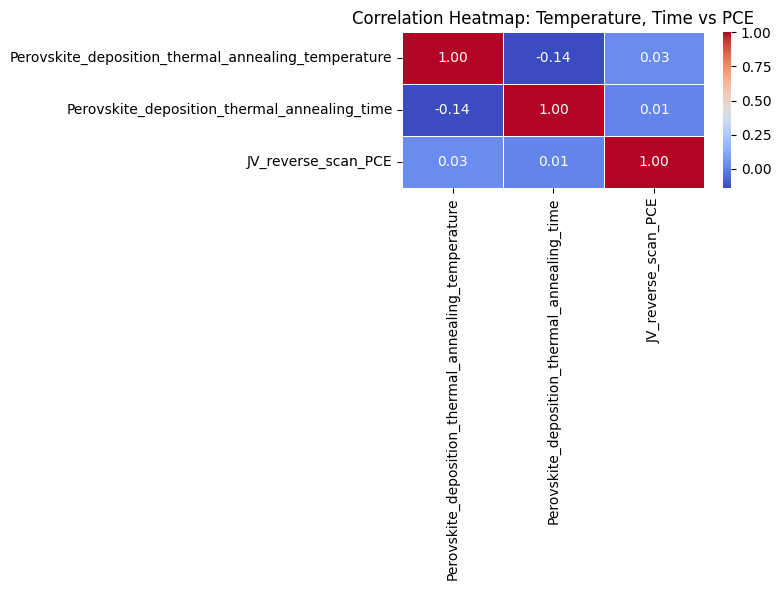

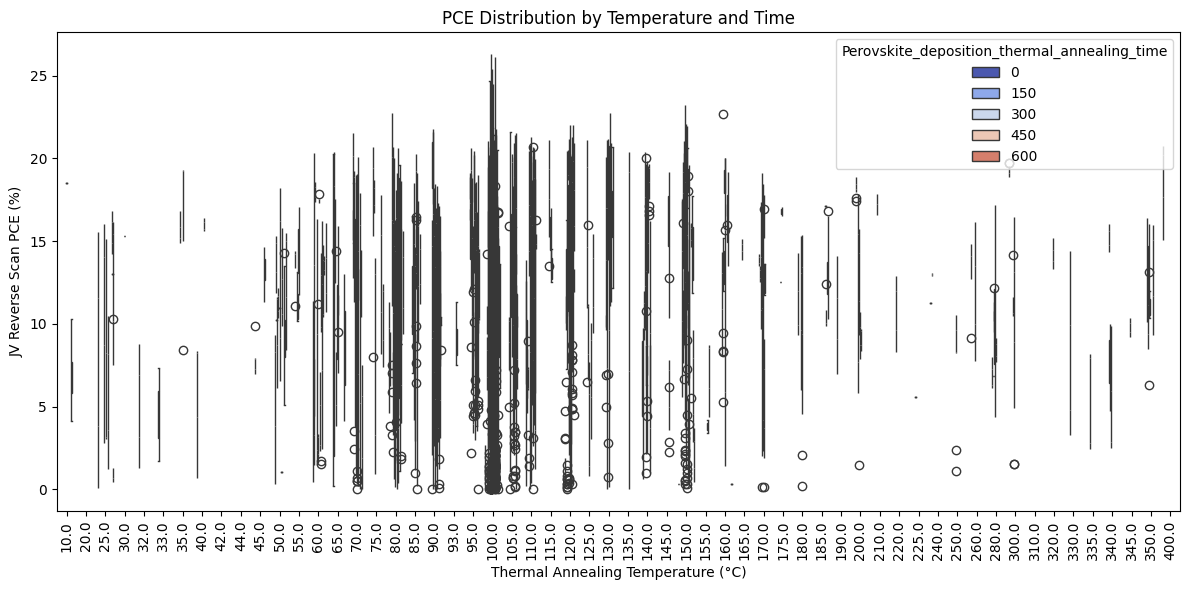

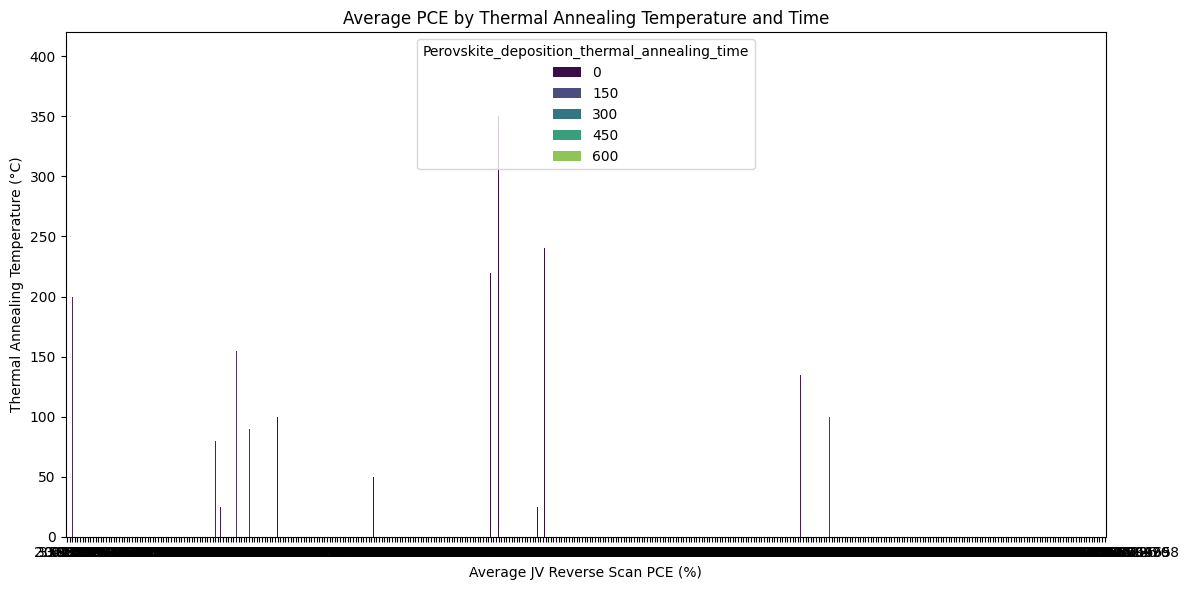

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the thermal annealing temperature feature
thermal_annealing_temp_feature = "Perovskite_deposition_thermal_annealing_temperature"
thermal_annealing_time_feature = "Perovskite_deposition_thermal_annealing_time"

# Ensure both features are numeric
data_1_step[thermal_annealing_temp_feature] = pd.to_numeric(data_1_step[thermal_annealing_temp_feature], errors='coerce')
data_1_step[thermal_annealing_time_feature] = pd.to_numeric(data_1_step[thermal_annealing_time_feature], errors='coerce')

# Drop NaN values for both features
filtered_data = data_1_step.dropna(subset=[thermal_annealing_temp_feature, thermal_annealing_time_feature])

# ---- Visualization 1: Joint Distribution of Temperature vs Time ----
plt.figure(figsize=(10, 6))
sns.jointplot(x=thermal_annealing_temp_feature, y=thermal_annealing_time_feature, data=filtered_data, kind="scatter", alpha=0.7)
plt.suptitle("Joint Distribution of Temperature vs Time", y=1.02)
plt.show()

# ---- Visualization 2: Pairplot of Temperature, Time and PCE ----
sns.pairplot(filtered_data, vars=[thermal_annealing_temp_feature, thermal_annealing_time_feature, "JV_reverse_scan_PCE"], kind='scatter')
plt.suptitle("Pairplot of Temperature, Time, and PCE", y=1.02)
plt.tight_layout()
plt.show()

# ---- Visualization 3: 3D Scatter Plot of Temperature, Time vs PCE ----
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    filtered_data[thermal_annealing_temp_feature],
    filtered_data[thermal_annealing_time_feature],
    filtered_data["JV_reverse_scan_PCE"],
    alpha=0.7
)
ax.set_xlabel("Thermal Annealing Temperature (°C)")
ax.set_ylabel("Thermal Annealing Time (s)")
ax.set_zlabel("JV Reverse Scan PCE (%)")
ax.set_title("3D Scatter Plot of Temperature, Time vs PCE")
plt.show()

# ---- Visualization 4: Heatmap of Correlation between Temperature, Time and PCE ----
corr_matrix = filtered_data[[thermal_annealing_temp_feature, thermal_annealing_time_feature, "JV_reverse_scan_PCE"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Temperature, Time vs PCE")
plt.tight_layout()
plt.show()

# ---- Visualization 5: Boxplot of PCE Distribution by Temperature and Time ----
plt.figure(figsize=(12, 6))
sns.boxplot(x=thermal_annealing_temp_feature, y="JV_reverse_scan_PCE", data=filtered_data, hue=thermal_annealing_time_feature, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Thermal Annealing Temperature (°C)")
plt.ylabel("JV Reverse Scan PCE (%)")
plt.title("PCE Distribution by Temperature and Time")
plt.tight_layout()
plt.show()

# ---- Visualization 6: Bar Chart of Average PCE by Thermal Annealing Temperature and Time ----
# Grouping by both temperature and time
avg_pce_by_temp_time = filtered_data.groupby([thermal_annealing_temp_feature, thermal_annealing_time_feature])["JV_reverse_scan_PCE"].mean().reset_index()

# Sorting the values by Average PCE
avg_pce_by_temp_time = avg_pce_by_temp_time.sort_values(by="JV_reverse_scan_PCE", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="JV_reverse_scan_PCE", y=thermal_annealing_temp_feature, hue=thermal_annealing_time_feature, data=avg_pce_by_temp_time, palette="viridis")
plt.xlabel("Average JV Reverse Scan PCE (%)")
plt.ylabel("Thermal Annealing Temperature (°C)")
plt.title("Average PCE by Thermal Annealing Temperature and Time")
plt.tight_layout()
plt.show()


### HTL and ETL additives




<ipython-input-162-102449091847>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_name, y="JV_reverse_scan_PCE", data=top_10, palette="coolwarm")


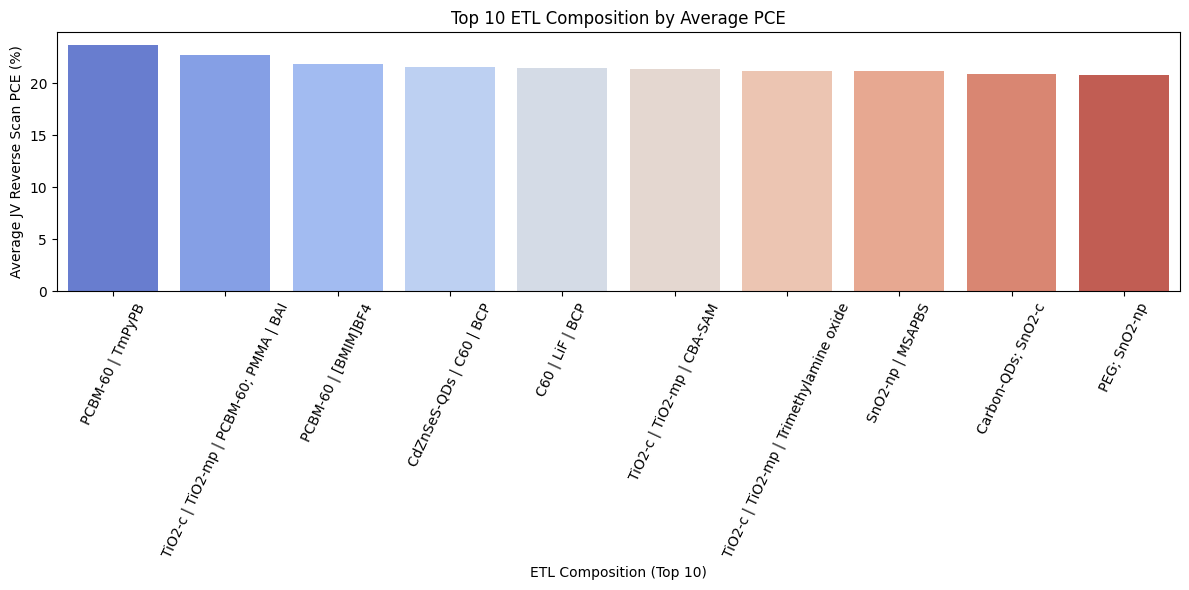

<ipython-input-162-102449091847>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_name, y="JV_reverse_scan_PCE", data=top_10, palette="coolwarm")


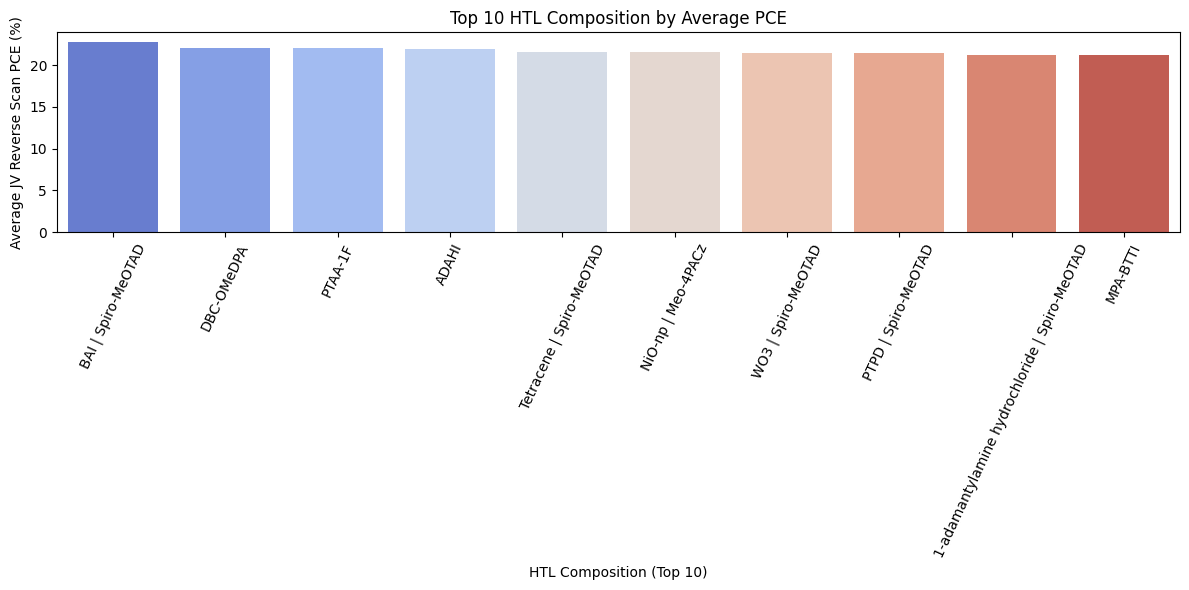

<ipython-input-162-102449091847>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_name, y="JV_reverse_scan_PCE", data=top_10, palette="coolwarm")


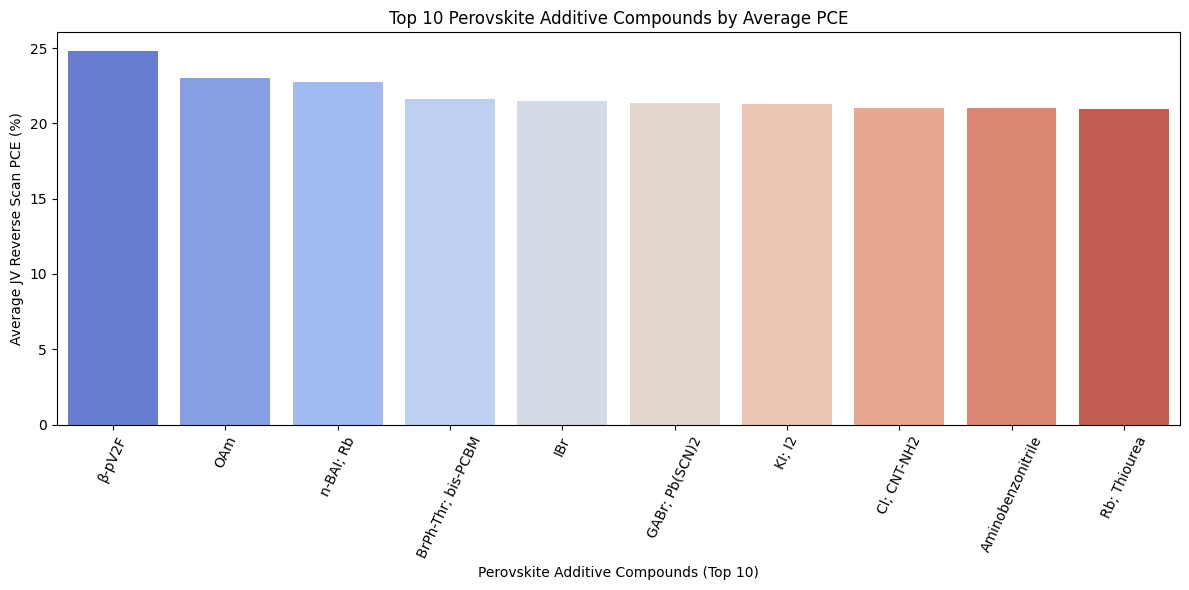

In [ ]:
# Define corrected column names
etl_feature = "ETL_stack_sequence"
htl_feature = "HTL_stack_sequence"
additive_feature = "Perovskite_additives_compounds"

# Ensure they are treated as categorical variables
data_1_step[etl_feature] = data_1_step[etl_feature].astype(str)
data_1_step[htl_feature] = data_1_step[htl_feature].astype(str)
data_1_step[additive_feature] = data_1_step[additive_feature].astype(str)

# Remove NaN values from these columns
filtered_data = data_1_step.dropna(subset=[etl_feature, htl_feature, additive_feature])

# ---- Function to Generate Bar Charts for Average PCE ----
def plot_avg_pce_by_feature(feature_name, title_label):
    avg_pce_by_feature = filtered_data.groupby(feature_name)['JV_reverse_scan_PCE'].mean().reset_index()
    avg_pce_by_feature = avg_pce_by_feature.sort_values(by='JV_reverse_scan_PCE', ascending=False)

    # Select top 10 categories for visualization
    top_10 = avg_pce_by_feature.head(10)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature_name, y="JV_reverse_scan_PCE", data=top_10, palette="coolwarm")
    plt.xticks(rotation=65)
    plt.xlabel(title_label + " (Top 10)")
    plt.ylabel("Average JV Reverse Scan PCE (%)")
    plt.title(f"Top 10 {title_label} by Average PCE")
    plt.tight_layout()
    plt.show()

# ---- Generate Bar Charts ----
plot_avg_pce_by_feature(etl_feature, "ETL Composition")
plot_avg_pce_by_feature(htl_feature, "HTL Composition")
plot_avg_pce_by_feature(additive_feature, "Perovskite Additive Compounds")


##2-step


In [ ]:
data_2_step = all_data[all_data['Perovskite_deposition_number_of_deposition_steps'] == 2.0]
data_2_step

Ref_ID                 Ref_DOI_number  \
18      16879             10.1039/C5TA03802B   
28       3735  10.1021/acs.chemmater.6b02583   
29       3736  10.1021/acs.chemmater.6b02583   
30       3737  10.1021/acs.chemmater.6b02583   
31       3738  10.1021/acs.chemmater.6b02583   
...       ...                            ...   
43363   35248        10.1126/science.aap9282   
43364   35249        10.1126/science.aap9282   
43365   35250        10.1126/science.aap9282   
43366   35254        10.1126/science.aap9282   
43367   35253        10.1126/science.aap9282   

                                     Cell_stack_sequence  Cell_area_measured  \
18     SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Ca...                0.10   
28     SLG | ITO | PEDOT:PSS | Perovskite | PCBM-60 | Ag                0.12   
29     SLG | ITO | PEDOT:PSS | Perovskite | PCBM-60 | Ag                0.12   
30     SLG | ITO | PEDOT:PSS | Perovskite | PCBM-60 |...                0.12   
31     SLG | ITO | PEDOT:PSS | Perovskite | PCBM-60 | Ag                1.20   
...                                                  ...                 ...   
43363  SLG | ITO | PTAA | Perovskite | PCBM-60 | C60 ...                0.07   
43364  SLG | ITO | PTAA | Perovskite | PCBM-60 | C60 ...                0.07   
43365  SLG | ITO | PTAA | Perovskite | PCBM-60 | C60 ...                0.07   
43366  SLG | ITO | PTAA | Perovskite | PCBM-60 | C60 ...                0.07   
43367  SLG | ITO | PTAA | Perovskite | PCBM-60 | C60 ...                0.07   

       Cell_number_of_cells_per_substrate Cell_architecture Cell_flexible  \
18                                    0.0               nip         False   
28                                    0.0               pin         False   
29                                    0.0               pin         False   
30                                    0.0               pin         False   
31                                    0.0               pin         False   
...                                   ...               ...           ...   
43363                                 0.0               pin         False   
43364                                 0.0               pin         False   
43365                                 0.0               pin         False   
43366                                 0.0               pin         False   
43367                                 0.0               pin         False   

      Cell_semitransparent Cell_semitransparent_wavelength_range Module  ...  \
18                   False                              nan; nan  False  ...   
28                   False                              nan; nan  False  ...   
29                   False                              nan; nan  False  ...   
30                   False                              nan; nan  False  ...   
31                   False                              nan; nan  False  ...   
...                    ...                                   ...    ...  ...   
43363                False                              nan; nan  False  ...   
43364                False                              nan; nan  False  ...   
43365                False                              nan; nan  False  ...   
43366                False                              nan; nan  False  ...   
43367                False                              nan; nan  False  ...   

       JV_default_Voc  JV_default_Jsc JV_default_FF JV_default_PCE  \
18               0.97           19.20         0.590          10.78   
28               0.71           15.76         0.388           4.34   
29               1.05           23.34         0.737          18.20   
30               0.93           17.78         0.629          10.40   
31               1.03           21.74         0.705          15.78   
...               ...             ...           ...            ...   
43363            1.20           22.48         0.770          20.77   
43364            1.20  

In [ ]:
# prompt: filter only the values with 'Perovskite_3D'=True

data_2_step = data_2_step[data_2_step['Perovskite_dimension_3D'] == True]
data_2_step


Ref_ID                 Ref_DOI_number  \
18      16879             10.1039/C5TA03802B   
28       3735  10.1021/acs.chemmater.6b02583   
29       3736  10.1021/acs.chemmater.6b02583   
30       3737  10.1021/acs.chemmater.6b02583   
31       3738  10.1021/acs.chemmater.6b02583   
...       ...                            ...   
43363   35248        10.1126/science.aap9282   
43364   35249        10.1126/science.aap9282   
43365   35250        10.1126/science.aap9282   
43366   35254        10.1126/science.aap9282   
43367   35253        10.1126/science.aap9282   

                                     Cell_stack_sequence  Cell_area_measured  \
18     SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Ca...                0.10   
28     SLG | ITO | PEDOT:PSS | Perovskite | PCBM-60 | Ag                0.12   
29     SLG | ITO | PEDOT:PSS | Perovskite | PCBM-60 | Ag                0.12   
30     SLG | ITO | PEDOT:PSS | Perovskite | PCBM-60 |...                0.12   
31     SLG | ITO | PEDOT:PSS | Perovskite | PCBM-60 | Ag                1.20   
...                                                  ...                 ...   
43363  SLG | ITO | PTAA | Perovskite | PCBM-60 | C60 ...                0.07   
43364  SLG | ITO | PTAA | Perovskite | PCBM-60 | C60 ...                0.07   
43365  SLG | ITO | PTAA | Perovskite | PCBM-60 | C60 ...                0.07   
43366  SLG | ITO | PTAA | Perovskite | PCBM-60 | C60 ...                0.07   
43367  SLG | ITO | PTAA | Perovskite | PCBM-60 | C60 ...                0.07   

       Cell_number_of_cells_per_substrate Cell_architecture Cell_flexible  \
18                                    0.0               nip         False   
28                                    0.0               pin         False   
29                                    0.0               pin         False   
30                                    0.0               pin         False   
31                                    0.0               pin         False   
...                                   ...               ...           ...   
43363                                 0.0               pin         False   
43364                                 0.0               pin         False   
43365                                 0.0               pin         False   
43366                                 0.0               pin         False   
43367                                 0.0               pin         False   

      Cell_semitransparent Cell_semitransparent_wavelength_range Module  ...  \
18                   False                              nan; nan  False  ...   
28                   False                              nan; nan  False  ...   
29                   False                              nan; nan  False  ...   
30                   False                              nan; nan  False  ...   
31                   False                              nan; nan  False  ...   
...                    ...                                   ...    ...  ...   
43363                False                              nan; nan  False  ...   
43364                False                              nan; nan  False  ...   
43365                False                              nan; nan  False  ...   
43366                False                              nan; nan  False  ...   
43367                False                              nan; nan  False  ...   

       JV_default_Voc  JV_default_Jsc JV_default_FF JV_default_PCE  \
18               0.97           19.20         0.590          10.78   
28               0.71           15.76         0.388           4.34   
29               1.05           23.34         0.737          18.20   
30               0.93           17.78         0.629          10.40   
31               1.03           21.74         0.705          15.78   
...               ...             ...           ...            ...   
43363            1.20           22.48         0.770          20.77   
43364            1.20  

In [ ]:
# prompt: remove all rows with ['JV_reverse_scan_PCE']>30

data_2_step = data_2_step[data_2_step['JV_reverse_scan_PCE'] <= 30]


In [ ]:
features = data_2_step.drop(columns=output_labels)
labels = data_2_step[output_labels]

### Correlation matrix

In [ ]:

# Assuming 'Ref_ID' is a column in the 'features' DataFrame
features = features.drop(columns=['Ref_ID', 'Perovskite_deposition_number_of_deposition_steps', 'Outdoor_average_over_n_number_of_cells','Perovskite_dimension_3D'])


In [ ]:
# Select only numerical columns
numerical_features = features.select_dtypes(include=['float64', 'int64'])
numerical_labels = labels.select_dtypes(include=['float64', 'int64'])


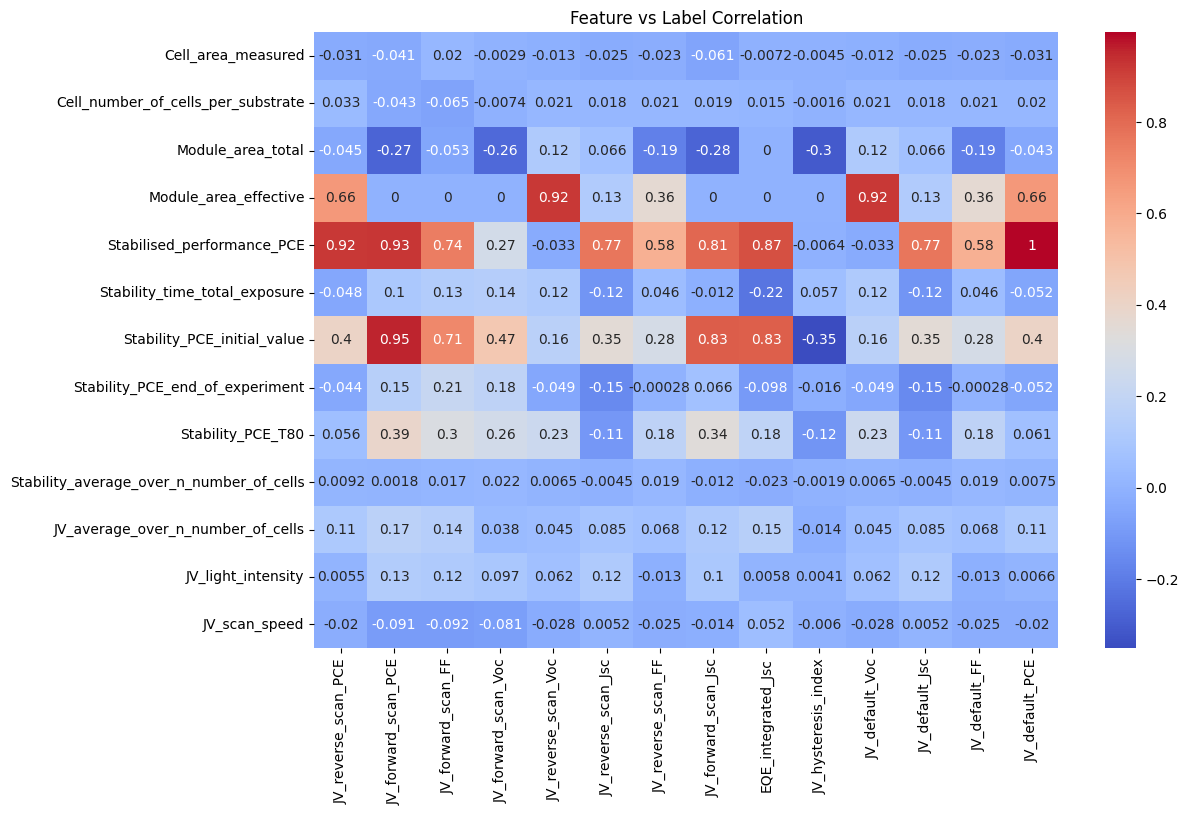

In [ ]:
# Calculate correlation matrix
correlation_matrix = pd.concat([numerical_features, numerical_labels], axis=1).corr().loc[
    numerical_features.columns, numerical_labels.columns
]
correlation_matrix = correlation_matrix.fillna(0.0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature vs Label Correlation')
plt.show()


### feature importance

In [ ]:
categorical_features = features.drop(columns=numerical_features.columns)
categorical_features = categorical_features.drop(columns=['Ref_DOI_number','Ref_journal', 'Perovskite_composition_short_form', 'Stability_measured', 'Perovskite_pl_max'])

In [ ]:
categorical_features

Cell_stack_sequence Cell_architecture  \
18     SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Ca...               nip   
28     SLG | ITO | PEDOT:PSS | Perovskite | PCBM-60 | Ag               pin   
29     SLG | ITO | PEDOT:PSS | Perovskite | PCBM-60 | Ag               pin   
30     SLG | ITO | PEDOT:PSS | Perovskite | PCBM-60 |...               pin   
31     SLG | ITO | PEDOT:PSS | Perovskite | PCBM-60 | Ag               pin   
...                                                  ...               ...   
43363  SLG | ITO | PTAA | Perovskite | PCBM-60 | C60 ...               pin   
43364  SLG | ITO | PTAA | Perovskite | PCBM-60 | C60 ...               pin   
43365  SLG | ITO | PTAA | Perovskite | PCBM-60 | C60 ...               pin   
43366  SLG | ITO | PTAA | Perovskite | PCBM-60 | C60 ...               pin   
43367  SLG | ITO | PTAA | Perovskite | PCBM-60 | C60 ...               pin   

      Cell_flexible Cell_semitransparent  \
18            False                False   
28            False                False   
29            False                False   
30            False                False   
31            False                False   
...             ...                  ...   
43363         False                False   
43364         False                False   
43365         False                False   
43366         False                False   
43367         False                False   

      Cell_semitransparent_wavelength_range Module Substrate_stack_sequence  \
18                                 nan; nan  False                SLG | FTO   
28                                 nan; nan  False                SLG | ITO   
29                                 nan; nan  False                SLG | ITO   
30                                 nan; nan  False                SLG | ITO   
31                                 nan; nan  False                SLG | ITO   
...                                     ...    ...                      ...   
43363                              nan; nan  False                SLG | ITO   
43364                              nan; nan  False                SLG | ITO   
43365                              nan; nan  False                SLG | ITO   
43366                              nan; nan  False                SLG | ITO   
43367                              nan; nan  False                SLG | ITO   

      Substrate_cleaning_procedure   ETL_stack_sequence  \
18                             NaN     TiO2-c | TiO2-mp   
28                             NaN              PCBM-60   
29                             NaN              PCBM-60   
30                             NaN     PCBM-60 | ZnO-np   
31                             NaN              PCBM-60   
...                            ...                  ...   
43363                          NaN  PCBM-60 | C60 | BCP   
43364                          NaN  PCBM-60 | C60 | BCP   
43365                          NaN  PCBM-60 | C60 | BCP   
43366                          NaN  PCBM-60 | C60 | BCP   
43367                          NaN  PCBM-60 | C60 | BCP   

      ETL_additives_compounds  ...  \
18                    Unknown  ...   
28                    Unknown  ...   
29                      DMOAP  ...   
30                    Unknown  ...   
31                      DMOAP  ...   
...                       ...  ...   
43363                 Unknown  ...   
43364                 Unknown  ...   
43365                 Unknown  ...   
43366                 Unknown  ...   
43367                 Unknown  ...   

      Perovskite_deposition_thermal_annealing_atmosphere  \
18                                               Unknown   
28                                               Unknown   
29                                               Unknown   
30                                               Unknown   
31                                               Unknown   
...                                                  ...   
43363                               

In [ ]:
categorical_features['Perovskite_dimension_list_of_layers'].value_counts()

Perovskite_dimension_list_of_layers
3            9127
3.0 | 2.0      28
3.0 | 1.0       3
2               3
3.0 | 0.0       1
1.5             1
Name: count, dtype: int64

In [ ]:
labels['JV_reverse_scan_PCE'].isnull().sum()


np.int64(0)

In [ ]:
# Perform One-Hot Encoding for each column in categorical_features
one_hot_encoded_list = []
for col in categorical_features.columns:
    # One-hot encode each column with its name as a prefix
    encoded = pd.get_dummies(categorical_features[col], prefix=col, prefix_sep='_', drop_first=False)
    one_hot_encoded_list.append(encoded)

# Concatenate all one-hot encoded columns into a new DataFrame
one_hot_features = pd.concat(one_hot_encoded_list, axis=1)

# Display the shape and a sample of the one-hot encoded DataFrame
one_hot_features_shape = one_hot_features.shape

one_hot_features

Cell_stack_sequence_42P2O5-22Li2O-22ZnO-12Sm2O3-2CeO2 | FTO | Perovskite | Metal  \
18                                                 False                                  
28                                                 False                                  
29                                                 False                                  
30                                                 False                                  
31                                                 False                                  
...                                                  ...                                  
43363                                              False                                  
43364                                              False                                  
43365                                              False                                  
43366                                              False                                  
43367                                              False                                  

       Cell_stack_sequence_Ag-nw; Graphene; Polycarbonate; Polystyrene | MoO3 | Perovskite | PCBM-60 | BCP | Ag  \
18                                                 False                                                          
28                                                 False                                                          
29                                                 False                                                          
30                                                 False                                                          
31                                                 False                                                          
...                                                  ...                                                          
43363                                              False                                                          
43364                                              False                                                          
43365                                              False                                                          
43366                                              False                                                          
43367                                              False                                                          

       Cell_stack_sequence_Au | ZnO-c | Perovskite | Cu2O | Au  \
18                                                 False         
28                                                 False         
29                                                 False         
30                                                 False         
31                                                 False         
...                                                  ...         
43363                                              False         
43364                                              False         
43365                                              False         
43366                                              False         
43367                                              False         

       Cell_stack_sequence_Cu | CuI | Perovskite | ZnO-np | Ag-nw  \
18                                                 False            
28                                                 False            
29                                                 False            
30                                                 False            
31                                                 False            
...                                                  ...            
43363                                              False            
43364                                              False            
43365                                              False            
43366                                             

#### Decision tree


In [ ]:
!pip install shap

In [ ]:
# Identify rows with non-null target labels
non_null_indices = labels['JV_reverse_scan_PCE'].notnull()

# Filter the main data_cleaned DataFrame and labels to remove rows with null labels
data_2_step = data_2_step[non_null_indices]
y = labels['JV_reverse_scan_PCE'][non_null_indices]

# Ensure one_hot_features is filtered the same way
one_hot_features = one_hot_features.loc[non_null_indices]

# Verify alignment
assert one_hot_features.index.equals(y.index), "Indices of features and labels are misaligned."

# At this point, `one_hot_features` and `y` are aligned and can be used for training
print("Updated one_hot_features shape:", one_hot_features.shape)
print("Updated labels shape:", y.shape)



Updated one_hot_features shape: (9166, 6217)
Updated labels shape: (9166,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# Split data
X_train, X_test, y_train, y_test = train_test_split(one_hot_features, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature importance
importance = model.feature_importances_
feature_names = X_train.columns

# Display feature importance
feature_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)
# for feature, imp in feature_importance:
#     print(f"Feature: {feature}, Importance: {imp}")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to store aggregated feature importance
feature_importance_map = {}
feature_names = features.columns

# Aggregate the importance of one-hot encoded features back to the original features
for feature in feature_names:
    # Get all one-hot encoded columns related to the original feature
    related_cols = [col for col in one_hot_features.columns if col.startswith(feature + "_")]
    total_importance = 0
    # Sum the importances for each related column
    for col in related_cols:
        if col in one_hot_features.columns:
            # Retrieve the importance value for the one-hot column
            val = importance[one_hot_features.columns.get_loc(col)]
            # If the value is an array or list, sum its elements; otherwise, use the value directly
            if isinstance(val, (list, np.ndarray)):
                total_importance += np.sum(val)
            else:
                total_importance += val
    feature_importance_map[feature] = total_importance

# Convert the aggregated feature importance to a DataFrame and sort it
aggregated_importance = pd.DataFrame(
    list(feature_importance_map.items()), columns=["Feature", "Importance"]
)
aggregated_importance.sort_values(by="Importance", ascending=False, inplace=True)


<ipython-input-114-78e23ee9d565>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


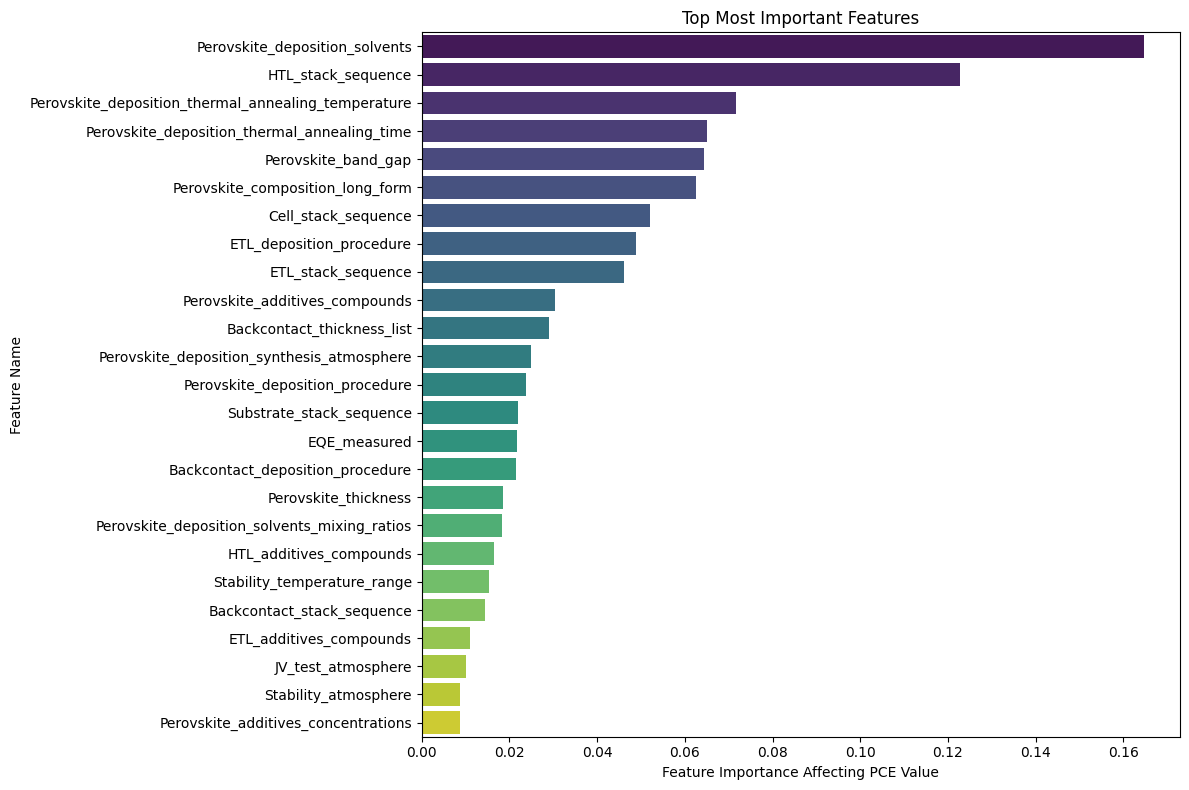

In [ ]:
# Plot the aggregated feature importances
plt.figure(figsize=(12, 8))
sns.barplot(
    data=aggregated_importance.head(25),  # Top 45 features
    x="Importance",
    y="Feature",
    palette="viridis"
)
plt.title("Top Most Important Features")
plt.xlabel("Feature Importance Affecting PCE Value")
plt.ylabel("Feature Name")
plt.tight_layout()

# Save the plot as an image file
plt.savefig("feature_importance_plot.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()

<ipython-input-115-613f4d59d9b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


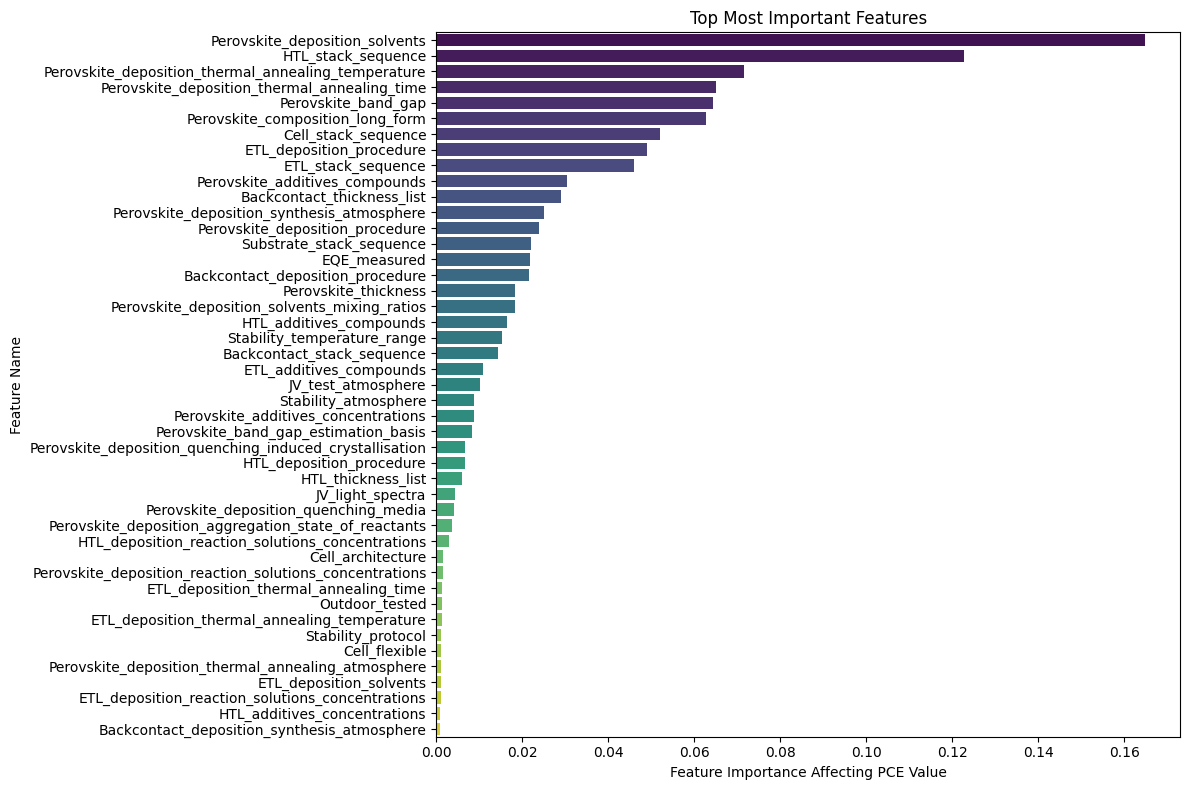

In [ ]:
# Plot the aggregated feature importances
plt.figure(figsize=(12, 8))
sns.barplot(
    data=aggregated_importance.head(45),  # Top 45 features
    x="Importance",
    y="Feature",
    palette="viridis"
)
plt.title("Top Most Important Features")
plt.xlabel("Feature Importance Affecting PCE Value")
plt.ylabel("Feature Name")
plt.tight_layout()

# Save the plot as an image file
plt.savefig("feature_importance_plot.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()

### Perovsike composition long form

In [ ]:
# Group data by Perovskite composition long form and calculate the average reverse PCE
average_pce_by_composition = data_2_step.groupby('Perovskite_composition_long_form')['JV_reverse_scan_PCE'].mean()

# Print the results
average_pce_by_composition


Perovskite_composition_long_form
(PDA)0.01Cs0.15FA0.84PbI3    16.690000
(PDA)0.02Cs0.15FA0.83PbI3    17.315000
(PDA)0.03Cs0.15FA0.82PbI3    14.130000
(PDA)0.04Cs0.15FA0.81PbI3    11.835000
(PDA)0.05Cs0.15FA0.8PbI3      9.475000
                               ...    
MAPbBrxIx                     8.363333
MAPbCl3                       0.240000
MAPbI3                       11.036974
MAPbISCN                     10.240000
nanPbI2                       0.020000
Name: JV_reverse_scan_PCE, Length: 342, dtype: float64

<ipython-input-117-2de4314459e0>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Perovskite_composition_long_form', y='JV_reverse_scan_PCE', data=filtered_data, palette="coolwarm")


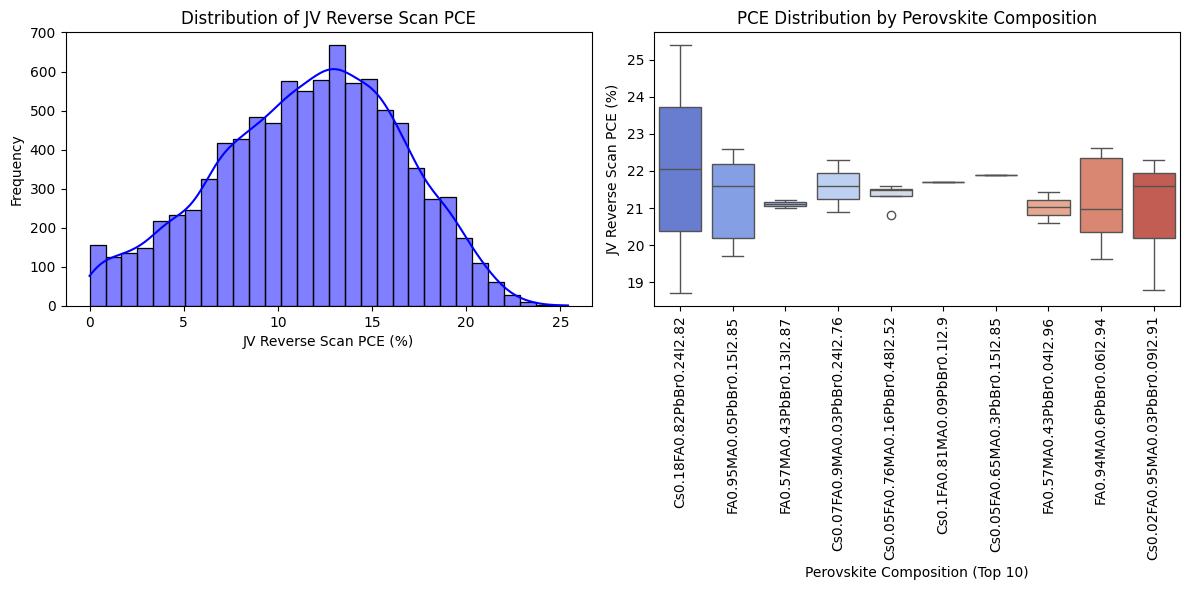

<ipython-input-117-2de4314459e0>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Perovskite_composition_long_form', y='JV_reverse_scan_PCE', data=average_pce_by_composition.head(10), palette="viridis")


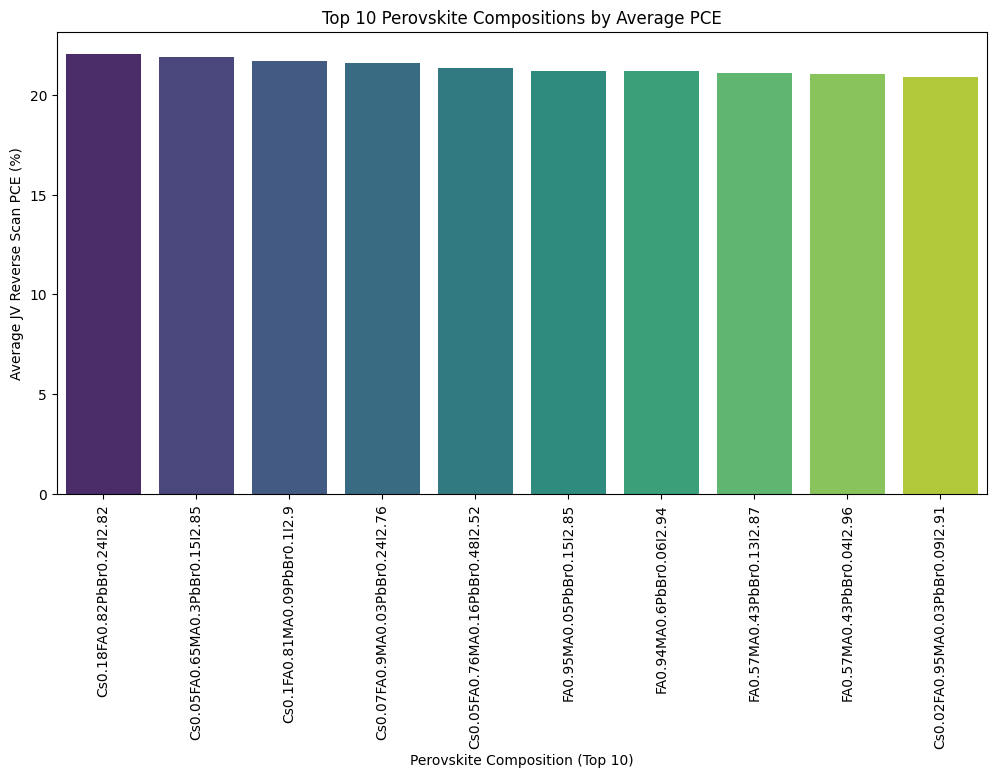

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample the dataset (assuming the user has provided it as a DataFrame named 'data')
# If needed, load from file: df = pd.read_csv("your_dataset.csv")

# Group by composition and calculate mean PCE
average_pce_by_composition = data_2_step.groupby('Perovskite_composition_long_form')['JV_reverse_scan_PCE'].mean().reset_index()

# Sort by efficiency for better visualization
average_pce_by_composition = average_pce_by_composition.sort_values(by='JV_reverse_scan_PCE', ascending=False)

# Set figure size
plt.figure(figsize=(12, 6))

# Histogram of PCE values
plt.subplot(1, 2, 1)
sns.histplot(data_2_step['JV_reverse_scan_PCE'], bins=30, kde=True, color='blue')
plt.xlabel("JV Reverse Scan PCE (%)")
plt.ylabel("Frequency")
plt.title("Distribution of JV Reverse Scan PCE")

# Boxplot of PCE grouped by composition (top 10 compositions)
top_compositions = average_pce_by_composition.head(10)['Perovskite_composition_long_form']
filtered_data = data_2_step[data_2_step['Perovskite_composition_long_form'].isin(top_compositions)]

plt.subplot(1, 2, 2)
sns.boxplot(x='Perovskite_composition_long_form', y='JV_reverse_scan_PCE', data=filtered_data, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Perovskite Composition (Top 10)")
plt.ylabel("JV Reverse Scan PCE (%)")
plt.title("PCE Distribution by Perovskite Composition")

plt.tight_layout()
plt.show()

# Bar Chart for Average PCE by Composition (Top 10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Perovskite_composition_long_form', y='JV_reverse_scan_PCE', data=average_pce_by_composition.head(10), palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Perovskite Composition (Top 10)")
plt.ylabel("Average JV Reverse Scan PCE (%)")
plt.title("Top 10 Perovskite Compositions by Average PCE")
plt.show()


### Quenching


In [ ]:
# Identify columns with "quenching" in their names
quenching_columns = [col for col in data_2_step.columns if "quenching" in col.lower()]
quenching_columns


['Perovskite_deposition_quenching_induced_crystallisation',
 'Perovskite_deposition_quenching_media',
 'Perovskite_deposition_quenching_media_additives_compounds',
 'Perovskite_deposition_quenching_media_additives_concentrations']

<ipython-input-119-32986142838e>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=selected_feature, y='JV_reverse_scan_PCE', data=subset_box, palette="coolwarm")


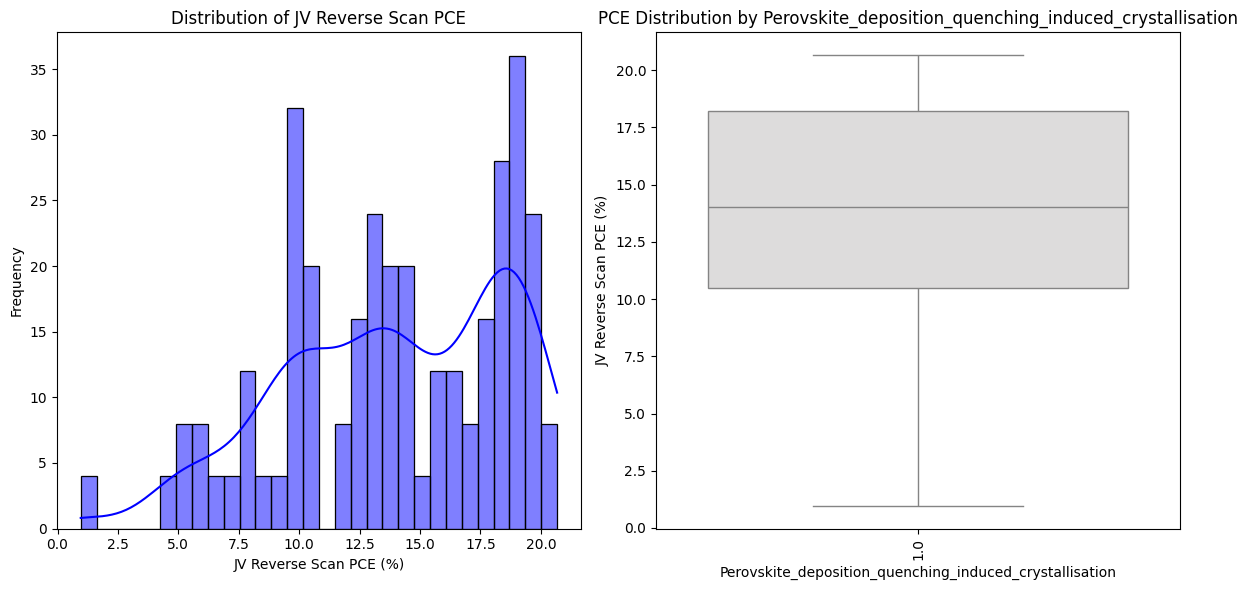

<ipython-input-119-32986142838e>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='JV_reverse_scan_PCE', data=avg_pce_by_quenching, palette="viridis")


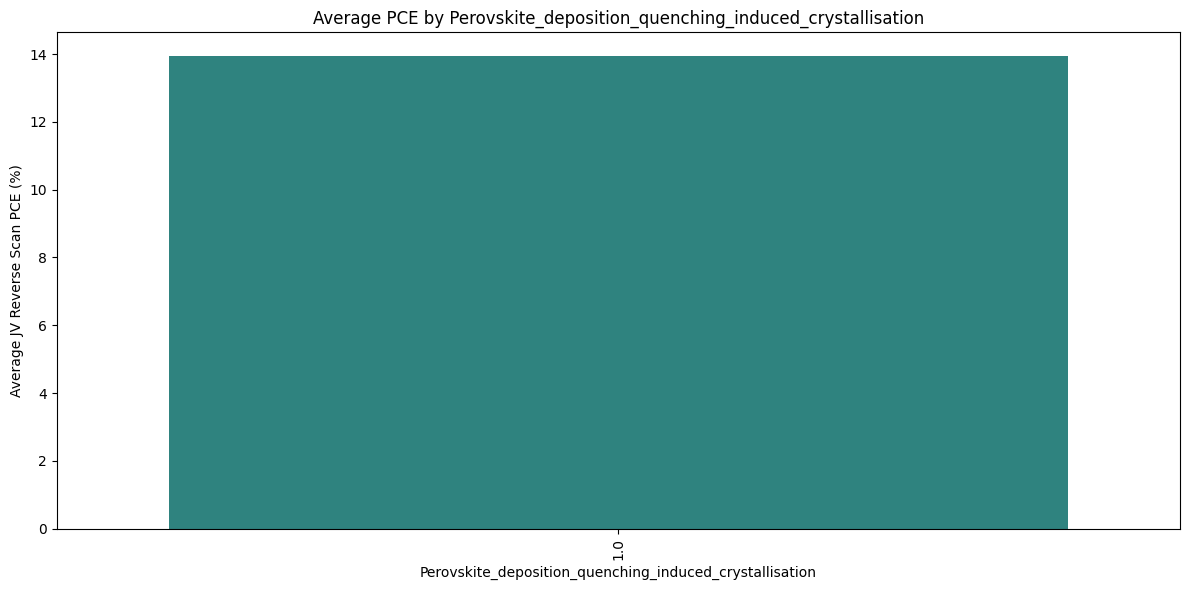

<ipython-input-119-32986142838e>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='JV_reverse_scan_PCE', data=avg_pce_by_quenching, palette="viridis")


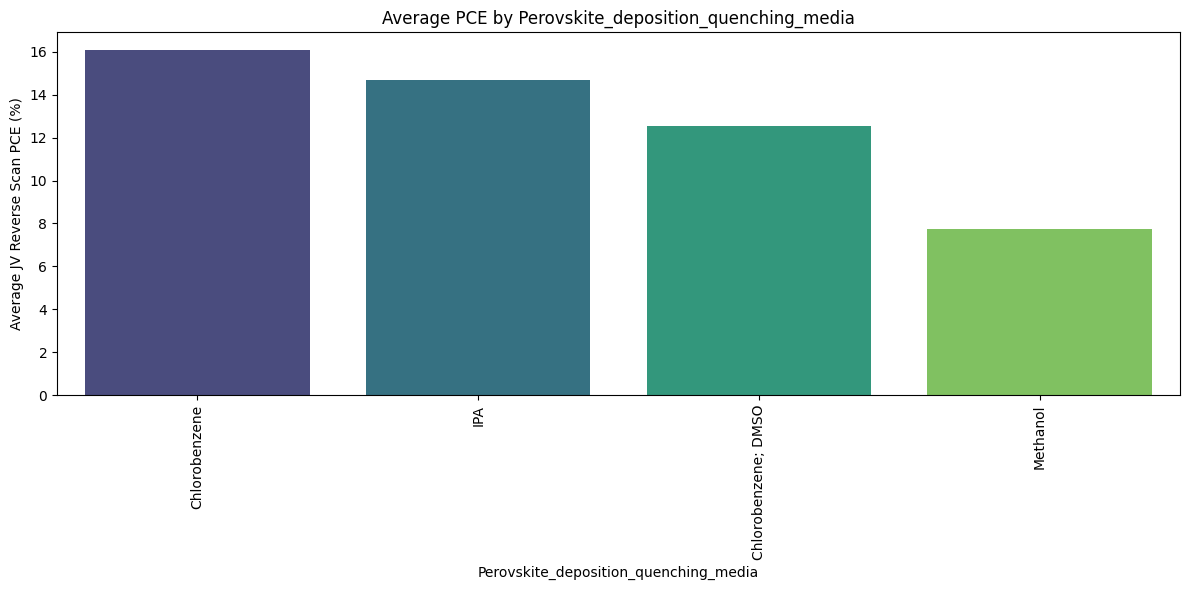

<ipython-input-119-32986142838e>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='JV_reverse_scan_PCE', data=avg_pce_by_quenching, palette="viridis")


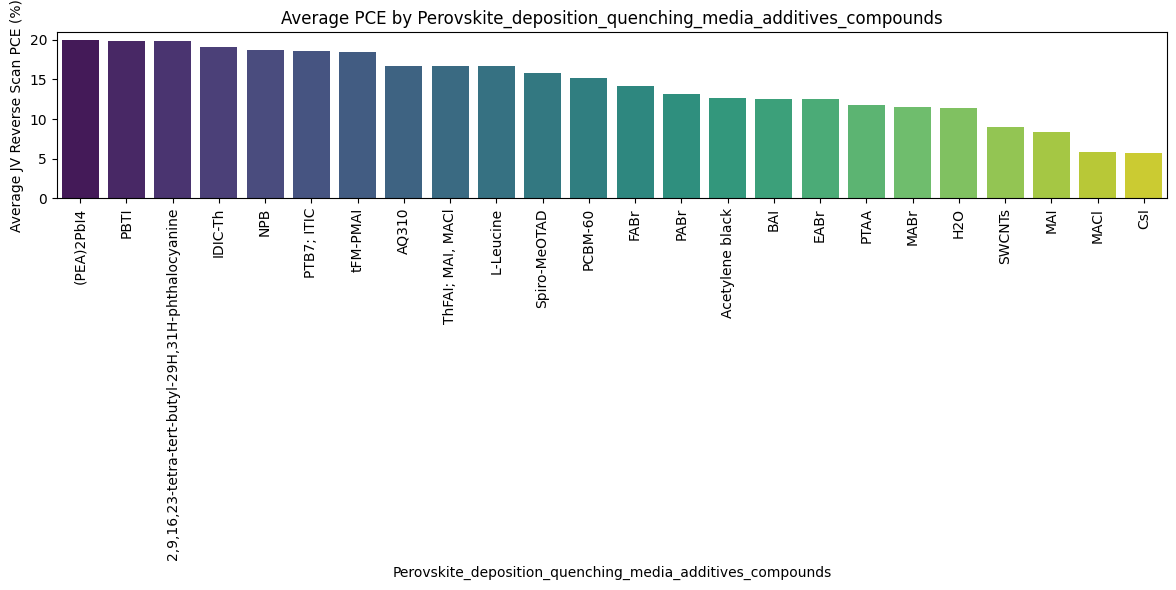

<ipython-input-119-32986142838e>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='JV_reverse_scan_PCE', data=avg_pce_by_quenching, palette="viridis")


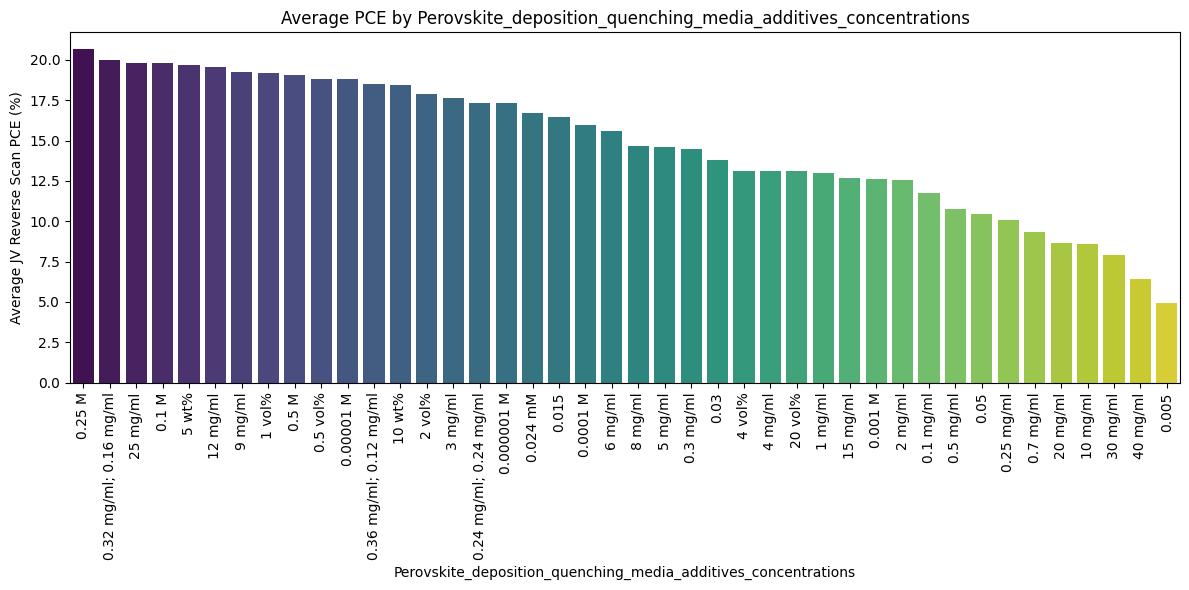

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Identify columns with "quenching" in their names
quenching_columns = [col for col in data.columns if "quenching" in col.lower()]

# Melt the dataset: create a long-form DataFrame for the quenching features
data_long = data.melt(
    id_vars=['JV_reverse_scan_PCE'],
    value_vars=quenching_columns,
    var_name="Quenching_Feature",
    value_name="Quenching_Value"
)

# Convert JV_reverse_scan_PCE to numeric (if not already)
data_long['JV_reverse_scan_PCE'] = pd.to_numeric(data_long['JV_reverse_scan_PCE'], errors='coerce')

# Drop rows with missing PCE values
data_long = data_long.dropna(subset=['JV_reverse_scan_PCE'])

# ---- Visualization 1: Histogram of JV_reverse_scan_PCE ----
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_long['JV_reverse_scan_PCE'], bins=30, kde=True, color='blue')
plt.xlabel("JV Reverse Scan PCE (%)")
plt.ylabel("Frequency")
plt.title("Distribution of JV Reverse Scan PCE")

# ---- Visualization 2: Boxplot for a Selected Quenching Feature ----
# (Select one quenching feature; here, we use the first one)
selected_feature = quenching_columns[0]
subset_box = data[data[selected_feature].notnull()]

plt.subplot(1, 2, 2)
sns.boxplot(x=selected_feature, y='JV_reverse_scan_PCE', data=subset_box, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel(selected_feature)
plt.ylabel("JV Reverse Scan PCE (%)")
plt.title("PCE Distribution by " + selected_feature)
plt.tight_layout()
plt.show()

# ---- Visualization 3: Bar Chart of Average PCE by Quenching Value for Each Quenching Feature ----
# Loop through each quenching feature and calculate the average PCE per unique value
for feature in quenching_columns:
    # Filter out missing values for the feature
    subset = data[data[feature].notnull()]

    # Ensure the feature is treated as a categorical variable
    subset[feature] = subset[feature].astype(str)

    # Group by the quenching value and calculate mean PCE
    avg_pce_by_quenching = subset.groupby(feature)['JV_reverse_scan_PCE'].mean().reset_index()
    avg_pce_by_quenching = avg_pce_by_quenching.sort_values(by='JV_reverse_scan_PCE', ascending=False)

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature, y='JV_reverse_scan_PCE', data=avg_pce_by_quenching, palette="viridis")
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel("Average JV Reverse Scan PCE (%)")
    plt.title("Average PCE by " + feature)
    plt.tight_layout()
    plt.show()


In [ ]:
quenching_categorical=['Perovskite_deposition_quenching_media',
 'Perovskite_deposition_quenching_media_additives_compounds']

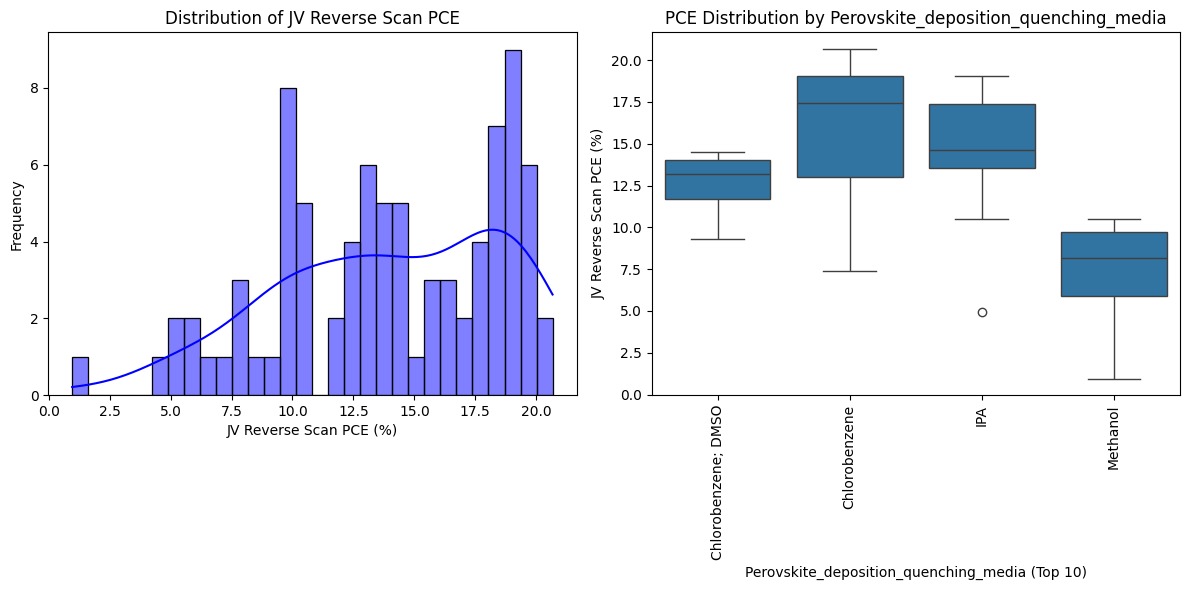

<ipython-input-121-310665dffcb0>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='JV_reverse_scan_PCE', data=avg_pce_by_quenching.head(10), palette="viridis")


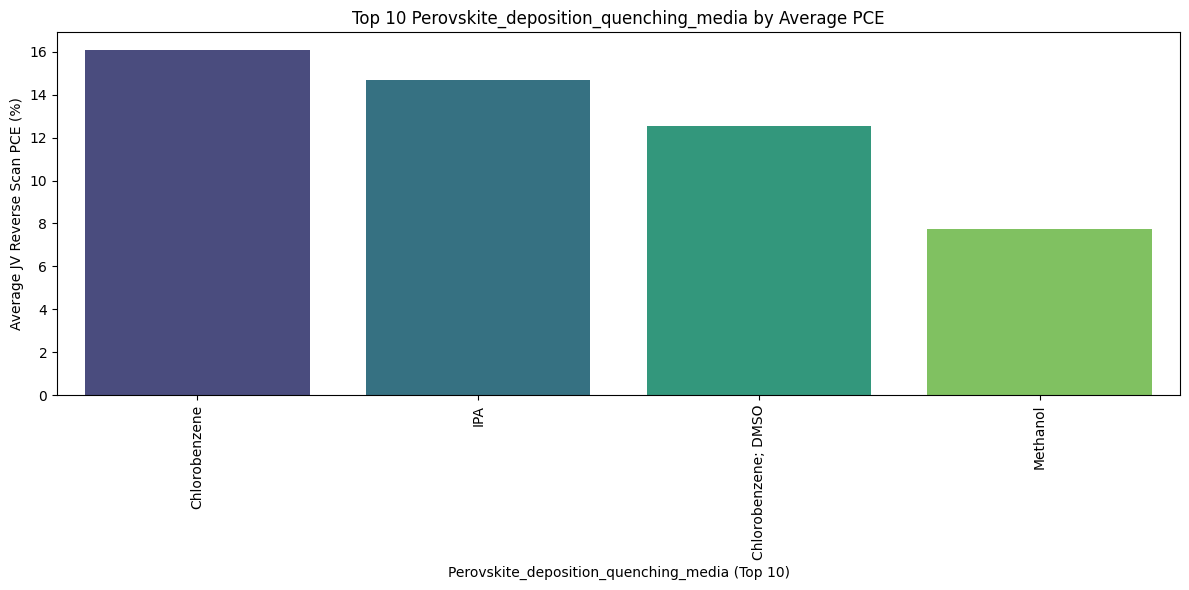

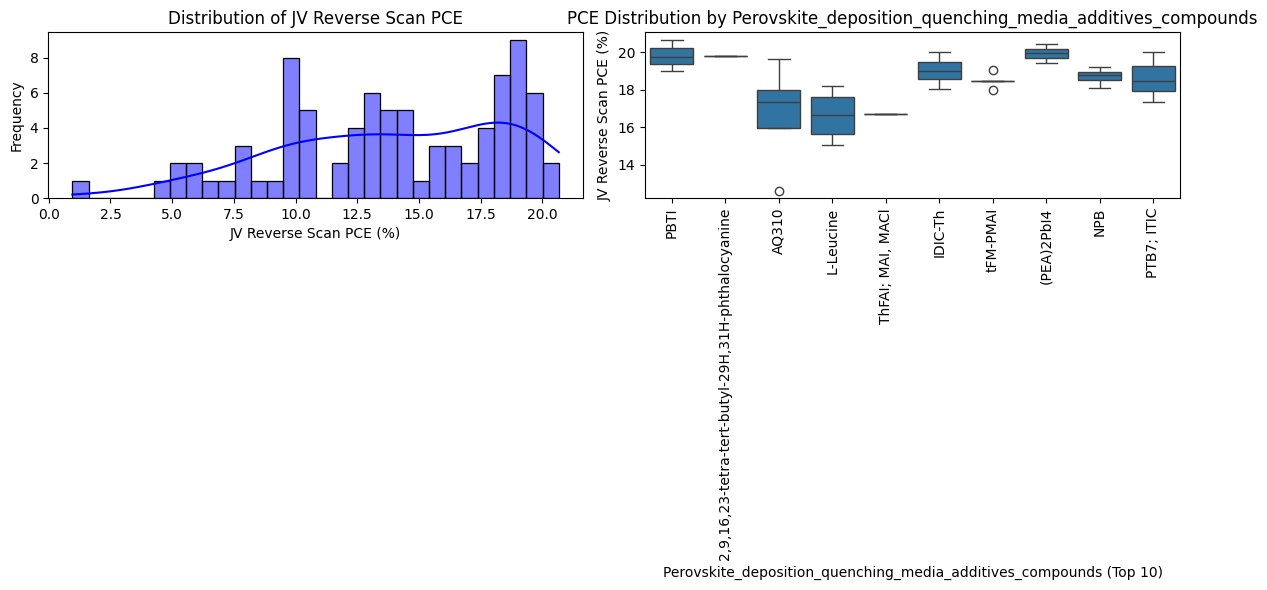

<ipython-input-121-310665dffcb0>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='JV_reverse_scan_PCE', data=avg_pce_by_quenching.head(10), palette="viridis")


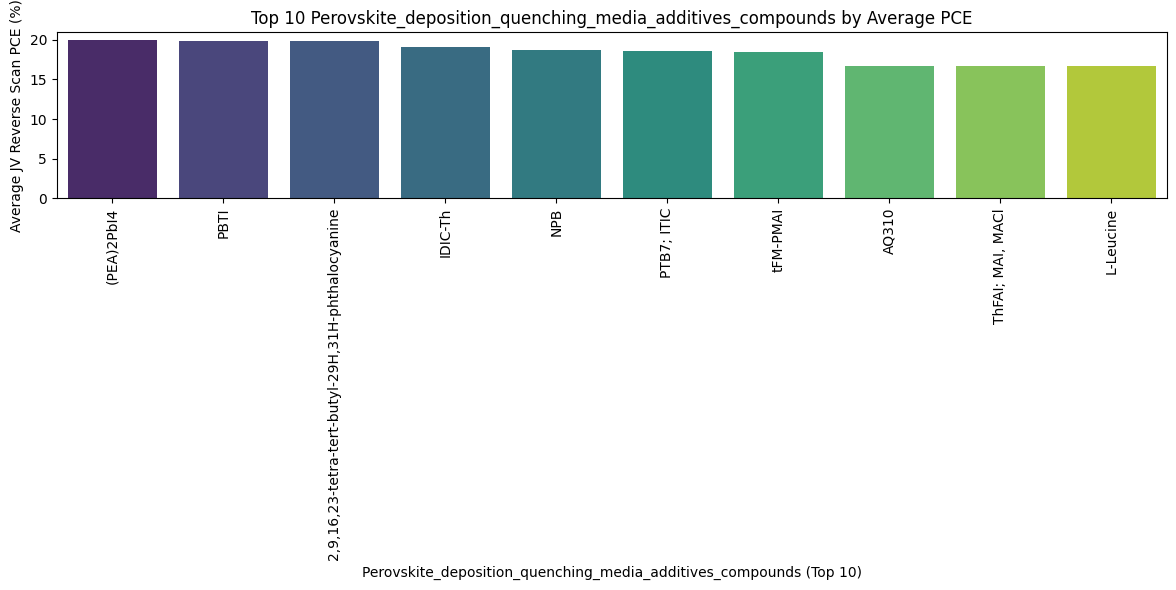

In [ ]:
# Remove NaN values from quenching-related categorical features
for feature in quenching_categorical:
    data = data[data[feature].notna()]

# Ensure 'Perovskite_deposition_quenching_media_additives_concentrations' is analyzed in relation to 'Perovskite_deposition_quenching_media_additives_compounds'
quenching_concentration_feature = 'Perovskite_deposition_quenching_media_additives_concentrations'
quenching_compound_feature = 'Perovskite_deposition_quenching_media_additives_compounds'

# Remove NaNs from both related features
data = data[data[quenching_concentration_feature].notna() & data[quenching_compound_feature].notna()]

# ---- Visualization 1: Boxplot of PCE grouped by quenching category (top 10) ----
for feature in quenching_categorical:
    avg_pce_by_quenching = data.groupby(feature)['JV_reverse_scan_PCE'].mean().reset_index()
    avg_pce_by_quenching = avg_pce_by_quenching.sort_values(by='JV_reverse_scan_PCE', ascending=False)

    top_values = avg_pce_by_quenching.head(10)[feature]
    filtered_data = data[data[feature].isin(top_values)]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data['JV_reverse_scan_PCE'], bins=30, kde=True, color='blue')
    plt.xlabel("JV Reverse Scan PCE (%)")
    plt.ylabel("Frequency")
    plt.title("Distribution of JV Reverse Scan PCE")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=feature, y='JV_reverse_scan_PCE', data=filtered_data)
    plt.xticks(rotation=90)
    plt.xlabel(feature + " (Top 10)")
    plt.ylabel("JV Reverse Scan PCE (%)")
    plt.title(f"PCE Distribution by {feature}")

    plt.tight_layout()
    plt.show()

    # ---- Visualization 2: Bar Chart of Average PCE per Quenching Category ----
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature, y='JV_reverse_scan_PCE', data=avg_pce_by_quenching.head(10), palette="viridis")
    plt.xticks(rotation=90)
    plt.xlabel(feature + " (Top 10)")
    plt.ylabel("Average JV Reverse Scan PCE (%)")
    plt.title(f"Top 10 {feature} by Average PCE")
    plt.tight_layout()
    plt.show()


### Thermal annealing temp.


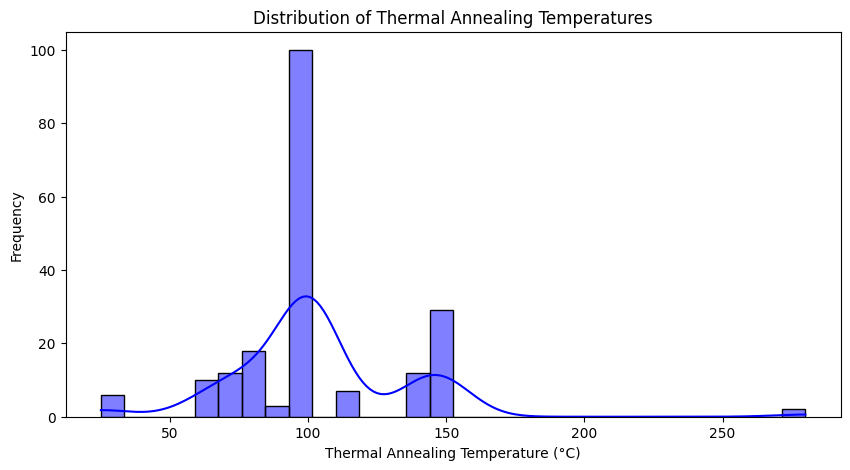

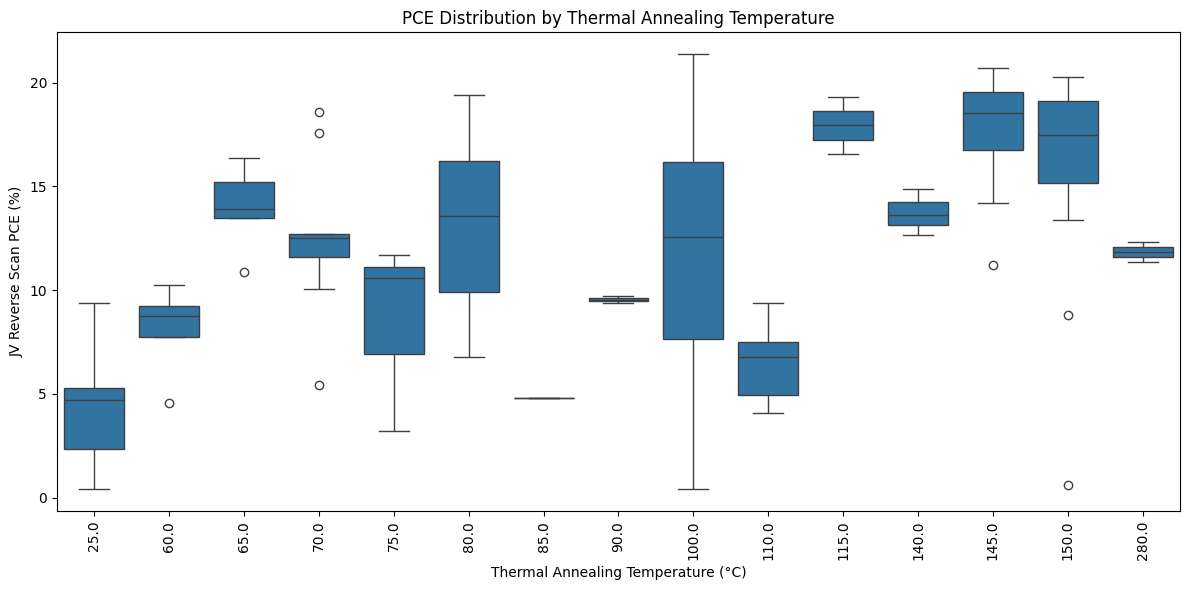

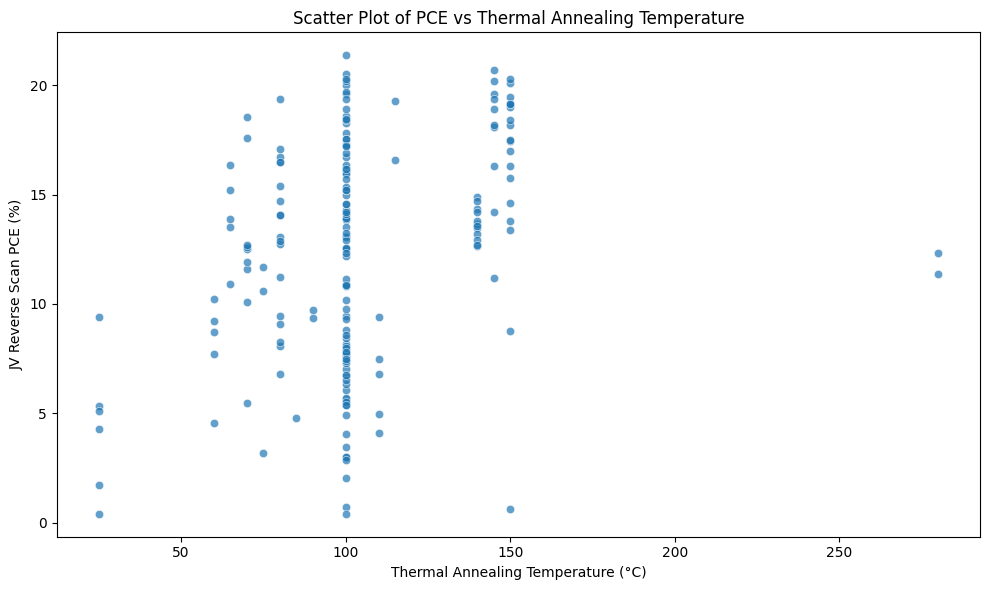

In [ ]:
# Define the thermal annealing temperature feature
thermal_annealing_feature = "Perovskite_deposition_thermal_annealing_temperature"

# Ensure the feature is numeric
data_2_step[thermal_annealing_feature] = pd.to_numeric(data_2_step[thermal_annealing_feature], errors='coerce')

# Drop NaN values
filtered_data = data_2_step.dropna(subset=[thermal_annealing_feature])

# ---- Visualization 1: Histogram of Thermal Annealing Temperature ----
plt.figure(figsize=(10, 5))
sns.histplot(filtered_data[thermal_annealing_feature], bins=30, kde=True, color='blue')
plt.xlabel("Thermal Annealing Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Thermal Annealing Temperatures")
plt.show()

# ---- Visualization 2: Boxplot of JV Reverse Scan PCE by Thermal Annealing Temperature ----
plt.figure(figsize=(12, 6))
sns.boxplot(x=thermal_annealing_feature, y="JV_reverse_scan_PCE", data=filtered_data)
plt.xticks(rotation=90)
plt.xlabel("Thermal Annealing Temperature (°C)")
plt.ylabel("JV Reverse Scan PCE (%)")
plt.title("PCE Distribution by Thermal Annealing Temperature")
plt.tight_layout()
plt.show()

# ---- Visualization 3: Scatter Plot of PCE vs Thermal Annealing Temperature ----
plt.figure(figsize=(10, 6))
sns.scatterplot(x=thermal_annealing_feature, y="JV_reverse_scan_PCE", data=filtered_data, alpha=0.7)
plt.xlabel("Thermal Annealing Temperature (°C)")
plt.ylabel("JV Reverse Scan PCE (%)")
plt.title("Scatter Plot of PCE vs Thermal Annealing Temperature")
plt.tight_layout()
plt.show()


<ipython-input-124-3c47ff65b755>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=thermal_annealing_feature, y="JV_reverse_scan_PCE", data=avg_pce_by_temp, palette="viridis")


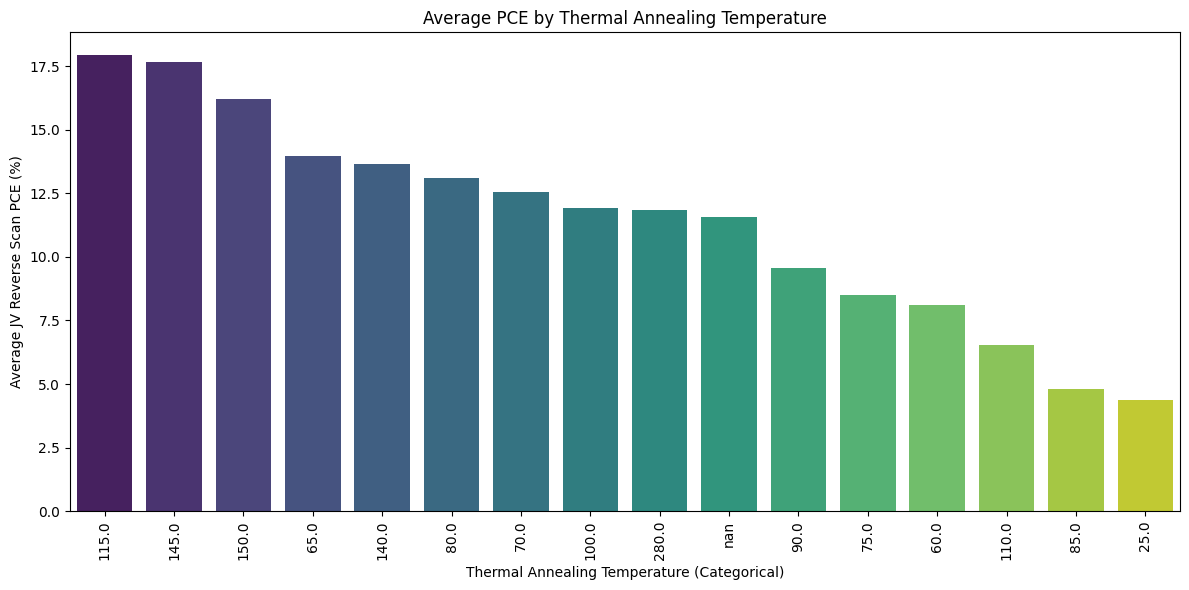

<ipython-input-124-3c47ff65b755>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=thermal_annealing_feature, y="JV_reverse_scan_PCE", data=filtered_data, palette="coolwarm")


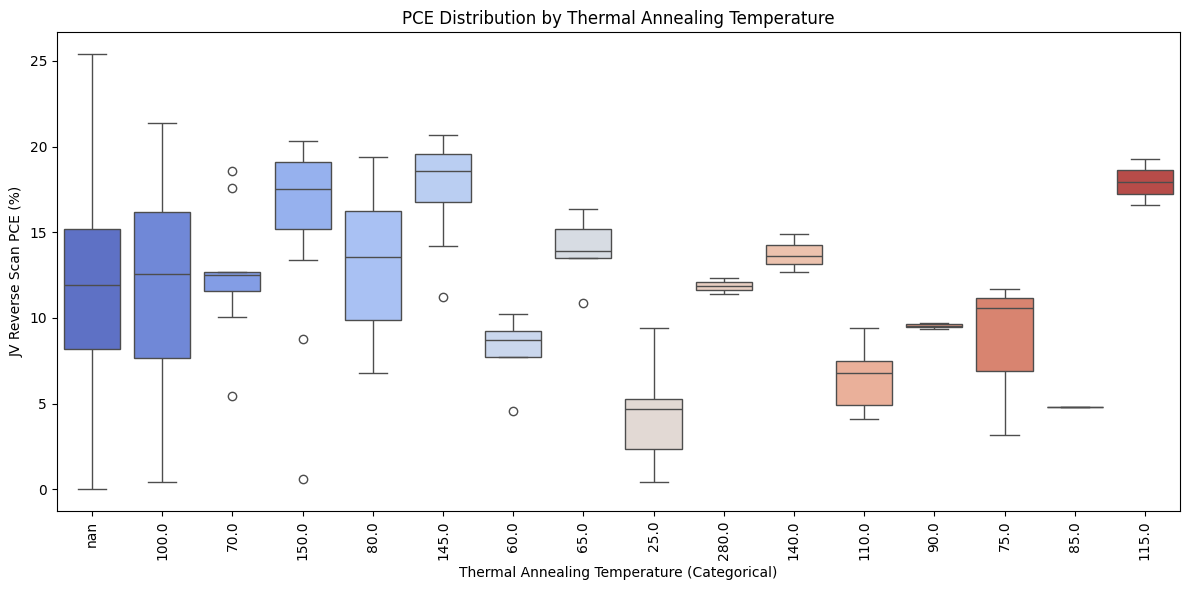

In [ ]:
# Define the thermal annealing temperature feature as categorical
thermal_annealing_feature = "Perovskite_deposition_thermal_annealing_temperature"

# Ensure it is treated as a categorical variable
data_2_step[thermal_annealing_feature] = data_2_step[thermal_annealing_feature].astype(str)

# Remove NaN values
filtered_data = data_2_step.dropna(subset=[thermal_annealing_feature])

# ---- Visualization 1: Bar Chart of Average PCE by Thermal Annealing Temperature ----
avg_pce_by_temp = filtered_data.groupby(thermal_annealing_feature)['JV_reverse_scan_PCE'].mean().reset_index()
avg_pce_by_temp = avg_pce_by_temp.sort_values(by='JV_reverse_scan_PCE', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=thermal_annealing_feature, y="JV_reverse_scan_PCE", data=avg_pce_by_temp, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Thermal Annealing Temperature (Categorical)")
plt.ylabel("Average JV Reverse Scan PCE (%)")
plt.title("Average PCE by Thermal Annealing Temperature")
plt.tight_layout()
plt.show()

# ---- Visualization 2: Boxplot of PCE by Thermal Annealing Temperature ----
plt.figure(figsize=(12, 6))
sns.boxplot(x=thermal_annealing_feature, y="JV_reverse_scan_PCE", data=filtered_data, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Thermal Annealing Temperature (Categorical)")
plt.ylabel("JV Reverse Scan PCE (%)")
plt.title("PCE Distribution by Thermal Annealing Temperature")
plt.tight_layout()
plt.show()


### Annealing time

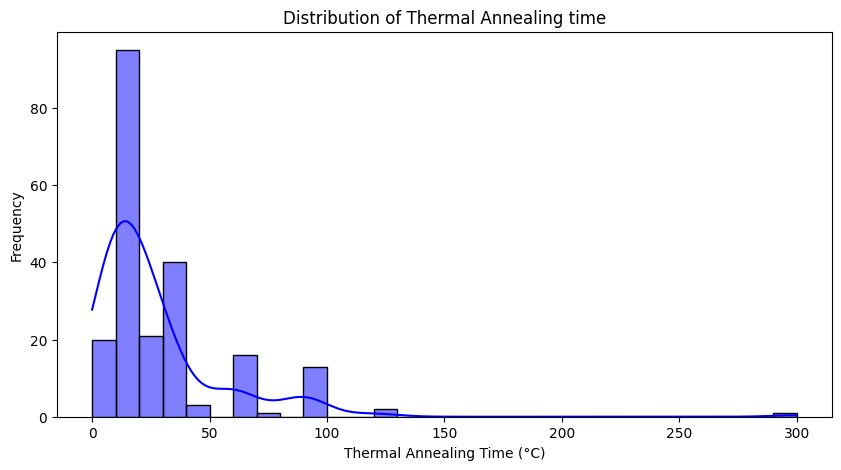

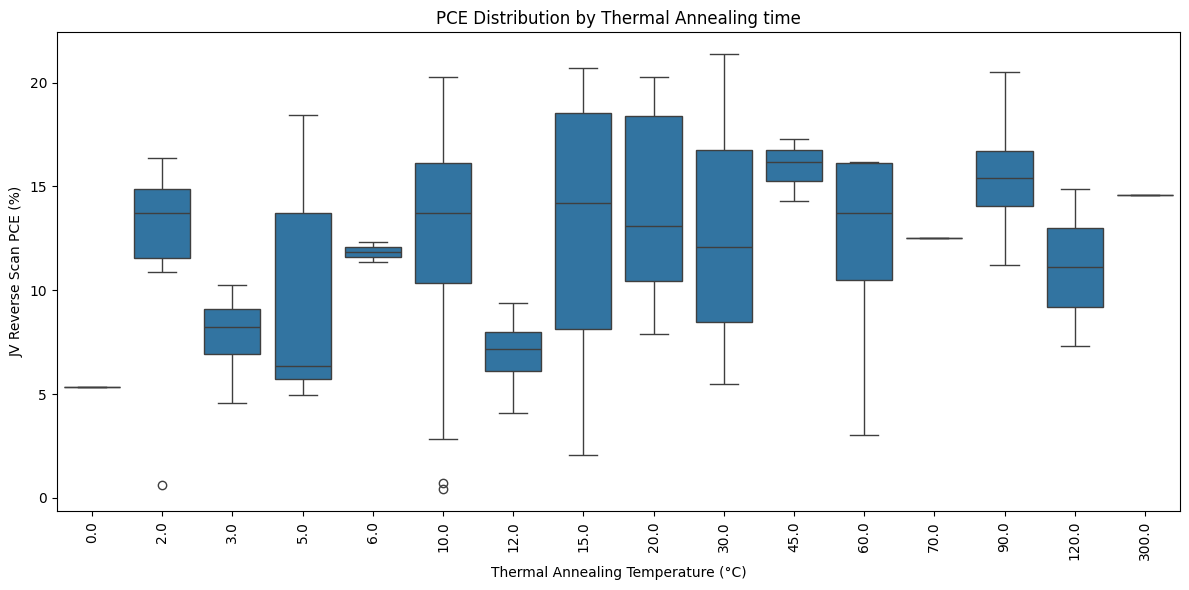

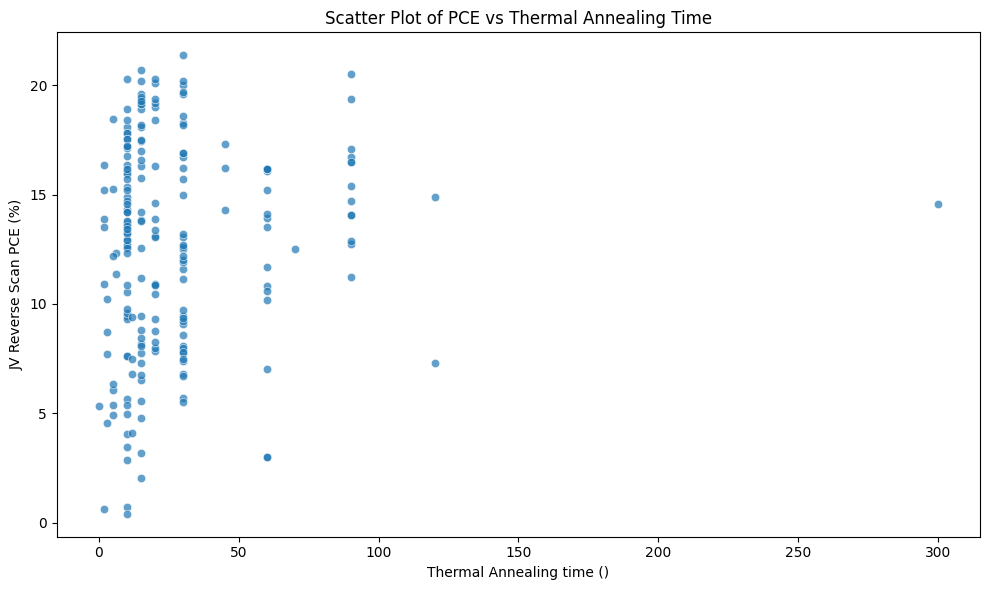

In [ ]:
# Define the thermal annealing time feature
thermal_annealing_time_feature = "Perovskite_deposition_thermal_annealing_time"

# Ensure the feature is numeric
data_2_step[thermal_annealing_time_feature] = pd.to_numeric(data_2_step[thermal_annealing_time_feature], errors='coerce')

# Drop NaN values
filtered_data = data_2_step.dropna(subset=[thermal_annealing_time_feature])

# ---- Visualization 1: Histogram of Thermal Annealing Time ----
plt.figure(figsize=(10, 5))
sns.histplot(filtered_data[thermal_annealing_time_feature], bins=30, kde=True, color='blue')
plt.xlabel("Thermal Annealing Time (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Thermal Annealing time")
plt.show()

# ---- Visualization 2: Boxplot of JV Reverse Scan PCE by Thermal Annealing Time ----
plt.figure(figsize=(12, 6))
sns.boxplot(x=thermal_annealing_time_feature, y="JV_reverse_scan_PCE", data=filtered_data)
plt.xticks(rotation=90)
plt.xlabel("Thermal Annealing Temperature (°C)")
plt.ylabel("JV Reverse Scan PCE (%)")
plt.title("PCE Distribution by Thermal Annealing time")
plt.tight_layout()
plt.show()

# ---- Visualization 3: Scatter Plot of PCE vs Thermal Annealing Temperature ----
plt.figure(figsize=(10, 6))
sns.scatterplot(x=thermal_annealing_time_feature, y="JV_reverse_scan_PCE", data=filtered_data, alpha=0.7)
plt.xlabel("Thermal Annealing time ()")
plt.ylabel("JV Reverse Scan PCE (%)")
plt.title("Scatter Plot of PCE vs Thermal Annealing Time")
plt.tight_layout()
plt.show()


<ipython-input-126-47c63dbdb74f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=thermal_annealing_feature, y="JV_reverse_scan_PCE", data=avg_pce_by_temp.head(20), palette="viridis")


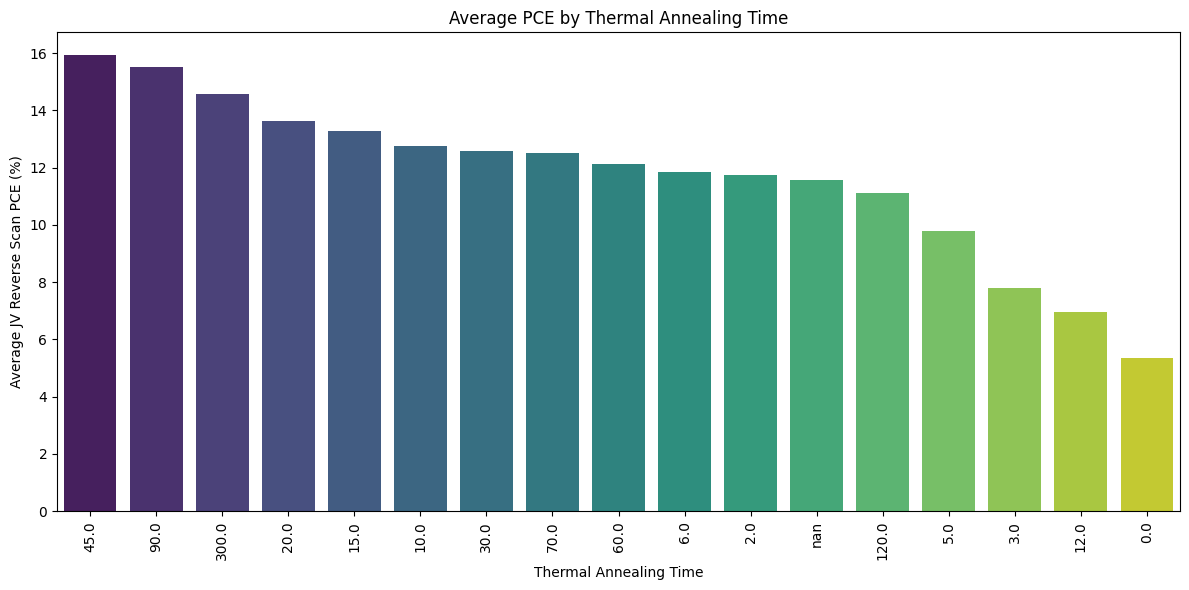

<ipython-input-126-47c63dbdb74f>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=thermal_annealing_feature, y="JV_reverse_scan_PCE", data=filtered_data, palette="coolwarm")


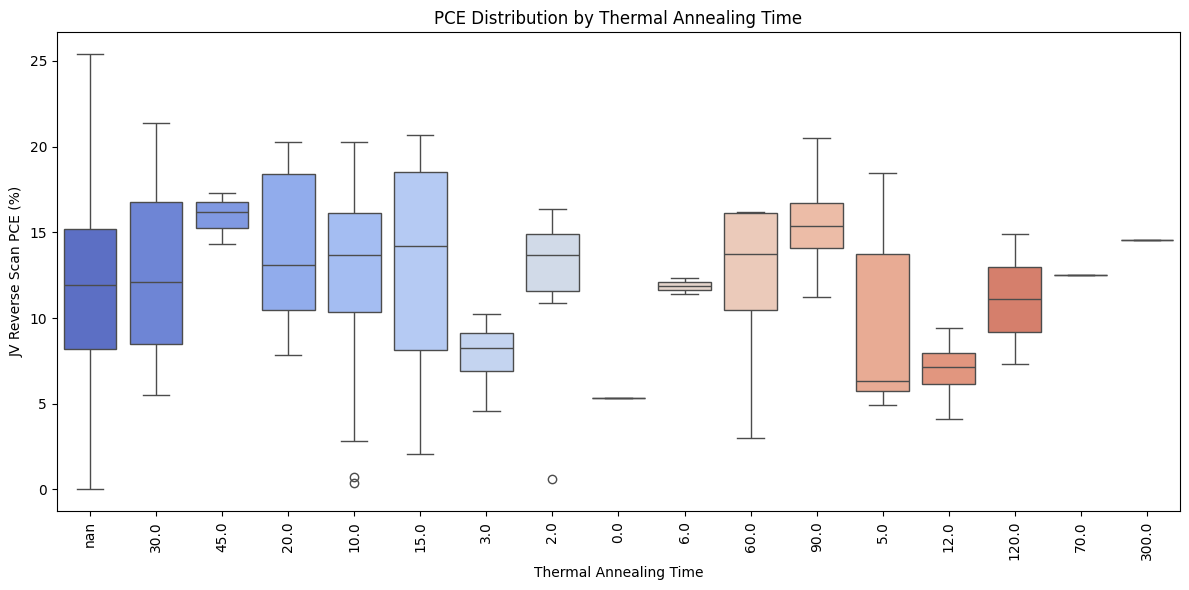

In [ ]:
# Define the thermal annealing time feature as categorical
thermal_annealing_feature = "Perovskite_deposition_thermal_annealing_time"

# Ensure it is treated as a categorical variable
data_2_step[thermal_annealing_feature] = data_2_step[thermal_annealing_feature].astype(str)

# Remove NaN values
filtered_data = data_2_step.dropna(subset=[thermal_annealing_feature])

# ---- Visualization 1: Bar Chart of Average PCE by Thermal Annealing Time ----
avg_pce_by_temp = filtered_data.groupby(thermal_annealing_feature)['JV_reverse_scan_PCE'].mean().reset_index()
avg_pce_by_temp = avg_pce_by_temp.sort_values(by='JV_reverse_scan_PCE', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=thermal_annealing_feature, y="JV_reverse_scan_PCE", data=avg_pce_by_temp.head(20), palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Thermal Annealing Time")
plt.ylabel("Average JV Reverse Scan PCE (%)")
plt.title("Average PCE by Thermal Annealing Time")
plt.tight_layout()
plt.show()

# ---- Visualization 2: Boxplot of PCE by Thermal Annealing Time ----
plt.figure(figsize=(12, 6))
sns.boxplot(x=thermal_annealing_feature, y="JV_reverse_scan_PCE", data=filtered_data, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Thermal Annealing Time")
plt.ylabel("JV Reverse Scan PCE (%)")
plt.title("PCE Distribution by Thermal Annealing Time")
plt.tight_layout()
plt.show()


### Annealing Temperature and time

<Figure size 1000x600 with 0 Axes>

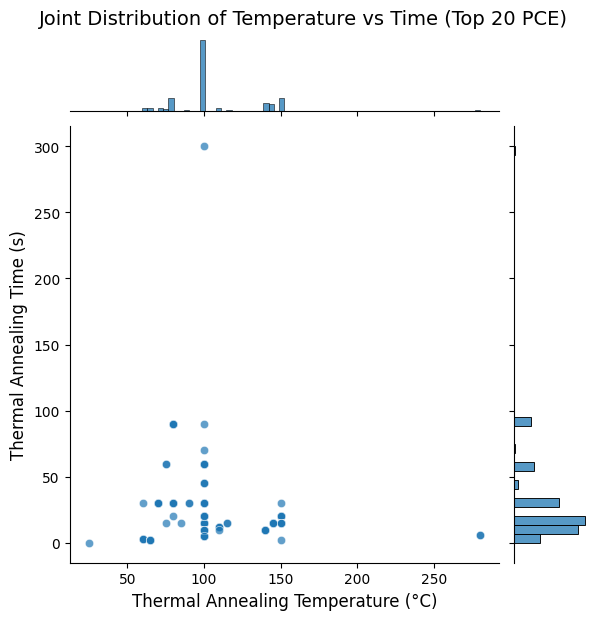

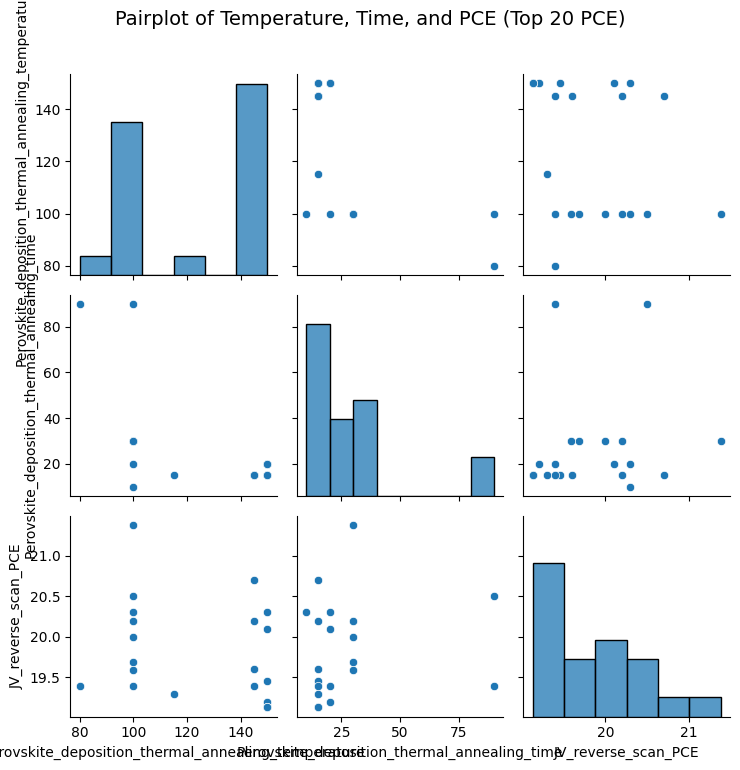

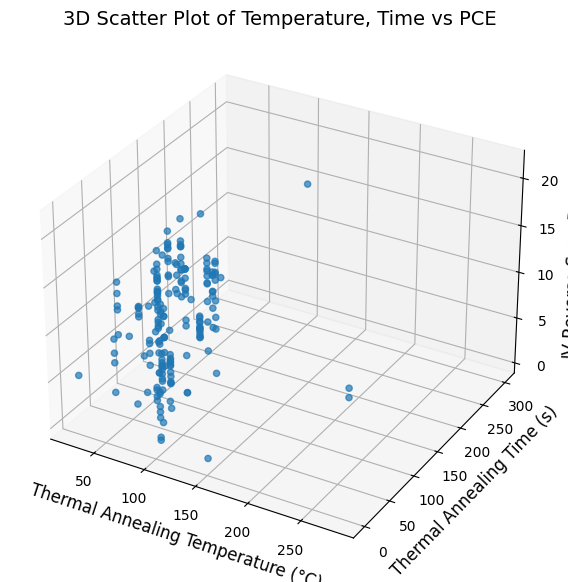

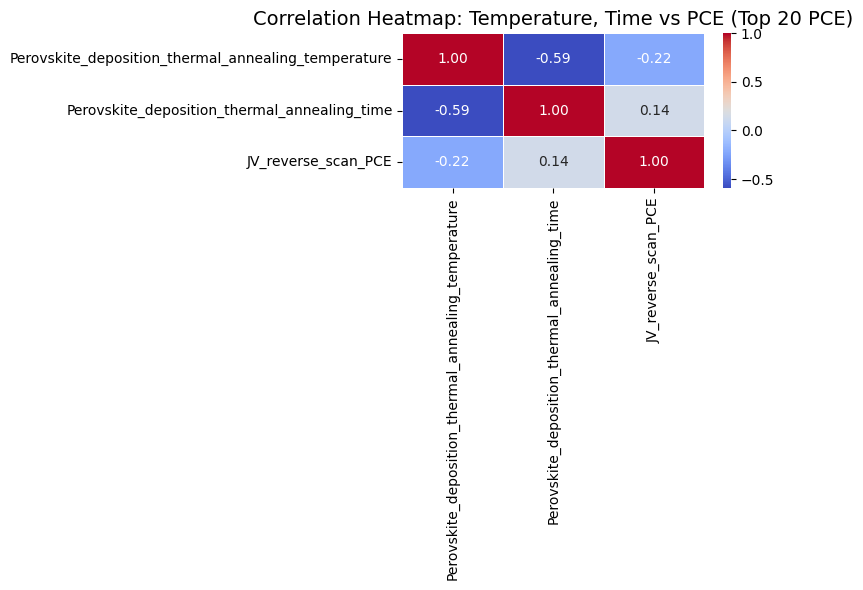

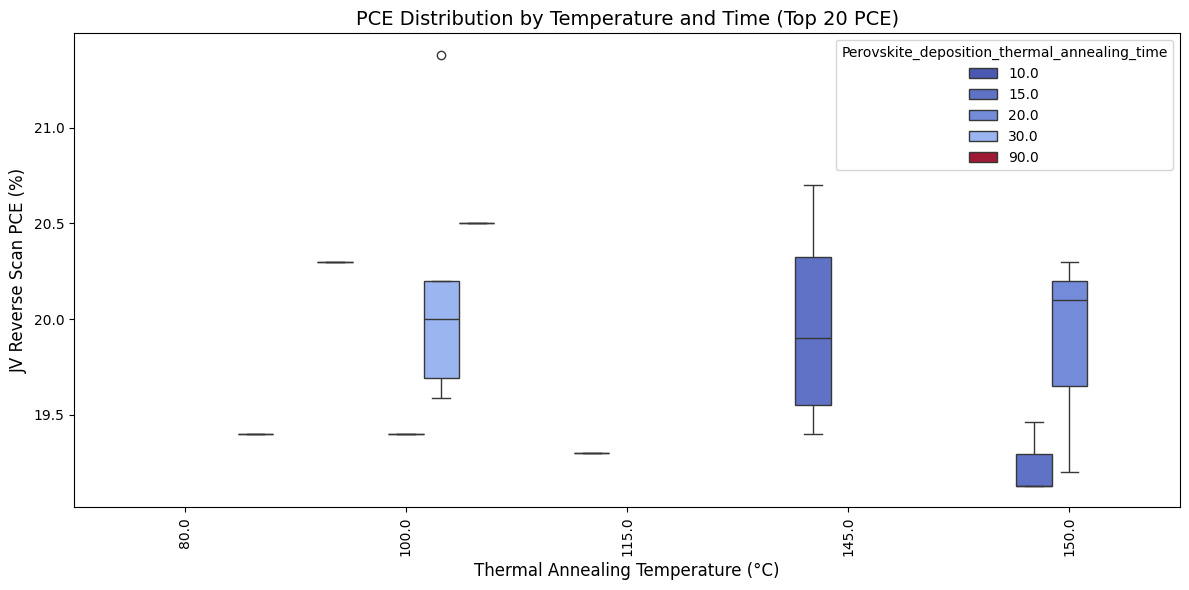

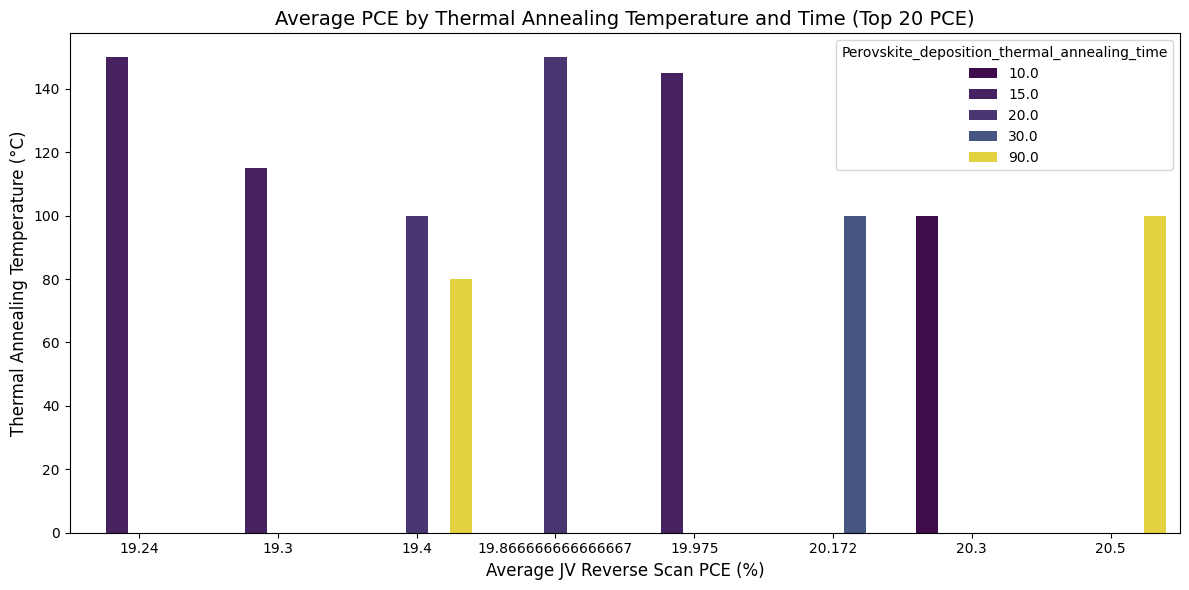

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the thermal annealing temperature and time features
thermal_annealing_temp_feature = "Perovskite_deposition_thermal_annealing_temperature"
thermal_annealing_time_feature = "Perovskite_deposition_thermal_annealing_time"

# Ensure both features are numeric
data_2_step[thermal_annealing_temp_feature] = pd.to_numeric(data_2_step[thermal_annealing_temp_feature], errors='coerce')
data_2_step[thermal_annealing_time_feature] = pd.to_numeric(data_2_step[thermal_annealing_time_feature], errors='coerce')

# Drop NaN values for both features and PCE
filtered_data = data_2_step.dropna(subset=[thermal_annealing_temp_feature, thermal_annealing_time_feature, "JV_reverse_scan_PCE"])

# ---- Filter for top 20 PCE values ----
top_20_data = filtered_data.nlargest(20, "JV_reverse_scan_PCE")

# ---- Visualization 1: Joint Distribution of Temperature vs Time ----
plt.figure(figsize=(10, 6))
sns.jointplot(x=thermal_annealing_temp_feature, y=thermal_annealing_time_feature, data=filtered_data, kind="scatter", alpha=0.7)
plt.suptitle("Joint Distribution of Temperature vs Time (Top 20 PCE)", y=1.02, fontsize=14)
plt.xlabel("Thermal Annealing Temperature (°C)", fontsize=12)
plt.ylabel("Thermal Annealing Time (s)", fontsize=12)
plt.show()

# ---- Visualization 2: Pairplot of Temperature, Time, and PCE (Top 20 PCE) ----
sns.pairplot(top_20_data, vars=[thermal_annealing_temp_feature, thermal_annealing_time_feature, "JV_reverse_scan_PCE"], kind='scatter')
plt.suptitle("Pairplot of Temperature, Time, and PCE (Top 20 PCE)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# ---- Visualization 3: 3D Scatter Plot of Temperature, Time vs PCE (Top 20 PCE) ----
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    filtered_data[thermal_annealing_temp_feature],
    filtered_data[thermal_annealing_time_feature],
    filtered_data["JV_reverse_scan_PCE"],
    alpha=0.7
)
ax.set_xlabel("Thermal Annealing Temperature (°C)", fontsize=12)
ax.set_ylabel("Thermal Annealing Time (s)", fontsize=12)
ax.set_zlabel("JV Reverse Scan PCE (%)", fontsize=12)
ax.set_title("3D Scatter Plot of Temperature, Time vs PCE", fontsize=14)
plt.show()

# ---- Visualization 4: Heatmap of Correlation between Temperature, Time and PCE (Top 20 PCE) ----
corr_matrix = top_20_data[[thermal_annealing_temp_feature, thermal_annealing_time_feature, "JV_reverse_scan_PCE"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Temperature, Time vs PCE (Top 20 PCE)", fontsize=14)
plt.tight_layout()
plt.show()

# ---- Visualization 5: Boxplot of PCE Distribution by Temperature and Time (Top 20 PCE) ----
plt.figure(figsize=(12, 6))
sns.boxplot(x=thermal_annealing_temp_feature, y="JV_reverse_scan_PCE", data=top_20_data, hue=thermal_annealing_time_feature, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Thermal Annealing Temperature (°C)", fontsize=12)
plt.ylabel("JV Reverse Scan PCE (%)", fontsize=12)
plt.title("PCE Distribution by Temperature and Time (Top 20 PCE)", fontsize=14)
plt.tight_layout()
plt.show()

# ---- Visualization 6: Bar Chart of Average PCE by Thermal Annealing Temperature and Time (Top 20 PCE) ----
# Grouping by both temperature and time
avg_pce_by_temp_time = top_20_data.groupby([thermal_annealing_temp_feature, thermal_annealing_time_feature])["JV_reverse_scan_PCE"].mean().reset_index()

# Sorting the values by Average PCE
avg_pce_by_temp_time = avg_pce_by_temp_time.sort_values(by="JV_reverse_scan_PCE", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="JV_reverse_scan_PCE", y=thermal_annealing_temp_feature, hue=thermal_annealing_time_feature, data=avg_pce_by_temp_time, palette="viridis")
plt.xlabel("Average JV Reverse Scan PCE (%)", fontsize=12)
plt.ylabel("Thermal Annealing Temperature (°C)", fontsize=12)
plt.title("Average PCE by Thermal Annealing Temperature and Time (Top 20 PCE)", fontsize=14)
plt.tight_layout()
plt.show()


### HTL and ETL additives




<ipython-input-128-ee16d5ea9215>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_name, y="JV_reverse_scan_PCE", data=top_10, palette="coolwarm")


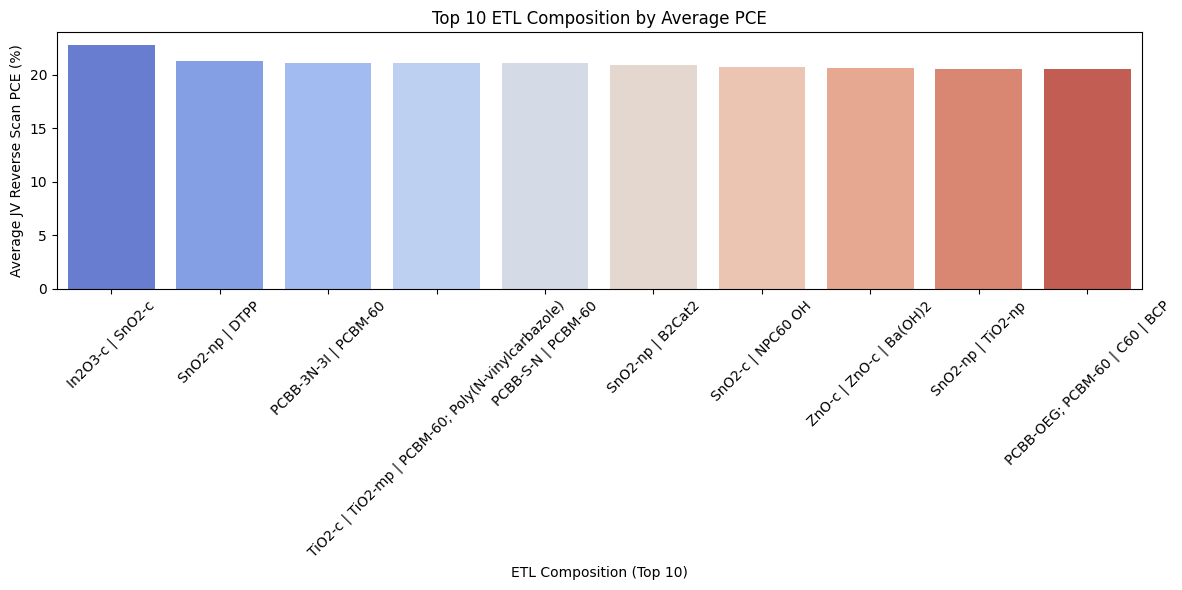

<ipython-input-128-ee16d5ea9215>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_name, y="JV_reverse_scan_PCE", data=top_10, palette="coolwarm")


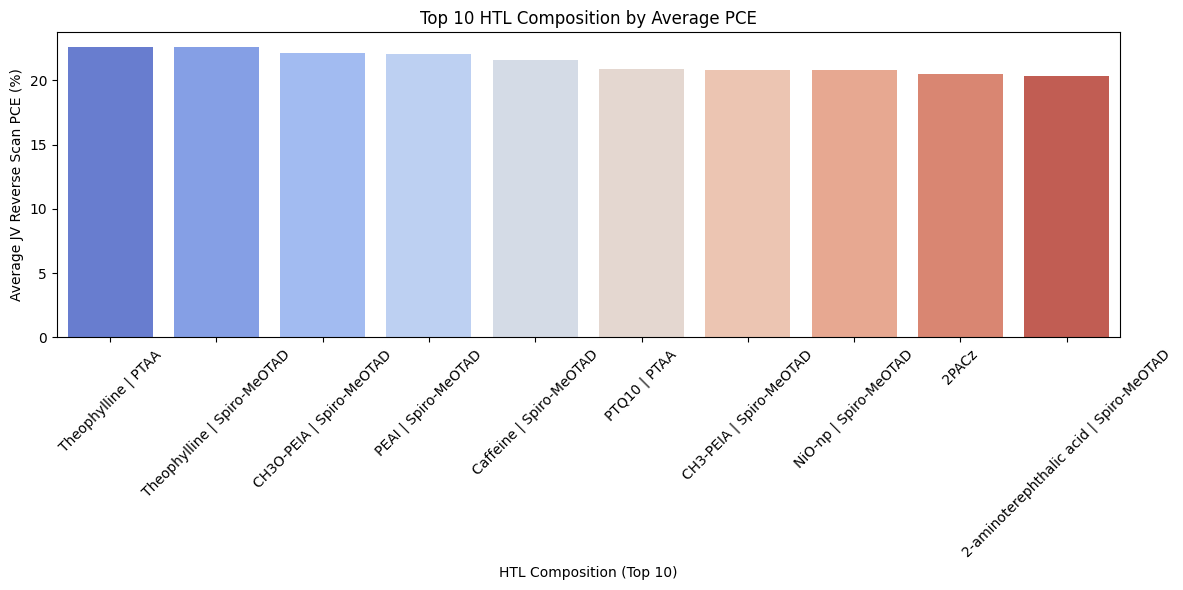

<ipython-input-128-ee16d5ea9215>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_name, y="JV_reverse_scan_PCE", data=top_10, palette="coolwarm")


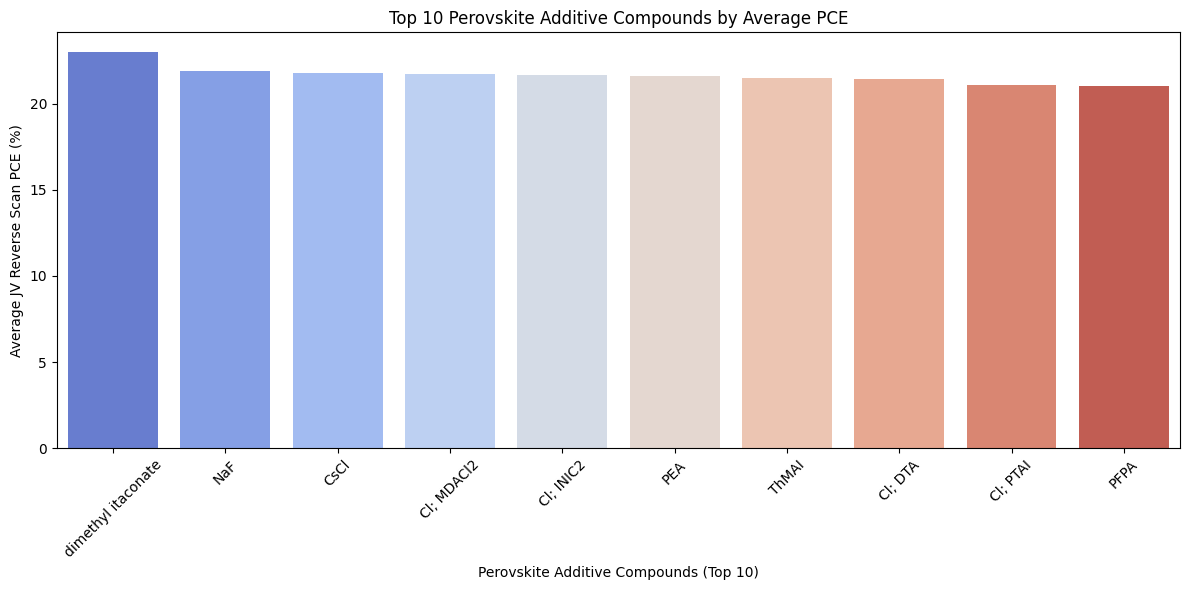

In [ ]:
# Define corrected column names
etl_feature = "ETL_stack_sequence"
htl_feature = "HTL_stack_sequence"
additive_feature = "Perovskite_additives_compounds"

# Ensure they are treated as categorical variables
data_2_step[etl_feature] = data_2_step[etl_feature].astype(str)
data_2_step[htl_feature] = data_2_step[htl_feature].astype(str)
data_2_step[additive_feature] = data_2_step[additive_feature].astype(str)

# Remove NaN values from these columns
filtered_data = data_2_step.dropna(subset=[etl_feature, htl_feature, additive_feature])

# ---- Function to Generate Bar Charts for Average PCE ----
def plot_avg_pce_by_feature(feature_name, title_label):
    avg_pce_by_feature = filtered_data.groupby(feature_name)['JV_reverse_scan_PCE'].mean().reset_index()
    avg_pce_by_feature = avg_pce_by_feature.sort_values(by='JV_reverse_scan_PCE', ascending=False)

    # Select top 10 categories for visualization
    top_10 = avg_pce_by_feature.head(10)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature_name, y="JV_reverse_scan_PCE", data=top_10, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.xlabel(title_label + " (Top 10)")
    plt.ylabel("Average JV Reverse Scan PCE (%)")
    plt.title(f"Top 10 {title_label} by Average PCE")
    plt.tight_layout()
    plt.show()

# ---- Generate Bar Charts ----
plot_avg_pce_by_feature(etl_feature, "ETL Composition")
plot_avg_pce_by_feature(htl_feature, "HTL Composition")
plot_avg_pce_by_feature(additive_feature, "Perovskite Additive Compounds")


In [ ]:
data['Perovskite_deposition_quenching_media'] = data['Perovskite_deposition_quenching_media'].replace('Chlorobenzene; DMSO', 'Chlorobenzene')